In [84]:
#Extractive Text Summarization - Manual Approach
#Text summarization refers to the technique of shortening long pieces of text. The intention is to create a coherent and fluent summary having only the main points outlined in the document. Automatic text summarization is a common problem in machine learning and natural language processing (NLP).


In [2]:
# Importing libraries
import pandas as pd
import string
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yugan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
text= pd.read_csv('text.csv')
text.head()

x
0  TECH RECHERAGE PAPER\n1-AI RESEARCH \nA-Can la...
1  View sample internet research paper. Browse re...
2  3-Nanotechnology Research Paper\nABSTRACT\nThe...
3  4-Computer Forensics Research Paper\nThe 1s an...
4  5-Neurotechnology Research Paper\nABSTRACT\nNe...

In [4]:
text = [x.strip() for x in text.x] # remove both the leading and the trailing characters
text = [x for x in text if x] # removes empty strings, because they are considered in Python as False
text[0:10]

['TECH RECHERAGE PAPER\n1-AI RESEARCH \nA-Can large language models be democratized\nIn early May, Meta released Open Pretrained Transformer (OPT-175B), a large language model (LLM) that can perform various tasks. Large language models have become one of the hottest areas of research in artificial intelligence in the past few years.\nOPT-175B is the latest entrant in the LLM arms race triggered by OpenAI’s GPT-3, a deep neural network with 175 billion parameters. GPT-3 showed that LLMs can perform many tasks without undergoing extra training and only seeing a few examples (zero- or few-shot learning). Microsoft later integrated GPT-3 into several of its products, showing not only the scientific but also the commercial promises of LLMs.\nWhat makes OPT-175B unique is Meta’s commitment to “openness,” as the model’s name implies. Meta has made the model available to the public (with some caveats). It has also released a ton of details about the training and development process. In a post 

In [5]:
# Joining the list into one string/text
text = ' '.join(text)
text

'TECH RECHERAGE PAPER\n1-AI RESEARCH \nA-Can large language models be democratized\nIn early May, Meta released Open Pretrained Transformer (OPT-175B), a large language model (LLM) that can perform various tasks. Large language models have become one of the hottest areas of research in artificial intelligence in the past few years.\nOPT-175B is the latest entrant in the LLM arms race triggered by OpenAI’s GPT-3, a deep neural network with 175 billion parameters. GPT-3 showed that LLMs can perform many tasks without undergoing extra training and only seeing a few examples (zero- or few-shot learning). Microsoft later integrated GPT-3 into several of its products, showing not only the scientific but also the commercial promises of LLMs.\nWhat makes OPT-175B unique is Meta’s commitment to “openness,” as the model’s name implies. Meta has made the model available to the public (with some caveats). It has also released a ton of details about the training and development process. In a post p

In [6]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
en = spacy.load('en_core_web_sm')
stopword = en.Defaults.stop_words

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yugan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.stem import WordNetLemmatizer
import re

wordnet = WordNetLemmatizer()

In [10]:
# Cleaning the corpus
def cleanup_text(docs):
    texts = []
    doc = en(docs)
    sentences = sent_tokenize(' '.join(map(str, doc)))
    
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    for i in range(len(sentences)):
        eBook = re.sub("[^A-Za-z" "]+"," ", sentences[i])
        eBook = re.sub("[0-9" "]+"," ", sentences[i])
        eBook = re.sub(r'[^\w]', ' ', sentences[i])
        eBook = re.sub(r'[^\S]', ' ', sentences[i])
        eBook = re.sub(r'\[.+\]', ' ', sentences[i])
        eBook = re.sub(r'[‘’“”_—]', '', sentences[i])
        eBook = eBook.lower()
        eBook = eBook.split()
        eBook = [wordnet.lemmatize(word) for word in eBook if not word in stopword]
        eBook = [wordnet.lemmatize(word) for word in eBook if not word in punctuation]
        eBook = ' '.join(eBook)
        texts.append(eBook)
    while("" in texts) :
        texts.remove("")    
    return texts

In [11]:
# cleaning corpus 
cleaned_1 = cleanup_text(str(text))

In [12]:
# Joining the list into one string/text
text2=','.join(cleaned_1)
text2

'tech recherage paper 1 ai research large language model democratized early meta released open pretrained transformer opt-175b large language model llm perform task,large language model hottest area research artificial intelligence past year,opt-175b latest entrant llm arm race triggered openai s gpt-3 deep neural network 175 billion parameter,gpt-3 showed llm perform task undergoing extra training seeing example zero- shot learning,microsoft later integrated gpt-3 product showing scientific commercial promise llm,make opt-175b unique meta s commitment openness model s implies,meta model available public caveat,released ton detail training development process,post published meta ai blog company described release opt-175b democratizing access large scale language model,meta s transparency commendable,competition large language model reached point longer democratized,looking inside large language model meta s release opt-175b key feature,includes pretrained model code needed train use ll

In [13]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

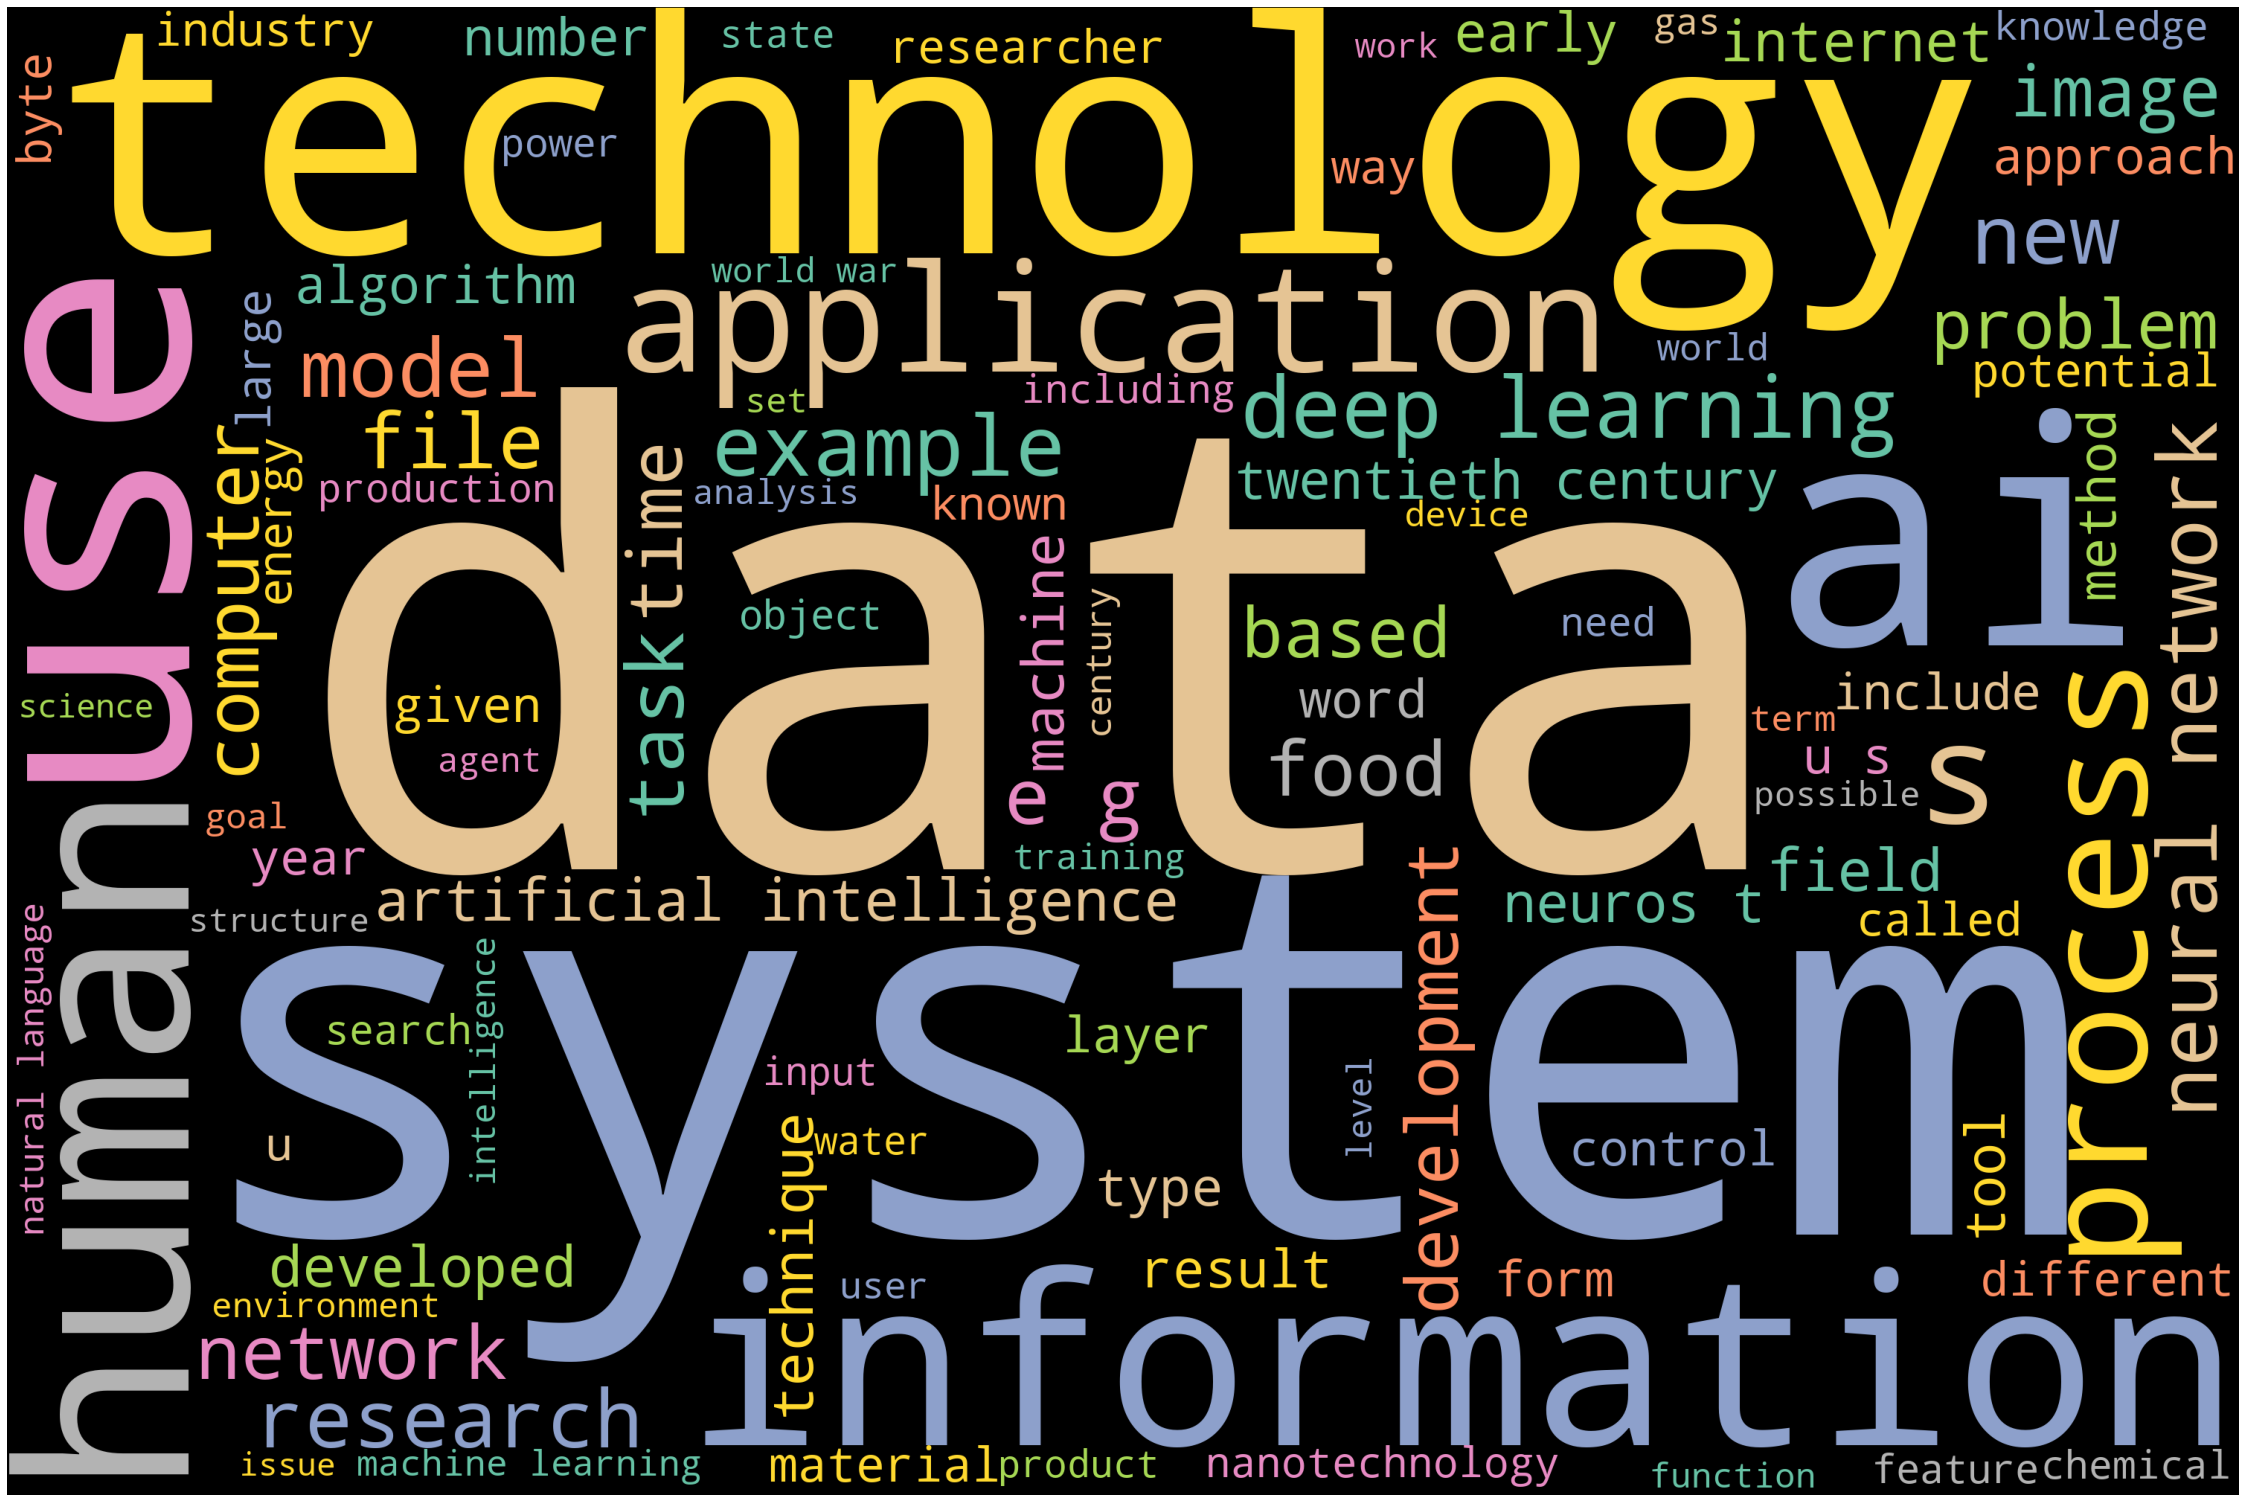

In [14]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text2)
# Plot
plot_cloud(wordcloud)

In [15]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yugan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yugan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Tokenizing the text 
stopWords = list(stopwords.words("english"))+list(punctuation)+list([0,1,2,3,4,5,6,7,8,9])
stopWords[15:20]

['yourself', 'yourselves', 'he', 'him', 'his']

In [17]:
# Tokenizing the text
words = word_tokenize(text2) 
words[15:25]

['transformer',
 'opt-175b',
 'large',
 'language',
 'model',
 'llm',
 'perform',
 'task',
 ',',
 'large']

In [18]:
freqTable={}
   
for word in words: 
    word = word.lower() 
    if word not in stopWords:
        if word in freqTable: 
            freqTable[word] += 1
        else: 
            freqTable[word] = 1

In [19]:
print(freqTable)

{'tech': 7, 'recherage': 1, 'paper': 38, '1': 41, 'ai': 191, 'research': 172, 'large': 95, 'language': 126, 'model': 191, 'democratized': 2, 'early': 75, 'meta': 20, 'released': 12, 'open': 19, 'pretrained': 4, 'transformer': 7, 'opt-175b': 10, 'llm': 9, 'perform': 15, 'task': 113, 'hottest': 1, 'area': 35, 'artificial': 129, 'intelligence': 137, 'past': 8, 'year': 58, 'latest': 1, 'entrant': 1, 'arm': 7, 'race': 10, 'triggered': 1, 'openai': 7, 'gpt-3': 12, 'deep': 173, 'neural': 126, 'network': 184, '175': 4, 'billion': 21, 'parameter': 15, 'showed': 12, 'undergoing': 1, 'extra': 7, 'training': 56, 'seeing': 3, 'example': 109, 'zero-': 1, 'shot': 3, 'learning': 239, 'microsoft': 13, 'later': 28, 'integrated': 14, 'product': 49, 'showing': 5, 'scientific': 21, 'commercial': 36, 'promise': 8, 'make': 19, 'unique': 15, 'commitment': 1, 'openness': 7, 'implies': 2, 'available': 35, 'public': 34, 'caveat': 2, 'ton': 5, 'detail': 8, 'development': 111, 'process': 125, 'post': 5, 'published

In [20]:
print(freqTable.items())

dict_items([('tech', 7), ('recherage', 1), ('paper', 38), ('1', 41), ('ai', 191), ('research', 172), ('large', 95), ('language', 126), ('model', 191), ('democratized', 2), ('early', 75), ('meta', 20), ('released', 12), ('open', 19), ('pretrained', 4), ('transformer', 7), ('opt-175b', 10), ('llm', 9), ('perform', 15), ('task', 113), ('hottest', 1), ('area', 35), ('artificial', 129), ('intelligence', 137), ('past', 8), ('year', 58), ('latest', 1), ('entrant', 1), ('arm', 7), ('race', 10), ('triggered', 1), ('openai', 7), ('gpt-3', 12), ('deep', 173), ('neural', 126), ('network', 184), ('175', 4), ('billion', 21), ('parameter', 15), ('showed', 12), ('undergoing', 1), ('extra', 7), ('training', 56), ('seeing', 3), ('example', 109), ('zero-', 1), ('shot', 3), ('learning', 239), ('microsoft', 13), ('later', 28), ('integrated', 14), ('product', 49), ('showing', 5), ('scientific', 21), ('commercial', 36), ('promise', 8), ('make', 19), ('unique', 15), ('commitment', 1), ('openness', 7), ('impli

In [21]:
print(sorted(freqTable.items(), key = lambda x: x[1]))

[('recherage', 1), ('hottest', 1), ('latest', 1), ('entrant', 1), ('triggered', 1), ('undergoing', 1), ('zero-', 1), ('commitment', 1), ('commendable', 1), ('opt-30b', 1), ('download,175', 1), ('integrity', 1), ('noncommercial', 1), ('license', 1), ('academia', 1), ('apis', 1), ('hindering', 1), ('robustness', 1), ('jab', 1), ('frontier', 1), ('collectively', 1), ('noting', 1), ('configuring', 1), ('27.6', 1), ('fortunately', 1), ('obviate', 1), ('codebase', 1), ('dgx-2', 1), ('400,000', 1), ('sum', 1), ('992', 1), ('a100', 1), ('confirms', 1), ('restart', 1), ('tweak', 1), ('hyperparameters', 1), ('gpt', 1), ('sequential', 1), ('accordingly', 1), ('alphabet', 1), ('backed', 1), ('530', 1), ('megatron', 1), ('mt', 1), ('pathway', 1), ('palm', 1), ('540', 1), ('rumor', 1), ('gpt-4', 1), ('whistle', 1), ('wealthy', 1), ('profitable', 1), ('traction', 1), ('probably', 1), ('celebrate', 1), ('publicizing', 1), ('solves', 1), ('crust', 1), ('predictable', 1), ('mit', 1), ('carnegie', 1), ('

In [22]:
sentences = sent_tokenize(text2) 
for sen in sentences:
    print(sen,"\n")

tech recherage paper 1 ai research large language model democratized early meta released open pretrained transformer opt-175b large language model llm perform task,large language model hottest area research artificial intelligence past year,opt-175b latest entrant llm arm race triggered openai s gpt-3 deep neural network 175 billion parameter,gpt-3 showed llm perform task undergoing extra training seeing example zero- shot learning,microsoft later integrated gpt-3 product showing scientific commercial promise llm,make opt-175b unique meta s commitment openness model s implies,meta model available public caveat,released ton detail training development process,post published meta ai blog company described release opt-175b democratizing access large scale language model,meta s transparency commendable,competition large language model reached point longer democratized,looking inside large language model meta s release opt-175b key feature,includes pretrained model code needed train use llm

In [23]:
# Creating a dictionary to keep the score of each sentence 
sentence_weight = dict() 
for sentence in sentences: 
    # print(sentence,'\n')
    for word, freq in freqTable.items():
        # print('\n' , word, freq)
        if word in sentence.lower(): 
            # print('sentence_weight    ',sentence_weight)
            if sentence in sentence_weight:     
                sentence_weight[sentence] += freq 
            else: 
                sentence_weight[sentence] = freq 
sentence_weight

{'tech recherage paper 1 ai research large language model democratized early meta released open pretrained transformer opt-175b large language model llm perform task,large language model hottest area research artificial intelligence past year,opt-175b latest entrant llm arm race triggered openai s gpt-3 deep neural network 175 billion parameter,gpt-3 showed llm perform task undergoing extra training seeing example zero- shot learning,microsoft later integrated gpt-3 product showing scientific commercial promise llm,make opt-175b unique meta s commitment openness model s implies,meta model available public caveat,released ton detail training development process,post published meta ai blog company described release opt-175b democratizing access large scale language model,meta s transparency commendable,competition large language model reached point longer democratized,looking inside large language model meta s release opt-175b key feature,includes pretrained model code needed train use l

In [25]:
sumValues = 0
for sentence in sentence_weight: 
    sumValues += sentence_weight[sentence] 
sumValues 

185321

In [26]:
# Average value of a sentence from the original text 
average = int(sumValues / len(sentence_weight)) 
print(average,sumValues,len(sentence_weight),sep='\n\n')

20591

185321

9


In [27]:
# Storing sentences into our summary. 
summary = '' 

for sentence in sentences: 
    if (sentence in sentence_weight) and (sentence_weight[sentence] > (1.25* average)): 
        summary += " " + sentence 
print(summary)

 tech recherage paper 1 ai research large language model democratized early meta released open pretrained transformer opt-175b large language model llm perform task,large language model hottest area research artificial intelligence past year,opt-175b latest entrant llm arm race triggered openai s gpt-3 deep neural network 175 billion parameter,gpt-3 showed llm perform task undergoing extra training seeing example zero- shot learning,microsoft later integrated gpt-3 product showing scientific commercial promise llm,make opt-175b unique meta s commitment openness model s implies,meta model available public caveat,released ton detail training development process,post published meta ai blog company described release opt-175b democratizing access large scale language model,meta s transparency commendable,competition large language model reached point longer democratized,looking inside large language model meta s release opt-175b key feature,includes pretrained model code needed train use ll

In [31]:
# Manual Approach
len(summary)

321567

In [32]:
len(text2)

342716

In [33]:
#Infrence: As you can see above the lenght of text2 is 342714 during the Manual Approach its reduce to 321565 it is still has a big lenght now we going to do model based approach.

In [34]:
#Extractive Text Summarization - Model Based Approach

In [114]:
!pip install sumy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
#Summy:
#Sumy is a textrank based machine learning algorithm. Below is the implementation of that model.

In [35]:
# load Packages
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

In [36]:
# Creating text parser using tokenization
parser = PlaintextParser.from_string(text2, Tokenizer("english"))

In [37]:
#1.Summarize using sumy TextRank

In [38]:
from sumy.summarizers.text_rank import TextRankSummarizer

In [39]:
# Summarize using TextRank
summarizer = TextRankSummarizer()
summary_1 = summarizer(parser.document,2)

In [40]:
text_summary = ""
for sentence in summary_1:
    text_summary += str(sentence)
    
print(text_summary)

food drug administration fda 2014 industry guidance suggests consideration material dimension outside nanoscale demonstrate novel property phenomenon similar seen material dimension nanoscale range proposes upper limit 1 mm 1,000 nm regulation fda 2014,european commission proposed functional deﬁnitions focus controlling structure behaviour matter level atom molecule emphasizing speciﬁc size range european commission 2014 khan 2012,omathúna 2009 note challenge precisely deﬁning boundary nanotechnology nanoscale range unique combination quantum macroscale effect converge nanoparticles unique interesting property particularly interact cell living tissue permeat[e impermeable,uk s royal society royal academy engineering emphasized distinction nanoscience nanotechnology,study phenomenon manipulation material atomic molecular macromolecular scale property differ signiﬁcantly larger scale royal society royal academy engineering 2004 2007,design characterization production application structur

In [41]:
len(text_summary)

165757

In [42]:
from nltk.translate.bleu_score import sentence_bleu
ref = [text2.split()]
test = text_summary.split()
print('BLEU score for test-> {}'.format(sentence_bleu(ref, test)))

BLEU score for test-> 0.3436461357765771


In [43]:
len(text2)

342716

In [44]:
#2.Lex Rank:This is an unsupervised machine learning based approach in which we use the textrank approach to find the summary of our sentences. Using cosine similarity and vector based algorithms, we find minimum cosine distance among various words and store the more similar words together.

In [45]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

In [46]:
from sumy.summarizers.lex_rank import LexRankSummarizer

In [47]:
paerser = PlaintextParser.from_string(text2, Tokenizer("english"))
summarizer = LexRankSummarizer()
#Summarize the document with 2 sentences
summary_2 = summarizer(parser.document,2)
    
dp = []
for i in summary_2:
    lp = str(i)
dp.append(lp)
text_summary2 = ' '.join(dp)

print(text_summary2)

changeover began late 1980s resulted closure coal mine coal fired power station,electricity industry privatized liberalized ccgt particular attractive low capital cost high thermal efficiency relatively low environmental impact,technology contributed trend identified cesare marchetti depicts chronological shift world s source primary power wood coal oil gas century half,fuel successively richer hydrogen poorer carbon predecessor supporting hypothesis progressing pure hydrogen economy,distributed generation embedded distributed generation refers power plant feed electricity local distribution network,saving transmission distribution loss generally considered environmentally socially beneficial option compared centralized generation,technology contributed expansion mode generation include wind turbine developed point cost generation rivaled central power station photovoltaic cell combined heat power unit,industry expanded massively year century particularly europe regulatory measure gave

In [48]:
len(text_summary2)

63898

In [49]:
from nltk.translate.bleu_score import sentence_bleu
ref = [text2.split()]
test = text_summary2.split()
print('BLEU score for test-> {}'.format(sentence_bleu(ref, test)))

BLEU score for test-> 0.011962282273726343


In [50]:
#3. Luhn:
#This approach is based on the frequency method; here we find TF-IDF (term frequency inverse document frequency).

In [51]:
from sumy.summarizers.luhn import LuhnSummarizer

In [52]:
parser = PlaintextParser.from_string(text2,Tokenizer("english"))
    
summarizer_luhn = LuhnSummarizer()
summary_3 = summarizer_luhn(parser.document,2)
dp=[]
for i in summary_3:
    lp=str(i)
dp.append(lp)
text_summary3 =' '.join(dp)
    
print(text_summary3)

changeover began late 1980s resulted closure coal mine coal fired power station,electricity industry privatized liberalized ccgt particular attractive low capital cost high thermal efficiency relatively low environmental impact,technology contributed trend identified cesare marchetti depicts chronological shift world s source primary power wood coal oil gas century half,fuel successively richer hydrogen poorer carbon predecessor supporting hypothesis progressing pure hydrogen economy,distributed generation embedded distributed generation refers power plant feed electricity local distribution network,saving transmission distribution loss generally considered environmentally socially beneficial option compared centralized generation,technology contributed expansion mode generation include wind turbine developed point cost generation rivaled central power station photovoltaic cell combined heat power unit,industry expanded massively year century particularly europe regulatory measure gave

In [53]:
len(text_summary3)

63898

In [54]:
len(text2)

342716

In [55]:
from nltk.translate.bleu_score import sentence_bleu
ref = [text2.split()]
test = text_summary3.split()
print('BLEU score for test-> {}'.format(sentence_bleu(ref, test)))

BLEU score for test-> 0.011962282273726343


In [56]:
#4. LSA:
#Latent Semantic Analyzer (LSA) is based on decomposing the data into low dimensional space. LSA has the ability to store the semantic of given text while summarizing.

In [57]:
from sumy.summarizers.lsa import LsaSummarizer

In [58]:
parser = PlaintextParser.from_string(text2,Tokenizer("english"))
summarizer_lsa = LsaSummarizer()
summary_4 = summarizer_lsa(parser.document,2)
sp = []
for i in summary_4:
    kp =str(i)
sp.append(kp)
text_summary4 = ' '.join(sp)
    
print(text_summary4)

changeover began late 1980s resulted closure coal mine coal fired power station,electricity industry privatized liberalized ccgt particular attractive low capital cost high thermal efficiency relatively low environmental impact,technology contributed trend identified cesare marchetti depicts chronological shift world s source primary power wood coal oil gas century half,fuel successively richer hydrogen poorer carbon predecessor supporting hypothesis progressing pure hydrogen economy,distributed generation embedded distributed generation refers power plant feed electricity local distribution network,saving transmission distribution loss generally considered environmentally socially beneficial option compared centralized generation,technology contributed expansion mode generation include wind turbine developed point cost generation rivaled central power station photovoltaic cell combined heat power unit,industry expanded massively year century particularly europe regulatory measure gave

In [59]:
len(text_summary4)

63898

In [60]:
len(text2)

342716

In [61]:
from nltk.translate.bleu_score import sentence_bleu
ref = [text2.split()]
test = text_summary4.split()
print('BLEU score for test-> {}'.format(sentence_bleu(ref, test)))

BLEU score for test-> 0.011962282273726343


In [62]:
#5. KL-SUM:
#Another extractive method is the KL-Sum algorithm.

#It selects sentences based on similarity of word distribution as the original text. It aims to lower the KL-divergence criteria (learn more). It uses greedy optimization approach and keeps adding sentences till the KL-divergence decreases.

In [63]:
from sumy.summarizers.kl import KLSummarizer

In [64]:
parser = PlaintextParser.from_string(text2,Tokenizer("english"))
summarizer_kl = KLSummarizer()
summary_5 = summarizer_kl(parser.document,2)
hp = []
for i in summary_5:
    tp =str(i)
hp.append(tp)
text_summary5 = ' '.join(hp)
    
print(text_summary5)

quick adopt production coal gas lighting early 1816,discovery field largely compatible natural gas relatively shallow site searching oil reserve natural gas industry expanded swiftly,large scale transmission mechanism developed alacrity noteworthy example came trans continental gas pipeline corporation completed link field texas louisiana demand intensive area new york 1951,contrast europe exploitation natural gas began earnest year following world war ii,soviet union example rich field baku azerbaijan connected eastern bloc ally 1971 west germany italy 680,000 kilometer pipeline,western europe development geopolitical level benefited britain officially acquired mineral right western section north sea 1964,year later west sole field discovered,britain imported natural gas u.s. 12 year switched entirely manufactured coal gas natural gas,conversion simple operation,differing property manufactured natural gas meant domestic industrial appliance numbering ten million altered,british conver

In [65]:
len(text_summary5)

2082

In [66]:
len(text2)

342716

In [67]:
from nltk.translate.bleu_score import sentence_bleu
ref = [text2.split()]
test = text_summary5.split()
print('BLEU score for test-> {}'.format(sentence_bleu(ref, test)))

BLEU score for test-> 6.475038416698459e-66


In [68]:
#6Text Summarization with gensim

In [69]:
import gensim
from gensim.summarization import summarize

In [70]:
short_summary = summarize(text2)
print(short_summary)

tech recherage paper 1 ai research large language model democratized early meta released open pretrained transformer opt-175b large language model llm perform task,large language model hottest area research artificial intelligence past year,opt-175b latest entrant llm arm race triggered openai s gpt-3 deep neural network 175 billion parameter,gpt-3 showed llm perform task undergoing extra training seeing example zero- shot learning,microsoft later integrated gpt-3 product showing scientific commercial promise llm,make opt-175b unique meta s commitment openness model s implies,meta model available public caveat,released ton detail training development process,post published meta ai blog company described release opt-175b democratizing access large scale language model,meta s transparency commendable,competition large language model reached point longer democratized,looking inside large language model meta s release opt-175b key feature,includes pretrained model code needed train use llm

In [71]:
# Summarization by ratio
summary_by_ratio=summarize(text2,ratio=0.1)
print(summary_by_ratio)

tech recherage paper 1 ai research large language model democratized early meta released open pretrained transformer opt-175b large language model llm perform task,large language model hottest area research artificial intelligence past year,opt-175b latest entrant llm arm race triggered openai s gpt-3 deep neural network 175 billion parameter,gpt-3 showed llm perform task undergoing extra training seeing example zero- shot learning,microsoft later integrated gpt-3 product showing scientific commercial promise llm,make opt-175b unique meta s commitment openness model s implies,meta model available public caveat,released ton detail training development process,post published meta ai blog company described release opt-175b democratizing access large scale language model,meta s transparency commendable,competition large language model reached point longer democratized,looking inside large language model meta s release opt-175b key feature,includes pretrained model code needed train use llm

In [72]:
from nltk.translate.bleu_score import sentence_bleu
ref = [text2.split()]
test = summary_by_ratio.split()
print('BLEU score for test-> {}'.format(sentence_bleu(ref, test)))

BLEU score for test-> 0.1605754231938441


In [73]:
from nltk.translate.bleu_score import sentence_bleu
ref = [text2.split()]
test = short_summary.split()
print('BLEU score for test-> {}'.format(sentence_bleu(ref, test)))

BLEU score for test-> 0.4903724584595743


In [74]:
import sys

In [75]:
print(sys.getrecursionlimit())
sys.setrecursionlimit(15000)

3000


In [76]:
info = pd.DataFrame(columns=['Model','BLEU SCORE'])
A=['TextRank','Lex Rank','Luhn','LSA','KL-SUM','Gensim']
B=[0.3436461357765771,0.011962282273726343,0.011962282273726343,0.011962282273726343,6.475038416698459e-66,0.4903724584595743]
info['Model']=pd.Series(A)
info['BLEU SCORE']=pd.Series(B)
info

Model    BLEU SCORE
0  TextRank  3.436461e-01
1  Lex Rank  1.196228e-02
2      Luhn  1.196228e-02
3       LSA  1.196228e-02
4    KL-SUM  6.475038e-66
5    Gensim  4.903725e-01

In [77]:
!pip install -U sentence-transformers

  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120753 sha256=811310207c1f7c0525c7c733420f98ac71059fcb4e579d4babca36b72db4f227
  Stored in directory: c:\users\yugan\appdata\local\pip\cache\wheels\0c\b6\fb\2289a932c365293ad865fc1fe9d2db694d5584241c6d670874
Successfully built sentence-transformers


In [78]:
!pip install bert-extractive-summarizer

In [79]:
pip install sacremoses

  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895257 sha256=3c944abe82876fd2909cf5152345d5e8ad99702b8df5d4cc6072c278c9883671
  Stored in directory: c:\users\yugan\appdata\local\pip\cache\wheels\82\ab\9b\c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses
Note: you may need to restart the kernel to use updated packages.


In [80]:
#download the summarizer
from summarizer import Summarizer

In [81]:
from summarizer.sbert import SBertSummarizer

In [90]:
model = SBertSummarizer('paraphrase-MiniLM-L6-v2')

In [91]:
body='''tech recherage paper 1-ai research large language model democratized early meta released open pretrained transformer opt-175b large language model llm perform task,large language model hottest area research artificial intelligence past year,opt-175b latest entrant llm arm race triggered openai s gpt-3 deep neural network 175 billion parameter,gpt-3 showed llm perform task undergoing extra training seeing example zero- shot learning,microsoft later integrated gpt-3 product showing scientific commercial promise llm,make opt-175b unique meta s commitment openness model s implies,meta model available public caveat,released ton detail training development process,post published meta ai blog company described release opt-175b democratizing access large scale language model,meta s transparency commendable,competition large language model reached point longer democratized,looking inside large language model meta s release opt-175b key feature,includes pretrained model code needed train use llm,pretrained model especially useful organization computational resource training model training neural network resource intensive running,help reduce massive carbon footprint caused computational resource needed train large neural network,like gpt-3 opt come different size ranging 125 million 175 billion parameter model parameter capacity learning,time writing model opt-30b accessible download,175-billion parameter model available select researcher institution fill request form,according meta ai blog maintain integrity prevent misuse releasing model noncommercial license focus research use case,access model granted academic researcher affiliated organization government civil society academia industry research laboratory world,addition model meta released logbook provides detailed technical timeline development training process large language model,published paper usually include information final model,logbook give valuable insight compute train opt-175b human overhead required underlying infrastructure training process unstable scale according meta,contrast gpt-3 blog post meta state large language model accessible paid apis restricted access llm limited researcher ability understand large language model work hindering progress effort improve robustness mitigate known issue bias toxicity,jab openai extension microsoft released gpt-3 black box api service instead making model s weight source code available public,reason openai stated making gpt-3 public controlling misuse development harmful application,meta belief making model available wider audience better position study prevent harm cause,s meta describes effort hope opt-175b bring voice frontier large language model creation help community collectively design responsible release strategy add unprecedented level transparency openness development large language model field,cost large language model worth noting transparency openness equivalent democratizing large language model,cost training configuring running large language model remain prohibitive likely grow future,according meta s blog post researcher managed considerably reduce cost training large language model,company say model s carbon footprint reduced seventh gpt-3,expert previously spoken estimated gpt-3 s training cost 27.6 million,mean opt-175b cost million dollar train,fortunately pretrained model obviate need train model meta say provide codebase train deploy model 16 nvidia v100 gpus,equivalent nvidia dgx-2 cost 400,000 small sum cash constrained research lab individual researcher,according paper provides detail opt-175b meta trained model 992 80 gb a100 gpus significantly faster v100,meta ai s logbook confirms training large language model complicated task,timeline opt-175b filled server crash hardware failure complication require highly technical staff,researcher restart training process time tweak hyperparameters change loss function,incur extra cost small lab nt afford,undemocratic future large language model language model opt gpt based transformer architecture,key feature transformer ability process large sequential data e.g. text parallel scale,recent year researcher shown adding layer parameter transformer model improve performance language task,researcher believe reaching higher level intelligence scale problem,accordingly cash rich research lab like meta ai deepmind owned alphabet openai backed microsoft moving creating larger larger neural network,year microsoft nvidia created 530-billion parameter language model called megatron turing mt nlg,month google introduced pathway language model palm llm 540 billion parameter,rumor openai release gpt-4 month,larger neural network require larger financial technical resource,larger language model new bell whistle new failure inevitably centralize power hand wealthy company making harder smaller research lab independent researcher work large language model,commercial big tech company greater advantage,running large language model expensive challenging,company like google microsoft special server processor allow run model scale profitable way,smaller company overhead running version llm like gpt-3 prohibitive,business use cloud hosting service instead setting server data center box system like gpt-3 api gain traction large language model popular,turn centralize ai hand big tech company,ai research lab enter partnership big tech fund research,big tech power decide future direction ai research probably aligned financial interest,come cost area research short term return investment,line celebrate meta s bring transparency llm let s forget nature large language model undemocratic favor company publicizing,b deep learning technique solves tough challenge robotics human working deformable object significantly difficult handling rigid object,learn naturally shape fold manipulate different way recognize,robot artificial intelligence system manipulating deformable object present huge challenge,consider series step robot shape ball dough pizza crust,track dough change shape time choose right tool step work,challenging task current ai system stable handling rigid body object predictable state,new deep learning technique developed researcher mit carnegie mellon university university california san diego show promise robotics system stable handling deformable object,called diffskill technique u deep neural network learn simple skill planning module combining skill solve task require multiple step tool,handling deformable object reinforcement learning deep learning ai system want handle object able detect define state predict look future,problem largely solved rigid object,good set training example deep neural network able detect rigid object different angle,come deformable object space possible state complicated,rigid object describe state number number xyz coordinate number orientation xingyu lin ph.d. student cmu lead author diffskill paper told techtalks,deformable body dough fabric infinite degree freedom making difficult describe state precisely,furthermore way deform harder model mathematical way compared rigid body,development differentiable physic simulator enabled application gradient based method solve deformable object manipulation task,contrast traditional reinforcement learning approach try learn dynamic environment object pure trial error interaction,diffskill inspired plasticinelab differentiable physic simulator presented iclr conference 2021,plasticinelab showed differentiable simulator help short horizon task,differentiable simulator struggle long horizon problem require multiple step use different tool,ai system based differentiable simulator require agent know simulation state relevant physical parameter environment,especially limiting real world application agent usually perceives world visual depth sensory data rgb d,started ask extract step required accomplish task skill learn abstract notion skill chain solve complex task lin said,diffskill framework ai agent learns skill abstraction differentiable physic model composes accomplish complicated manipulation task,lin s past work focused reinforcement learning manipulation deformable object cloth rope liquid,diffskill chose dough manipulation challenge pose,dough manipulation particularly interesting easily performed robot gripper requires different tool sequentially human good common robot lin said,trained diffskill successfully accomplish set dough manipulation task rgb d input,learning abstract skill neural network diffskill composed key component neural skill abstractor u neural network learn individual skill planner composes skill solve long horizon task,diffskill u differentiable physic simulator generate training example skill abstractor,sample achieve short horizon goal single tool roller spread dough spatula displace dough,example presented skill abstractor rgb d video,given image observation skill abstractor predict desired goal feasible,model learns tune parameter comparing prediction actual outcome physic simulator,time diffskill train variational autoencoder vae learn latent space representation example generated physic simulator,vae encodes image lower dimension space preserve important feature discard information relevant task,transferring high dimensional image space latent space vae play important role enabling diffskill plan long horizon predict outcome observing sensory data,important challenge training vae making sure learns right feature generalizes real world composition visual data different generated physic simulator,example color roller pin table relevant task position angle roller location dough,currently researcher technique called domain randomization randomizes irrelevant property training environment background lighting keep important feature position orientation tool,make vae stable applied real world,easy need cover possible variation different simulation real world known sim2real gap lin said,better way use 3d point cloud representation scene easier transfer simulation real world,fact working follow project point cloud input,planning long horizon deformable object task skill abstractor trained diffskill u planner module solve long horizon task,planner determine number sequence skill needed initial state destination,planner iterates possible combination skill intermediate outcome yield,variational autoencoder come handy,instead predicting image outcome diffskill u vae predict latent space outcome intermediate step final goal,combination abstract skill latent space representation make computationally efficient draw trajectory initial state goal,fact researcher nt need optimize search function exhaustive search combination,computation planning skill horizon long lin said,exhaustive search eliminates need designing sketch planner lead novel solution considered designer general way observe limited task tried,furthermore sophisticated search technique applied according diffskill paper optimization efficiently 10 second skill combination single nvidia 2080ti gpu,preparing pizza dough diffskill researcher tested performance diffskill baseline method applied deformable object including model free reinforcement learning algorithm trajectory optimizer u physic simulator,model tested task require multiple step tool,example task ai agent lift dough spatula place cutting board spread roller,result diffskill significantly better technique solving long horizon multiple tool task sensory information,experiment trained diffskill s planner find good intermediate state initial goal state find decent sequence skill solve task,takeaway set skill provide important temporal abstraction allowing reason long horizon lin said,similar human approach different task thinking different temporal abstraction instead thinking second,limit diffskill s capacity,example performing task required stage planning diffskill s performance degrades significantly better technique,lin mentioned case feasibility predictor produce false positive,researcher believe learning better latent space help solve problem,researcher exploring direction improve diffskill including efficient planner algorithm longer horizon task,lin hope day use diffskill real pizza making robot,far,challenge emerge control sim2real transfer safety,confident trying long horizon task said,c fomo tinyml neural network real time object detection new machine learning technique developed researcher edge impulse platform creating ml model edge make possible run real time object detection device small computation memory capacity,called faster object object fomo new deep learning architecture unlock new computer vision application,object detection deep learning model memory computation requirement capacity small processor,fomo hand requires kilobyte memory make great technique tinyml subfield machine learning focused running ml model microcontrollers memory constrained device limited internet connectivity,image classification v object detection tinyml great progress image classification machine learning model predict presence certain type object image,hand object detection requires model identify object bounding box instance,object detection model complex image classification network require memory,added computer vision support edge impulse 2020 ve seen tremendous pickup application 40 percent project computer vision application jan jongboom cto edge impulse told techtalks,current state art model image classification microcontrollers,image classification useful application,example security camera use tinyml image classification determine s person frame,big nuisance limited basic classification task,s lot value seeing people label left corner e.g. counting thing biggest asks market today jongboom say,earlier object detection ml model process input image time locate object slow computationally expensive,recent model yolo look use single shot detection provide near real time object detection,memory requirement large,model designed edge application hard run small device,yolov5 mobilenet ssd insanely large network fit mcu barely fit raspberry pi – class device jongboom say,model bad detecting small object need lot data,example yolov5 recommends 10,000 training instance object class,idea fomo object detection application require high precision output state art deep learning model provide,finding right tradeoff accuracy speed memory shrink deep learning model small size keeping useful,instead detecting bounding box fomo predicts object s center,object detection application interested location object frame size,detecting centroid compute efficient bounding box prediction requires data,redefining object detection deep learning architecture fomo applies major structural change traditional deep learning architecture,single shot object detector composed set convolutional layer extract feature fully connected layer predict bounding box,convolution layer extract visual feature hierarchical way,layer detects simple thing line edge different direction,convolutional layer usually coupled pooling layer reduces size layer s output keep prominent feature area,pooling layer s output fed convolutional layer extract higher level feature corner arc circle,convolutional pooling layer added feature map zoom detect complicated thing face object,finally fully connected layer flatten output final convolution layer try predict class bounding box object,fomo remove fully connected layer convolution layer,turn output neural network sized version image output value representing small patch input image,network trained special loss function output unit predicts class probability corresponding patch input image,output effectively heatmap object type,key benefit approach,fomo compatible existing architecture,example fomo applied mobilenetv2 popular deep learning model image classification edge device,considerably reducing size neural network fomo lower memory compute requirement object detection model,according edge impulse 30 time faster mobilenet ssd run device 200 kilobyte ram,example following video show fomo neural network detecting object 30 frame second arduino nicla vision little 200 kilobyte memory,raspberry pi 4 fomo detect object 60fps opposed 2fps performance mobilenet ssd,jongboom told fomo inspired work mat kelcey principal engineer edge impulse neural network architecture counting bee,traditional object detection algorithm yolov5 mobilenet ssd bad type problem similar sized object lot small object designed custom architecture optimizes problem said,granularity fomo s output configured based application detect instance object single image,limit fomo benefit fomo come tradeoff,work best object size,s like grid equally sized square detects object,large object foreground small object background work,object close overlapping occupy grid square reduces accuracy object detector video,overcome limit extent reducing fomo s cell size increasing image resolution,fomo especially useful camera fixed location example scanning object conveyor belt counting car parking lot,edge impulse team plan expand work future including making model smaller 100 kilobyte making better transfer learning,d new rl technique achieves superior performance control task reinforcement learning fascinating field computer science proven useful solving toughest challenge artificial intelligence robotics,scientist believe reinforcement learning play key role cracking enigma human level artificial intelligence,hurdle stand current reinforcement learning system possible path general robust form ai,rl system struggle long term planning training sample efficiency transferring knowledge new task dealing inconsistency input signal reward challenge occur real world application,dozen reinforcement learning algorithm recently deep rl address challenge struggling,new reinforcement learning technique developed researcher university california san diego brings major branch rl create efficient robust agent,dubbed temporal difference learning model predictive control td mpc new technique combine strength model based model free rl match outperform state art algorithm challenging control task,model free v model based reinforcement learning reinforcement learning agent seek goal moving destination location winning game reducing energy consumption factory maximizing ad click,agent interact environment set action displacing piece chessboard displaying ad website moving limb robot,action change state environment provides agent reward feedback signal help determine getting closer goal,multiple training episode rl agent learn action policy maximize reward,common way categorize rl algorithm split model based model free technique,model free rl agent develop policy trying action learning successful sequence,model free rl agent learns value action purely based past experience,example consider rl algorithm driving car,untrained rl agent know driving straight cliff cause car drop crash,experience negative reward signal learn action hit brake steer direction,time reach cliff,hand model based rl try learn dynamic govern environment,benefit modeling environment rl agent predict outcome action nt taken,self driving car example mentioned model based rl agent nt need experience jumping cliff bridge realize lead bad outcome,model based rl appealing sample efficient comparison model free algorithm,model based rl agent need experience gathering imagine different scenario taking actual action environment,learning accurate model environment difficult especially complex environment state action continuous opposed discrete action chess environment stochastic change agent taking action real world,model free reinforcement learning remains main solution application especially rl agent handle continuous action state,temporal difference learning model predictive control td mpc temporal difference learning model predictive control new technique developed researcher ucsd combine strength model free model based reinforcement learning overcome respective weakness train rl agent robust sample efficient,model based algorithm model predictive control,mpc useful finding local solution control task,limited time horizon performs poorly faced problem require long term planning especially application compute resource scarce,key feature mpc approximates global long horizon solution solving local finite horizon optimization problem nicklas hansen lead author td mpc paper told techtalks,blessing curse tie performance planning horizon computational budget,non issue application model easy evaluate model neural network costly planning long horizon,mpc performs model accurate sufficient compute resource planning,learning accurate model environment harder engineer adopt large model slow costly train,comparison model free rl algorithm directly optimize policy long horizon performance make incredibly fast somewhat expressive,wanted incorporate key strength model free rl mpc framework best world hansen said,achieve goal researcher chose optimize combination short term model based prediction long term value estimation temporal difference learning td learning technique commonly model free rl algorithm,td learning mechanism calculate value different action trajectory rl agent,td mpc u model based reinforcement learning optimize short term decision model free value function estimate long term decision,example humanoid locomotion task model based component control joint movement model free component chooses trajectory agent,learning latent representation environment great challenge modeling complex environment finding right element feature extract predict,popular model based rl system try learn predict image frame dealing visual input,difficult task requires immense computational resource yield unstable result,environment modeling efficient hansen colleague designed task oriented latent dynamic told model jointly learned terminal value function td learning,basically instead trying model entire input space told extract smaller subset feature relevant task goal rl agent,previous data driven mpc method try model environment future state image prediction loss td mpc algorithm instead learns task oriented latent dynamic model reward value prediction hansen said,allows model part environment actually relevant planning find easier opti view sample internet research paper,browse research paper example inspiration,need thorough research paper written according academic standard turn experienced writer help,paper,feel free contact writing service professional assistance,offer high quality assignment reasonable rate,internet vast global system interconnected technical network heterogeneous information communication technology,social economic assemblage allows diverse form communication creativity cultural exchange scope scale unknown late twentieth century,term internet net discussing social implication new information technology creation new communal bond great distance new form wealth inequality,usage imprecise internet distinct application technology built e mail world wide web online gaming filesharing network e commerce e governance initiative,network distinct internet mobile telephone network electronic financial network,stated precisely internet infrastructural substrate posse innovative social cultural economic feature allowing creativity innovation based openness particular standardization process,necessary sufficient condition social cultural implication attributed,understanding particularity internet key differentiating implication potential impact society impact information technology computer generally,history structure internet internet developed military university corporate amateur user innovation occurring constantly beginning late 1960s,despite complexity unlike familiar complex technical object example jumbo jetliner designed tested refined strict hierarchy expert attempt posse complete overview object final state,contrast internet subject innovation experimentation refinement defined collective diverse user wide ranging goal interest,1968 internet known arpanet named principal funding agency u.s. department defense advanced research project agency arpa,small extensive research project organized information processing technique office arpa focused advanced concept computing specifically graphic time sharing networking,primary goal network allow separate administratively bounded resource computer software particular geographical site shared boundary forcing standardization,participant primarily university researcher computer engineering department,separate experiment networking corporate academic way period creation ethernet robert metcalfe xerox parc x.25 network protocol standardized international telecommunication union,1978 arpanet grown encompass dozen university military research site united state,point project leader arpa recognized need specific kind standardization network feasible common operating system networking software run diverse hardware connected network,based widespread adoption 1970s unix operating system chosen arpa official platform internet,unix known portability ability installed different kind hardware extensibility ease new component added core system,bill joy later cofounded sun microsystems credited widespread implementation internet protocol ip software unix operating system version known berkeley system distribution bsd,internet officially began practice 1983 date set ad hoc group engineer known network working group nwg deadline connected computer begin transmission control protocol internet protocol tcp ip protocol,protocol originally designed 1973 consistently improved ensuing year 1983 protocol define internet,roughly time arpa department defense split existing arpanet keeping milnet sensitive military use leaving arpanet research purpose civilian u,1983 1993 addition research network internet underground subcultural phenomenon familiar amateur computer enthusiast university student faculty hacker,internet s glamour largely associated arcane nature interaction demanded largely text based demanding access knowledge unix operating system,owner widespread personal computer ibm apple largely excluded internet number similar network bulletin board service bitnet fidonet existed pc user,large number amateur computer enthusiast discovered internet period university course friend user initiated innovation date period ranging game e.g. mud multi user dungeon programming scripting language e.g. perl created larry wall precursor world wide web e.g. wais archie gopher,period network overseen funded national science foundation invested heavily improving basic infrastructure fiberoptic backbone united state 1988,oversight management internet commercialized 1995 backing presidential administration bill clinton,1993 world wide web originally designed tim berners lee cern switzerland graphical mosaic web browser created national center supercomputing application university illinois brought internet larger audience,1993 2000 dot com boom drove transformation internet underground research phenomenon nearly ubiquitous essential technology far reaching effect,commercial investment infrastructure web presence saw explosive growth new mode interaction communication e.g. e mail internet messaging mailing list proliferated uniform resource locator url www.britannica.com common highly valued feature advertisement corporate identity artist scientist citizen took challenge understanding new medium,protocol internet standard process core technical component internet standardized protocol hardware software strictly speaking obviously spread extensively innovation microelectronics continual enhancement telecommunication infrastructure globe growth ownership use personal computer year,protocol inter internet possible allowing huge number nonoverlapping incompatible network compatible route data,key protocol known tcp ip designed 1973 vint cerf robert kahn,key protocol domain system dns user datagram protocol udp came later,protocol implemented software unix operating system described allow computer interconnect,essentially standard hardware software implementation comply order type hardware software connect internet communicate hardware software,best understood kind technical esperanto,internet protocol differ traditional standard unconventional social process developed validated improved,internet protocol elaborated set openly available document known request comment rfcs maintained loose federation engineer called internet engineering task force ietf successor network working group,ietf organization open individual unlike large standard organization typically accept national corporate representative distributes rfcs free charge encourages member implement protocol improve based experience user response,improved protocol released implementation,positive feedback loop differs consensus oriented standardization process e.g. international organization iso international organization standardization seek achieve final complete state encouraging implementation,relative ease piece software replaced key reason difference,1970s 1980s system served internet allowing develop quickly according need user,1990s scale internet innovation slower difficult procedure fact clearly demonstrated comparatively glacial speed generation internet protocol known ip version 6 implemented,ultimately ietf style standardization process common cultural reference point engineer expert user internet applied internet production application tool rely internet,result starkly different mode innovation sharing best exemplified growth success called free software open source software,core application widely internet developed fashion famous example include linux operating system kernel apache web server,cultural social economic implication internet result unusual development process nature protocol relatively easy internet advance globe connect heterogeneous equipment diverse setting willing enthusiastic user sufficient technical know,major impediment reliability mere existence preexisting infrastructural component working energy telecommunication infrastructure,1968 1993 expansion conducted national state level individual organization saw local benefit expanding access global network,university computer science department afford devote resource computer dedicated routing traffic connection researcher department join network needing permission centralized state authority,late 1990s internet governance issue concerned government citizen world,particular creation internet corporation assigned name number icann locus fractious dispute especially international arena,icann s narrow role assign ip number e.g. 192.168.0.1 name map e.g. www.wikipedia.org perceived rightly wrongly instrument u.s. control internet,expansion internet issue privacy security organizational national authority pressing,outset internet protocol sought prioritize control administrative boundary leaving rule governing use local network owner,scheme obviated need central authority determined global rule access public private boundary priority use,advent widespread commercial access local control severely diluted possibility individual mischief e.g. identity theft spam privacy violation increased increasing accessibility,hand increased commercial access mean decline local organized authority part internet favor control large segment internet service provider isps telecommunication cable corporation,hand basic infrastructure internet spread practice norm developed concert technology including proper way configure router norm proper etiquette mailing list e mail,application built internet adopted norm mode use promoted culture innovation hacking creates new software employing series modification exploit extend existing code resource good bad connotation depending context communal sharing software protocol tool,important realize user experience internet directly development particular form innovation openness characterize internet characterize familiar application built propagation norm mode engineering,significant difference innovation owe genesis internet developed personal computer industry called proprietary software industry distinct commercial network infrastructure e.g. sabre system airline reservation network credit card transaction,particularity internet lead different implication potential impact society impact information technology computer generally,digital music film intellectual property widely discussed experienced implication internet effect culture industry especially music film,previous medium e.g. video audio cassette recorder intersection technology intellectual property responsible controversy,largely openness internet creates possibility low cost extremely broad fast distribution cultural material online book digital music film,time creates possibility broad fast violation intellectual property right right strengthened considerably copyright act 1976 digital millennium copyright act 1998,result cultural battle meaning sharing music movie degree sharing criminal,debate polarized war piracy hand widely varying figure concerning economic loss consumer freedom right copy share trade purchased music,cultural implication war tension entertainment industry artist musician consumer music film,openness internet make easier artist distribute work potential direct remuneration cheaper immediate access consumer,entertainment industry contrast argues provides service quality mention funding capital creates job contributes growing economy,case investment protected primarily mechanism intellectual property law easily diluted illicit copying distribution,unclear draw line legitimate sharing form marketing illegitimate sharing piracy according industry,digital divide key question internet social equity access,term digital divide primarily indicate differential individual access internet computer literacy rich poor developed developing nation,great deal research gone understanding inequality access internet estimate differential access rate spread access varied extremely widely depending methodology,clear statistic 1996 2005 rate growth usage consistently greater 100 percent region globe time place reached annual growth rate 500 percent,aside conclusion growth access internet fantastically rapid sure fact differential access,number refined question researcher begun investigating quantity rate growth access internet larger smaller case medium e.g. television print radio,significant difference group access e.g. class race national difference quality access,access actually enhance change person s life chance opportunity,implication digital divide nation region primarily concern quality information ability individual use better life chance,local term affect development issue broadly e.g. access market government democratic deliberation participation access education employment opportunity global term differential access affect subjective understanding issue ranging religious intolerance global warming environmental issue global geopolitics,digital divide differ based political situation case chinese government s attempt censor access politicized information turn affect fate cross border investment trade,3-nanotechnology research paper abstract miniaturization science engineering aspect way rapidly expanding ﬁeld nanotechnology promise revolutionize landscape science technology society,potential application stretching wide spectrum research development consumer electronics cosmetic drug development delivery pharmaceutical industry medical technology therapeutic energy production storage environmental engineering remediation industrial manufacturing textile production nanoscience nanotechnology demonstrated breathtaking potential,ardent supporter project future technology optimistically,disagree suggesting hype surrounding speculative nanotechnology plausible potential technology home science ﬁction novel ﬁlms,research paper explores developing ﬁeld nanotechnology given vast potential considers inherent concern danger utilization technology,additional attention given ethical consideration implication technology policy question raised respect regulating nanotechnology public good,introduction area research development captured imagination potential broad impact implication nanoscience nanotechnology,application nanotechnology cross disparate ﬁelds research development production material science agricultural industrial manufacturing textile application energy production environmental science information communication technology cosmetic healthcare diagnostics drug delivery gene therapy potential contribution regenerative medicine possibility futuristic application nanobots nanotechnology assembler,late 2014 inventory woodrow wilson center identiﬁed 1,800 consumer product containing nanoscale material project emerging nanotechnology 2014,nanoscale technology nanotechnology generally refers product science engineering seek understand control matter nanoscale level,deﬁnitions terminology universally agreed u.s. national nanotechnology initiative nni n.d,deﬁnes nanoscale dimensional range approximately 1–100 nm nanometer billionth meter,comparatively sheet paper roughly 100,000 nm thick,ability manipulate control material nanoscale level offer variety promising wide ranging application,enhancement existent consumer product advance industrial manufacturing regenerative medicine possibility futuristic application nanotechnology potential revolutionize far reaching aspect human life,strong proponent future technology offer vision stretch limit credulity posit application home science ﬁction novel ﬁlms,proposal led charge promise led unreasonable research hype speculation critic research ethic community increasingly calling chastened projection potential research deliverable claim realistic potential beneﬁts,area emerging technology nanotechnology formal use nanoscience corresponding ﬁeld nanotechnology ethic nanoethics relatively recent development 1990s growth occurring early year twenty-ﬁrst century,purpose research paper explore historical background leading contemporary research development product release nanotechnology clarify key terminology examine recent near future speculative application technology conclude discussion ethical consideration raised nanotechnology,historical development background nanotechnology ﬁrst coined 1974 japanese researcher norio taniguchi mean precision machining tolerance micrometer voss 1999,marked ﬁrst known usage term formal discipline nanoscience indebted work richard feynman physicist speculated 1959 presentation s plenty room,talk feynman 1960 explored possibility printing entire 24 volume encyclopedia britannica head pin requiring equivalent electron microscope read nanometer scale transcription,feynman speculated ability manipulate material atomic molecular level create later referred nanoscale device nanomachines utilizing approach omathúna 2009,approach nanoscale assembly contrasted approach seek apply larger scale manufacturing technique principle increasingly smaller scale navarro planell 2012 mitchell et al,2007,feynman s 1959 presentation advanced possibility characterize approach,eric drexler s 1986 volume engine creation instrumental introducing nanotechnology public awareness ensuing policy discourse,work drexler revisited approach miniaturization research contrasting bulk technology – similar topdown approach – molecular technology – similar approach interchangeable term nanotechnology drexler 1990,describing technology drexler note previous technology moved room sized computer silicon chip relied older model bulk technology molecular technology allow possibility precision device nanocircuits nanomachines drexler 1990,nanoscience nanotechnology research community drexler s promotion nanobots self replicating nanoassemblers polarizing effect resulting division focus near term potential nanotechnology based stride perceived likely outcome current research capability futuristic speculative approach nanotechnology,speculative approach advance idea increasing convergence emerging technology promote possibility radical life extension human enhancement augmentation cryonics attempt guide future human evolution omathúna 2009,oldest known application nanotechnology date fourth century roman lycurgus cup dichroic glass,housed british museum cup contains metal nanoparticles glass alter color held light source omathúna 2009 khan 2012,little known glassmaker came utilize nanoparticles,later application history included use nanoparticles glass window ireland mid-ﬁfth century ceramic islamic world later europe ninth seventeenth century traditional medicine south asia,furthermore weapon metallurgy thirteenth eighteenth century carbon nanotube cementite nanowires making damascus saber blade khan 2012,major breakthrough contemporary nanotechnology research occurred 1985 creation new form carbon known buckminsterfullerene commonly buckyball bucky ball resemblance soccer ball,buckyball followed 1991 related development carbon nanotube,unique structure carbon nanotube viewed major development material science approximately 60 time stronger steel capable conducting electricity 1,000 time better copper khan 2012,nanotechnology theme fiction given potential nanotechnology surprise captured attention science ﬁction author,value ﬁction ﬁlm philosophy ethic medicine rise past decade increased attention given contribution medical humanity role education,example nanotechnology science ﬁction range cautionary tale michael crichton s 2002 novel prey uncontrolled nanotech swarm classic work isaac asimov s fantastic voyage miniaturized machine omathúna 2009,likewise william gibson s peripheral 2014 explores future technology 3-d printing give way proliferation self replicating nanoassemblers demonstrating interesting progression possible technological evolution,direct connection science ﬁction bioethics nanotechnology similar technology offer science ﬁction author opportunity prediction come issue warning omathúna 2009,speculative ethic project support dystopian utopian conception future,nordmann 2007 counter speculative approach treat imagined future exist displace actual presenting issue,balancing ethical reﬂection existing nanotechnology anticipating futuristic application nanotechnology delicate task,rapidly evolving arena emerging technology merely setting aside speculative dimension potential application ignore length deliberation necessary implement appropriate policy regulatory regime avoid conceptual policy vacuum,technology assessment ethical analysis emerging technology nanotechnology necessarily speculative endeavor,appropriate caution raised prevent conﬂation hypothetical presenting technology ethical discourse,funding international research development u.s. government took early lead funding research development nanoscience nanotechnology launching eventually nni late 1990s administration president bill clinton,recognizing value coordinated federal effort nanotechnology research development 2003 president george w. bush signed law 21st century nanotechnology research development act nni n.d,initial u.s. government funding 464 million 2001 quickly grew nearly 2 billion 2010 2015 budget allocation nni set 1.5 billion nni n.d,addition federal funding provided nni state level private funding substantial supplement u.s. research initiative nanotechnology,cumulative nni investment 2001 2015 estimated approximately 21 billion,european commission likewise taken leading coordinating role nanoscience nanotechnology development europe individual governmental support eu member state invest directly research development united kingdom germany france malsch emond 2014,european commission 2007 allocated approximately eur 600 million seventh framework programme fp7 research area nanomedicine nanomaterials navarro planell 2012,similarly signiﬁcant research initiative australia japan south korea numerous emerging economy brazil argentina russia india china demonstrate global involvement research investment nanoscience nanotechnology research infrastructure development,defining term noted earlier nanotechnology refers product science engineering seek understand control matter nanoscale level,interest studying manipulating material nanoscale level material exhibit novel property distinct larger scale material,upper limit 100 nanometer nm commonly noted lack scientiﬁc evidence justify demarcation material exhibit similar property larger scale proposed alternative dimensional range 1–1,000 nm omathúna 2009,u.s. 

food drug administration fda 2014 industry guidance suggests consideration material dimension outside nanoscale demonstrate novel property phenomenon similar seen material dimension nanoscale range proposes upper limit 1 mm 1,000 nm regulation fda 2014,european commission proposed functional deﬁnitions focus controlling structure behaviour matter level atom molecule emphasizing speciﬁc size range european commission 2014 khan 2012,omathúna 2009 note challenge precisely deﬁning boundary nanotechnology nanoscale range unique combination quantum macroscale effect converge nanoparticles unique interesting property particularly interact cell living tissue permeat[e impermeable,uk s royal society royal academy engineering emphasized distinction nanoscience nanotechnology,study phenomenon manipulation material atomic molecular macromolecular scale property differ signiﬁcantly larger scale royal society royal academy engineering 2004 2007,design characterization production application structure device system controlling shape size nanometer scale,furthermore given range discipline application covered nanoscience nanotechnology research 2007 suggest nanotechnology accurate term designate ﬁeld,potential impact nanotechnology deemed enabling technology transformative disruptive technology capable altering disciplinary landscape aspect technology society jotterand 2008,nanotechnology available variety application nanoparticles carbon nanotube nanobiosensors common,noted earlier oldest widely utilized nanotechnology nanoparticles,commonly type nanoparticles gold nanoparticles magnetic nanoparticles semiconductor nanocrystal referred quantum dot navarro planell 2012,contrast bulk material counterpart generally material larger 1 mm nanoparticles exhibit novel property e.g. color reactivity conductivity melting point hardness etc,introduce potential u bulk counterpart,nanoparticles utilized researched use cosmetic surface coating manufacturing textile diagnostics environmental remediation energy production numerous medical application,early development contemporary nanotechnology creation carbon nanotube cnts,addition strength conductivity cnts demonstrate impressive ﬂexibility structure formed diversity type created,cnts shown signiﬁcant potential advance material science electronics energy production storage environmental remediation medical application particularly drug delivery bone tissue engineering,despite promise unique structure cnts raise concern potential toxicity issue particularly potential respiratory contamination malsch emond 2014 omathúna 2009,broader adoption cnt technology depend research examine condition cnts pose risk health human and/or living organism,nanobiosensors nanoscale detection tool biological chemical material,category nanobiosensors includes mem microelectromechanical sensor proposed kind smart dust military environmental application medical monitoring,mem refer broader category nanotechnology referred microelectromechanical system include sensor technology,nanobiosensors mem set wirelessly transmit information allowing possibility real time detection tracking capability,type nanoscale sensor include nanoﬂuidic array protein nanochips analysis chemical material dna,mem broader category nanobots nanorobotics nanites nanoassemblers represent futuristic form nanotechnology,speculative u envision nanobots injected bloodstream medical diagnostics releasing drug demand performing nanoscale surgery repair body,self replicating nanoassemblers posited future material science construction product manufacturing disrupting contemporary model nanoscale equivalent 3-d printing,present potential application remain purview speculative nanotechnology despite popular adoption science ﬁction work,current potential application given nanotechnology wide ranging impact application follows merely sampling development recent year relevant comment area active inquiry,instrumentation number early advance nanoscience nanotechnology actually result development nanoscale instrumentation,new instrument capable measurement subcellular level led expansion understanding fundamental biological process navarro planell 2012,development instrumentation include 1981 invention scanning tunneling microscope stm,stm permitted image individual atom 5 nm size ﬁrst scanning probe microscope signiﬁcantly improve power instrumentation study material nanoscale level leading later development atomic force microscope omathúna 2009 2007,medical pharmaceutical nanodelivery system utilize encapsulation coating additive allow increased absorption pharmaceutical drug nutrient vitamin permit lower dosage potentially fewer effect,ability pa cell membrane carbon nanotube particular demonstrated promise drug delivery mechanism navarro planell 2012 malsch emond 2014,carbon nanotube generating research interest potential scaffold material tissue engineering malsch emond 2014,novel property nanoparticles medical application involves electromagnetic spectrum reaction result vibration heating nanomaterials,application type precision tumor surgery involving gold nanoparticles injected directly tumor delivered drug dosage enter cancer cell,study demonstrated potential delivery mechanism coupled low energy laser pulse gold nanoparticles caused cancer cell explode leaving surrounding cell unharmed evans 2008,individual therapeutic intervention optimism surround potential nanotechnology advance ﬁeld regenerative medicine,goal repair replace regenerate damaged tissue william haseltine argue nanotechnology play pivotal role navarro planell 2012,inclusion nanotechnology seen ﬁnal phase regenerative medicine permitting nanoscale examination analysis biological structure construction artiﬁcial organ tissue,research area classiﬁed nanobiotechnology deﬁned ﬁeld inquiry applies nanoscale principle technique understand transform biosystems living non living u biological principle material create new device system integrated nanoscale navarro planell 2012,respect nanobiotechnology share similarity application engineering methodology employed genetic engineering recently gene therapy synthetic biology,agricultural environmental agricultural environmental application hold promise promoting global equity food production sanitation availability clean water,additive engineered nanomaterial enm coating potential serve delivery mechanism fertilizer pesticide veterinary medicine,furthermore coating applied packing material e.g. silver nanoparticles antimicrobial protection increase longevity food storage reduce spoilage malsch emond 2014,potential application include nanobiosensors – referred labon chip technology – detect food spoilage improved process monitoring presence environmental contaminant,combination nanobiosensors technology rfid radio frequency identiﬁcation technology tag material data communication technology allow technology work nanosensor network,interaction technology permit nanobiosensors report quality food product entire distribution process including checkout counter refrigerator malsch emond 2014,prospective application environmental remediation remove pollutant,example utilization nanotechnology assist water puriﬁcation evans 2008 removal air pollutant carbon dioxide malsch emond 2014,particularly promising water puriﬁcation nanoﬁltration membrane nanomagnets magnetite nanoparticles evans 2008 street et al,2014 malsch emond 2014,environmental application include nanobiosensors air water monitoring system identify contaminant,ethical dimension like nanotechnology nanoethics nanotechnology ethic relatively recent development realm applied ethic,similar bioethical subspecialties e.g. neuroethics genetic ethic scholar debate nanoethics represents development distinct subﬁeld bioethical inquiry unique consideration,argued merely topical specialization overlap ethical consideration emerging technology development biotechnology,robert mcginn instance responded skepticism current evidence suggest nanotechnology raise qualitatively new ethical issue best regarded subﬁeld bioethics khan 2012,similarly 2007 noted development nanotechnology clarify nanoethics emerges unique subdiscipline,hype scientific promise particularly western country current academic research environment resulted criticism ethic research practice,criticism includes increasing challenge presented hype individual research application budgetary proposal entire ﬁelds inquiry increasingly competitive environment procure grant funding,activity multiple form exaggerating project s feasibility likely result signiﬁcance regard beneﬁts mcginn 2010,hyping research lead medium distortion coverage new technology,medium distortion solely result hype research community continued researcher participation endorsement medium coverage scientiﬁc engineering development turn sic distorted dilute public trust foster public misunderstanding science engineering mcginn 2010 jotterand 2008 cameron mitchell 2007,activity counterproductive active public engagement complex emerging technology impeding ethical consideration public deliberation process,risk unintended consequence precautionary principle potential nanotechnology vast pose threat similar realm biotechnology emerging technology e.g. gene therapy genetically modiﬁed organism synthetic biology artiﬁcial life,ﬁelds threat potential catastrophic consequence mass destruction nature and/or human life mitchell et al,2007,given scale nanotechnology function disaster involving environmental contamination impact water food supply particularly damaging prove difﬁcult resolve,equate science ﬁction plausible outcome scenario instance neal stephenson s novel diamond age regularly project future environmental nanotechnology pollution norm,risk assessment effect environment health safety ehs carefully considered guarded given challenge detecting removing nanotechnology material khan 2012,potential futuristic application nanobots nanoassemblers given rise concern ardent supporter nanotechnology,potential accident self replicating nanotechnology lead easily tough small rapidly spreading stop drexler 1990,referred gray goo problem grey goo scenario widespread environmental disaster resulting accident nanotechnology generally downplayed unlikely concern mitchell et al,2007,potential environmental contamination remains subsequent regulation policy examined promote diligence individual corporation releasing material publicly,consideration entail need strategy containment detection inactivation nanotechnology mitchell et al,2007,effort facilitate open dialogue governmental body general public individual corporation pursuing release nanotechnology,party need actively engaged discussion risk analysis risk management acceptable option risk transfer cameron mitchell 2007,nanotechnology present particular challenge constructing accurate threat matrix uncertainty potential toxicity pollution near future continue present particular challenge risk management insurer,clear priority given nanoscience study aspect potential risk alongside traditional emphasis discovery,model risk analysis risk management based evolutionary development given ﬁeld,emerging area nanotechnology mark revolutionary transformative change potential damage assessed carefully distinguish potential risk related event attributable cause i.e. real risk opposed causality merely excluded – called phantom risk cameron mitchell 2007 cf,jotterand 2008,deb newberry suggests factor assessed determine potential harm human ﬂora fauna khan 2012,factor include 1 element type primary compositional element impact toxicity living organism 2 object size mass and/or volume material present 3 total number object total material present 4 object shape determine potential harm certain organ element type compatible 5 time system length interaction living system 6 life cycle length exposure life cycle material 7 method entry material enters life system e.g. air ﬂuid injected absorbed 8) purity residual chemical artifact remain material result manufacturing process khan 2012,factor assist determining potential harm beneﬁt result presence nanomaterial life system provided impact factor established relevant research,importance thorough knowledge effect nanomaterials living system relative infancy ﬁeld demonstrates need caution,furthermore given novel property exist nanoscale level previous knowledge bulk property property microor macroscale material offer little guidance respect potential toxicity harm malsch emond 2014,example gold macro level e.g. jewelry offer low toxicity good stability low reactivity established property,contrast property gold nanoparticles established variable melting temperature higher reactivity pose risk human health khan 2012 malsch emond 2014 omathúna 2009,given size nanoparticles potential health concern possibility enter human bloodstream size enable cross blood – brain barrier,idle concern buckyball shown cause damage brain aquatic animal omathúna 2009,unintended consequence examined respect short term effect long term consequence result properly anticipated thoroughly considered,example unintended consequence nanoparticles exit body animal human waste introduced environment indirectly,environmental contamination result direct release nanoparticles having unintended consequence indirect mean introduced waste product,indirect mean contamination important parallel certain pharmaceutical drug trace amount way water supply,environmental public health emerging ﬁeld leading way studying effect development play increasingly important role release rising number product involving nanomaterials,course consequence necessarily harmful unintended consequence new material beneﬁcial,midst uncertain risk precautionary principle typically invoked,common understanding principle demand proactive introduction protective measure face possible risk science present absence knowledge conﬁrm deny cameron mitchell 2007,care taken invocation precautionary principle avoid stiﬂing technological innovation,case revolutionary technology precautionary principle offer conceptual framework advance cautiously research development commercialization real risk distinguished phantom risk real risk analyzed appropriately managed,role technology assessment beyon 4-computer forensics research paper 1 0 digital data incomprehensible people,heard time idea 1 0 turn useful data,forensic analyst sense data present persuade,research paper explains binary data 1 0 exactly equal slightly easier way showing data hexadecimal,hexadecimal commonly seen fundamental representation data,expressed organization data easier understand,common structure method discovering explaining structure explained shown example carving lost deleted file finding hidden data common jpeg photograph,example step step set command find recover deleted picture,command demonstrate step automated forensic package,second example examines data embedded jpeg photograph byte byte,publicly available resource structure embedded data explained,information analyst s ability present data exceeds ability commonly forensic package,example discussion operation handled automated forensic tool,brought discussion technique improve testimony investigative effectiveness forensic analyst,introduction digital information raw form expressed one zero correctly s s,single piece information zero called bit,understanding popular culture essentially useless,meaningful information gathered byte word,intel processor standard word 2 byte 16 bit,fundamental chip architecture low level file structure useless day day business investigator forensic analyst structure data critical understanding digital evidence,majority useful evidence come active user file majority disk space unallocated,mean direct interpretation unallocated space forensic recovery file carving necessary access space,activity benefit knowledge reading hexadecimal presentation data,term hexadecimal presentation specifically chosen merely way look data disk way change content file,fundamental data explanation hexadecimal presentation data presentation refers way data displayed user,native presentation way file intended displayed user,hexadecimal presentation show data raw form summarized couplet hexadecimal digit,hexadecimal digit include familiar 0–9 decimal include – f. familiar decimal repeat digit 10 count hexadecimal repeat 16,counting system use character common specify system,hexadecimal number followed xh denote hexadecimal e.g. 00xh similarly decimal notation noted xd intermixed hexadecimal,mathematical difference counting hexadecimal base 16 decimal base 10 binary base 2,notation converted absolutely loss information,example 255 decimal exactly equal ff hexadecimal exactly equal 1111 1111 binary,internet address demonstrate fact,192.168.0.1 valid ip address expressed decimal dot notation,expressed binary 1100 0000,1010 1000.0000 0000.0000 0001,efficiently expressed c0.a8.0.1 hexadecimal,hexadecimal notation especially convenient information based 8-bit byte,seen ip address hexadecimal digit – hexadecimal couplet – completely express 8 bit,presenting digit row system u digit making information easier interpret,underlying structure file based byte structure,8-bit word byte multiple hold data,window programming 16-bit word called word 32-bit word called dword 64-bit word called qword,reading outside resource file structure term freely assumption reader understands,resource deal specifically window application programming interface winapi use word different way,requires digit account possible value byte word dword maintain byte alignment,mean new field data tend start 0th 4th 8th 12th byte row 16 byte,single byte word dword filled padding maintain byte alignment,value padding common find null 00xh,working tool allow user change number column displayed hexadecimal useful maintain standard 16 byte width allow easy recognition byte aligned file structure,basic file structure file type structured according need creator universal rule file structure,file type use header body structure,header contain information file,file signature value magic number identify file type,guarantee signature value unique given file type,web site wotsit.org maintains list file type extension give signature value available,commonly found field header include file version number count record contained file logical size file checksum file content,header information usually contains information necessary interpret file structure identify file type,body file contains data application interpreting file,possible data type listed general type,text based file type tend presented unicode ascii equivalent,hex tool provide ascii interpretation right hex,unicode corresponds ascii latin character letter english,difference noticeable unicode column null 00xh letter,unicode need extra bit encode accented latin character non latin character,english bit null,body file contain blended text non text regularly interspersed,hallmark file discrete record,record follow precisely established format contain header information,content record need interpreted readable text,repeating record structure likely file fragment provide useful information,example partial web browser history file recovered read hex recovering intact file,case human eye spot repeating pattern legible fragment file identified automated file carving software,regular expression search regex little knowledge file structure produce accurate precise result,encapsulated file structure encryption compression encoding immediately apparent data known file type,data encapsulated layered form processing,common practice computer science break complex task layer activity,layer responsible discrete task pas layer interacting content,way multiple layer imposed data found disk,process encrypt compress merely convert data impossible directly analyze data,data disk way resembles original file data viewed directly original file data easily recalled reversing encapsulation layering process,useful analysis data converted readable format,automated forensic package process data layer imposed isolating file processing stand tool,accessing data tool available allow analyst access data hexadecimal presentation,try exhaustively list example type serve illustrate,xxd utility found linux system present file hexadecimal,window cygwin utility,xxd called command shell e.g. bash,file examined small best send output grep search follows xxd evidence image.dd grep ffd8ffe1,line search forensic image jpeg signature characteristic jpeg picture exif data embedded,winhex featured hex editor commercially available,care taken hex editor write file examined,interface familiar window user,familiar menu dialog box allow user open file hex presentation,additional dialog allow user open partition physical disk way,ftk imager commercial grade imaging data access tool provided cost accessdata,imager open physical device disk cd flash drive etc,partition file,file system hierarchy view similar window explorer allows user traverse file structure display data hexadecimal native presentation,ftk imager intentionally incapable performing search data,automated forensic package hexadecimal level analysis automated forensicpackages allow analyst rapidly conduct search multiple data setsand access archive file layered data intermediate step,toolsare rival replacement lower level tool contrary includelow level tool function add greater convenience theanalyst,automated tool contextualize data file system orwithin search result,automated package prevent human error found incomplex repetitive task mask unique aspect datathrough consistent presentation,example forensic software take file meant viewed user present table value html presentation show web page,native view file hexadecimal presentation accurate,ifthe software interpret field data simply skipped theuser friendly presentation,user relies tool neverbe chance skipped data opposing expert brings forward,forensic experienced user aware warning know toolsand tool s limitation firm basis interpreting thehexadecimal data left thinking comparing output twoforensic tool work validation,automated package introduce bias intact data cleanly presented package,denying automated package necessary process massive amount data found moderately sized corporate system roughly 40 gb,self evident automated package needed home system run multiple terabyte,automated package tend clean presentation native view,huge amount data available justification searching visible user file,practice taught new examiner ingrained experienced examiner worst policy police department forensics practice lead bias intact data known type,easy automate search encase ™ enscripts ™,policy place exclude unknown file type search intact data large amount relevant data completely missed,easy avoid text indexing search found ftk forensic tool kit ™ accessdata,user soon learn ignore explicitly filter result unallocated space file fragment favor cleanly presented,user package overcome limitation tendency complacent tool,getting habit examining corrupt file unknown file type fragmentary data forensic examiner build mastery forensic examination go document review tool dependence,interpreting file content line fig.1 output hex editor,line identifies column inhexadecimal 16xd column,second 16 byte ajpeg photograph exif data embedded,jpeg signature ff d8 ff e1xh(bytes 0–3,jpeg type identifier 45 78 69 66xh byte 6–9,isfollowed null byte 00 00xh byte – b,byte identifythe order following information 4d 4dxh byte c – d,asciiinterpretation byte 4d 4dxh mm indicates value beread left right read motorola chip called big endian byte order).the possible value ii indicating value read rightto left read intel chip called little endian byte order,moreinformation found following line like model thecamera create photograph,gps coordinate recorded inthis particular photograph shown,exif aware viewer ananalyst know data present viewing hexadecimal;the userfriendly presentation show photograph,thousand file type common use impossible catalog research paper technical detail found web common resource,microsoft file format found microsoft technet microsoft developer network msdn,identify unknown file signature extension wotsit.org maintains voluminous catalog file type,detail open source file type found sourceforge project,file type maintained work group comprised representative company academic institution governmental body etc,web searching resource simply looking result web search 4–8 byte hexadecimal unknown file help find authoritative reliable source file format,recovering interpreting data file beendeleted corrupted recovered technique described thisresearch paper,file carving process recovering file fragmentsof file unallocated space file system marked space asunused,easiest way search header signature ff d8ff e1xh jpeg picture copy data filefooter signature ff d9xh jpeg seen line jpegfile fig,2,recovering file start finish example jpeg photograph copied 128 mb flash drive formatted fat32 file system,image physical drive created linux unix utility dd smart boot disk host system,smart commercial forensic package created asr data forensically sound linux boot disk work,raw bit stream copy flash memory analyzed hexadecimal tool mentioned previously,purpose example comment file structure way recovering file,pointer command help understanding happening,command issued terminal window ubuntu operating system,multiple command strung pipe character,command option change way act,following command defines operation recovery file,operation automated package,automated package actually implement linux/ ubuntu command function,step find file recovered,seen previously signature jpeg file ffd8ffxh,choosing include fourth couplet e0xh e1xh limit number file found,removing interesting effect seen later,xxd convert file binary stream hexadecimal stream,refining command option extract specific information,grep unix environment search tool ported environment,sending output entire file hexadecimal stream grep analyst search stream efficiently,image file named imagedd.001,ubuntu command xxd -g 0 imagedd.001 grep ffd8ff output 0400400 ffd8ffe000104a464946000101010048 …… jfif … .. h default xxd list 16-byte line hexadecimal line number,case line number 0400400xh,obvious line number good sign carving complete file,sector 512xd byte,512xd equal 200xh,line number evenly divisible 200xh line sector,file start sector boundary middle sector,byte ffd8ffe0xh,possible jpeg signature,byte followed remaining 12 byte hexadecimal followed ascii conversion data,consideration xxd give output conveniently grouped byte pattern placing space hexadecimal couplet,xxd – g 0 remove grouping make output searchable grep,necessary convert line number decimal,window open calculator choose scientific view,enter 400400 hexadecimal convert decimal,linux command line use calculator bc,echo directs output stdout terminal pipe,bc binary calculator,following command tell echo repeat information ibase 16 400400 bc,bc interprets input base ibase hexadecimal 16 number 400400 operation,default base bc 10 output base stay 10,output 400400xh converted decimal,bc remember default input hexadecimal uppercase default output xxd lowercase,shown example,ubuntu command echo ibase ¼ 16 400400 bc output 4195328 header location known footer signature location found locate end file,line 400400xh contain jpeg signature previous line skipped,xxd grep locate value,ubuntu command xxd -s 4195328 -g imagedd.001 grep ffd9 output 0406 fc0 20 86 73 13 7a ee 7f ff d9 00 00 00 00 00 00 00.s.z … …… ..,line number 0406fc0xh,byte jpeg file,byte number footer signature value ff d9xh marking end file,trailing null 00xh file slack space,seen output actually 55 byte file slack space end sector case beginning file,byte contain fragment previous file(s stored sector,case contain null medium securely deleted use example,necessary convert line number decimal add 9 byte found line,direct output line number need converted uppercase produced xxd -u switch hexadecimal digit uppercase,default output xxd lowercase bc requires uppercase,decimal hexadecimal use character 0–9 hard tell additional byte added hexadecimal,ubuntu command echo ibase 16 406fc0 9 bc output 4222921 final calculation yield file length,accomplished simple calculator,ubuntu command echo 4222921 – 4195328 bc output 27593 file location information available file carved image exported file system,case simply exported working directory containing image output directed mounted file system,ubuntu command dd imagedd.001 carved.jpg skip 4195328 b 1 count 27593 output 27593 0 record 27593 0 record 27593 byte 28 kb copied 0.515814 s 53.5 kb s new file called carved.jpg,viewed xview command tool desktop environment,clear difference carved file original,seen viewing jpeg file seeing picture,mathematically confirmed running md5 checksum original file carved file,case md5s match confirming bit different,interpreting information jpeg file aside pictureitself data embedded jpeg file,manytypes jpeg file discussed,standard jfif file,type file seen previous example,comply jfif standard byte image marker ff d8xh,second byte arethe application marker ff e0xh,byte header signature value,afive byte identifier follows 4a 46 49 46 00xh identifier theascii value jfif followed null terminator,seen fig,3,second type jpeg file contains additional information embedded file,exif data included tagged image file format tiff file jpeg tiff file,photograph capture camera setting manufacturer model detail relevant photographer,cellular phone camera common data begun include element like gps coordinate,exif data includes metadata describing jpeg file,possible creation date image camera file system containing image,information typically available medium management software automated forensic package slow update type exif data offered,mean exporting jpeg file viewing medium management software forensically sound software forensic examiner miss critical data like gps coordinate picture taken embedded data possibly social medium site,alternative analyst learn decipher content data directly,followin gexample 48 byte jpeg picture illustrate exifinformation stored tiff jpeg file fig,4 table 1,designer thejpeg file joint photographic expert group created jpeg file beversatile,number option left open future development orcustomization,field anticipated listed inthe original file specification field reserved specifically todescribe subsequent field s structure location,image file directories(ifds contain brief data ifd resident data indicate moreextensive data store found following pointer locationin file,ifd tag shown bold example,idf 12bytes,table explains ifds example,thefirst field ifd identifies tag number 271 10 f hexadecimalequals 271 decimal,value found tiff standard page 35and table page 117,tiff standard document indicates tag 271is camera scanner,second field ifd thefield type,according tiff standard page 15 type 2 7-bit ascii text,mean camera scanner reported ascii text,thethird field ifd length,themake camera reported 8 ascii character,fourth finalfield ifd data indicated camera apointer camera,field byte datalength greater value field pointer thedata found,counting 158 byte appo section beginningof file 8 ascii byte identify camera s make:htc-8900,seen sample sample data end thethird ifd s field type shown table 2,second ifd indicates model camera scanner,camera phone created photograph model identical,difference seen ifd pointer,previous pointer 158 byte data occupied 8 byte new pointer 166 byte 158 8 166,ifd orientation picture,field type indicates word 2 byte,length field indicates unit store data,field type word unit data ifd occupies word 2 byte data,data pointer field contain data byte,ifd resident data,byte remaining byte padded null 00xh,final ifd group indicate ifds pointer 00 00 00 00xh pointer ifd table,tag type 34665 reserved indicate ifd contain displayable content final entry pointer set entry,tag higher 32,768xd considered private tag,typically organization hardware maker software maker special data stored,firm standard file ifd stored,presence unique ifds unpredictable location mean analyst completely reliant given tool likely miss data,finding interpreting data jpeg lesson presented exploring exif data pointer file indicate location data file,exif data placed application use area defined appo marker length,jpeg file standard document decipher byte found jpeg header indicates jpeg wrapper content data,data picture text form data,file examined exif data actually contains image,search image marker ff d8xh show marker jpeg file,marker beginning file beginning thumbnail beginning sized image,fragment complete thumbnail appear line greater image thumbnail display,thumbnail provide confirmation image present system detail prove useful,knowledge underlying file structure easy ignore image corrupt incomplete,forensic examination testimony rare forensic examiner making conclusion supported data challenged,common scenario law enforcement forensics simple production document image speak,challenge lie finding data backing result properly documented procedure,common scenario civil forensic examiner simple preservation data forensically sound manner production document review attorney content expert,challenge lie producing result consistent searchable format documented procedure,type case automated forensic package consistent result process replicated tool choice,allow large volume data processed reliably,subset investigation civil criminal forensics analyst deeper understand happened particular file system system,example exif data contained picture includes gps coordinate picture taken,exif data picture contains date time stamp,time differ file time created picture downloaded camera,exif data contains model camera help match camera seized crime scene,information help case investigator aware,civil forensics expert testify given type file produced opposing discovery,ability interpret understand file type known automated package expert miss entire file type crucial data,worse expert warn attorney presence information,entire legal strategy fail based key fact absent uninformed,data jfif exif example shown file unallocated space identified recovered process known file carving,locating header signature file locating footer signature copying data analyst carve file unallocated space,allows analyst demonstrate understanding process automated tool carve file,segment file stored location state called fragmented analyst derive useful information exif data found initial fragment,garfinkle 2007 published data estimated 92 file found ntfs volume intact fragmented,mean file found carved intact,remaining fragmented file yield useful result,fragmentation minimal file structure indicate carve combine piece,conclusion understanding structure digital file academic exercise,analyst limit output tool bring special skill analysis,automated tool play important role rapidly processing large amount information allowed set boundary evidence,restricting data considered easily displayed file place boundary data,inability interpret file fragment place boundary data,self evident result successfully challenged calling question process produced knowledge person chose process,opposing expert pray ignorance analyst,analyst question result argues knowledge,best defense challenge deep thorough understanding tool work structure data found sits disk,5-neurotechnology research paper abstract neuroscientiﬁc research iteratively engaged advanced technology technique achieve enhanced understanding capability access affect structure function brain,neuroscience neurotechnology viewed distinct entity reciprocal enterprise i.e. referred neuroscience technology neuros t rapidly broadly translated application use medicine public life international relation global security,neuros t research application rise number neuroethical issue question problem,core issue major question fostered neuros t presented approach addressing resolving issue offered view revisiting revising extant ethical principle develop cosmopolitan community sensitive responsive neuroethics viable international context,introduction essay present current progress development assessment interventional neurotechnology,neuroethical issue arising neurotechnological research translation medicine public life national security detailed key question generated issue posed,neuroethics ﬁeld set practice deﬁned approach addressing resolving neuroethical issue question discussed,history development neuroscience neurotechnology building study late nineteenth twentieth century past 20 year neuroscientiﬁc research iteratively engaged advanced technology technique achieve enhanced understanding capability access affect structure function brain,fuelled ongoing governmental commercial support contemporary brain science advancing international multidimensional scale project european union s human brain project brain research advancing innovative neurotechnologies brain initiative usa,neuroscience employ tool theory/ theory tool heuristic result rapid development new idea concept method device ability,neuroscience neurotechnology viewed distinct entity reciprocal enterprise i.e. referred neuroscience technology neuros t rapidly broadly translated application use medicine public life international relation global security,growth evidenced linear rise 70 number research clinical study reported international peer reviewed literature 10-year period 2000 2010 giordano 2012a,current neuros t general neuros t deﬁned method device utilized as access and/or affect neural system,broadly categorized assessment interventional neuros t. assessment neuros t includes different type neuroimaging basic advanced form encephalography genomic/ genetic proteomic method neuropsychiatric biomarker assay,interventional neuros t includes neuroand psychotropic agent novel pharmaceutical method transcranial dwelling neuromodulatory device peripheral neural stimulators neural cell tissue genetic implant transplant neuraland brainmachine interfaced neuroprosthetic system,certainly neuros t achieved remains unaccomplished existing constraint limitation tool technology,constraint mitigated overcome process advanced integrative scientiﬁc convergence aisc – synthetic approach explicitly seek foster innovative use knowledge skill tool set order develop novel mean addressing solving current impediment scientiﬁc progress vaseashta 2012,crucial progress current utility neuros t limited factor including 1 temporal and/or spatial constraint e.g. occurs functional magnetic resonance imaging fmri form electroencephalography eeg 2 difﬁculties assimilating differing type level data e.g. neuroimaging neurogenetic neurological recording study allow statistically relevant valid comparative and/or normative inference 3 lack speciﬁcity action effect e.g. noted transcranial electrical stimulation te 4 size conﬁgurations certain dwelling device e.g. deep brain stimulation db intraneural recording,aisc generate new opportunity trajectory neuros t use research practice,neuroethical issue like aspect human endeavor neuros t developed employed advance knowledge capability order fortify human survival ﬂourishing,given ﬂourishing deﬁned striving good(s life important address examine neuros t employed obtain good,situates consideration neuros t research application squarely realm neuroethics,ﬁeld neuroethics devoted main task 1 study neurobiological substrate process operative proto moral moral ethical cognition emotion action i.e. called neuroscience ethic 2 ethical issue fostered neuros t research u medicine public life national security intelligence defense i.e. ethic neuroscience roskies 2002,arguably complementary use neuros t ﬁrst scrutinized analyzed evaluate validity viability probity problem value technique technology employed,light current neuroethical issue arising neuros t research use include 1,validity relative value form neuros t assessment neuroimaging neurogenetics biomarker evaluation deﬁne describe and/or predict pattern thought emotionality behavior,incurs consequence medicine public health relates predicting disposition potential neurological and/or psychiatric disorder law regard neuros t deﬁne capability culpability sociopolitical standard action neurocentric criterion establish norm basing social economic politico legal treatment individual group deﬁnitions distinction,neuros t based assessment shown useful experimental certain clinical social application illustrating particular functional dysfunctional parameter brain structure activity,approach incur number potentially controversial issue question based capability limitation technique,example neuroimaging technology technique e.g. positron emission tomography pet functional magnetic resonance imaging fmri diffusion tensor imaging dti diffusion kurtosis imaging dki tend good spatial resolution optimal temporal resolution,contrast physiological measure e.g. quantitative encephalography qeeg magneto encephalography meg good temporal resolution generally restricted spatial precision glabus 2014,genomic genetic assessment viable assessing certain predisposition pattern neural structure function direct prediction resulting phenotype difﬁcult impossible given diversity interacting biological environmental factor affecting physical expression potter 2010,utility applicability approach credible constraint underlying assumption mi assumption acknowledged accounted attempt apply said technique – especially situation social norming and/or law research restricted clinical realm,scanning brain read mind,gene phenotype analyzed predict future thought action,extent depicted ﬁctional account tend prompt public fear giordano et al,2014,current effort neuros t path possibility,foster paradox given trend relative speed neuros t advancement b recent event social violence pervasive – increasingly strong – public certain professional government sector employ imaging genetic neuros t deﬁne describe predict likely commit act aggression violence,time equally strong fear neuros t probe consciousness usurp personal privacy individual autonomy giordano et al,2014,balance struck call protection equivocal call privacy,concern group society large lose sight real capability limitation neuros t imprudently employ way actual current technological capacity,growing availability reliance neuros t assessment instigate widespread use neuros t cognitive emotional and/or behavioral control wurzman giordano 2014,1,potential use misuse interventional neuros t novel drug te transcranial magnetic stimulation – tm db gene tissue transplant implant affect fundamental aspect personality self deﬁned ﬁrst- second- person perspective,neuros t change subjective experience altering mental representation past present affect thought feeling action future,recent work te tm db optogenetics impressive seen taking ardent step altering cognitive function emotional reactivity behavior,study important equally important cautious parsing fact hype,altering brain activity change cognitive emotional state new approach brain science,new speciﬁcity precision enabled state theart neuros t. example use selective pharmacological agent te tm db currently possible,building motivation impetus use form neuros t augment cognitive emotional decisional ability way affect performance learning memory acquisition knowledge skill alter talent sensitivity morality – deﬁned savulescu bostrom 2009,context use deemed appropriate – – criterion provide metric need value use,hand application neuros t seen providing new mean – level – individual and/or group improvement,approach leveraged enforce medicolegal political standard norm,scenario economics likely inﬂuence – – technique technology provided,harkens bit sci-ﬁ e.g. hollywood ﬁlms terminal man clockwork orange eternal sunshine spotless mind limitless reﬂective public sentiment extent,doubt situation justify use neuros t alter eradicate memory e.g. traumatic event profoundly sad disturbing experience etc,change cognition emotion e.g. depressive disorder post traumatic stress syndrome anxiety disorder alter behavior e.g. ﬂorid psychopathy overt interpersonal aggression violence use seen positive therapeutic light,capability way – – viewed far controversial interrogation intelligence operation certain context construed public safety giordano et al,2014,assume use neuros t conﬁned clinical milieu important consider particular technique technology consequence continuity care,contingency vital obtaining informed consent,questionable informed consent given nascence neuros t giordano 2015,need impede study use practice matter fact way fortify determination beneﬁts burden risk harm ongoing research,animal research insufﬁcient given contestable issue use neuros t center assessment control human mental function,course potential adverse effect reduced careful design conduct study,fact research investigates employ heretofore unknown interaction neuros t brain creates strong probability unanticipated outcome occur important address manage unintended effect,relatively easy standard care established single payer nationally subsidized healthcare system prove problematic multiple party payer system usa necessitate revision medical economics accommodate trend trajectory cutting edge neuros t translation clinical context gunduz et al,2014,unrealistic expect use neuros/ t limited clinical arena present eeg based neurofeedback te tm extra clinical setting affect vigilance information acquisition retrieval arousal relaxation emotionality,type extent intervention constitute treatment abnormality e.g. said norm neuroscientiﬁcally deﬁned versus enhancement far brain function human performance enhanced,middle ground – socially sanctioned justiﬁable enablement term developed group – key individual select profession e.g. peace ofﬁcers ﬁre ﬁghters physician airline pilot soldier etc,receive neuros t augmentation capability deemed crucial upholding social status protector polis,profession appropriate,happens individual longer perform duty longer job,disenabled altered capability render misﬁt aspect society,disenabled individual cared,decide,pay,1,commercialization global leveraging neuros t. recent report estimate neuros t generates 150 billion year revenue neuroinsights 2015,market pull neuros t publically viewed construed advertising high value e.g. cognitive emotional behavioral alteration prompt penetrance consumer sphere increased potential inapt use,foster issue commercial liability indemniﬁcation easily establish default reliance caveat emptor undergirding ethico legal precept,current prediction posit greater 60 increase neuros t research development translational application(s 10 year asian south american effort equal surpassing european output neuroinsights 2015,establishes brain science major economic factor force affecting power distribution world stage forthcoming decade,important – necessary – consider acknowledge need value non western nation group examining articulating neuroethical issue possible resolution(s,leveraging brain science limited portfolio international economics crucial consider use neuros t military operation,formal deﬁnition weapon mean contending warrant accurate insight way neuros t employed foster improved perception understanding factor spawn cognitive emotional precipitant aggression violence,optimistic nonetheless pragmatic view neuros t employed way defer conﬂict,human history contemporary event prompt reexamination viability weaponizable neuros t incur sickness death negatively impact local national international public health wurzman giordano 2014,neuroethical question issue arise major – interrelated – neuroethical question debate – individual community organization nation specie – information capability conferred neuros t capability information lack extension insightful exercise sufﬁcient judgment know difference,word sufﬁciently pragmatic assessment neuros t recognize actual strength limitation approach b sufﬁciently prudent way use limit outcome product approach leverage medical social economic legal political effect power,second neuros t developed articulated current funding initiative translated clinical care and/or publicly viable – sound – use reasonable window time approach nascent remain ineffectual enabling brain science broadly applied public good,double edged sword need concern translating neuros t research clinical care equally important concerned exaggerated claim beneﬁt underestimation potentially adverse effect prompt expedience moving novel neuros t clinical forefront,assessment interventional neuros t and/or deﬁne predict change cognitive emotional behavioral state condition manifestation associated brain structure function,course incurs host derivative issue question problem including neuros t based neuros t derived information establish neurocentric criterion normality abnormality threshold neuros t accuracy neurobiological function employed initiate medical socio legal and/or political action type neuros t utilized execute action changing thought emotion belief action,neuroethics practice simple precautionary stance untenable addressing question principal reason momentum progress neuros t difﬁcult slow stop,second neuros t research application market viability global articulation effect making precaution somewhat relative proscription problematic giordano 2012b 2015 lanzilao et al,2013,word neuros t research application happening continue happen,wait happens attitude addressing neuroethico legal social issue created neuros t cavalier dangerous,going forward essential assume preparatory posture neuroethical task 1 realistically as neuros t available present near future 2 model trajectory use misuse effect taking 3 develop guideline approach necessary identify address prevent problem resolve inception early development giordano 2012b,establish insight way neuros/ t generate neuroethico legal social issue writ large i.e. community public and/or national international scale necessary appraise area type neuros t subsidized fortiﬁed advanced gauge technological development affect local regional national global society economics politics swetnam et al,2013,determining neuroethical issue question problem writ somewhat smaller i.e. individual deﬁned group level requires methodological approach posing key question framed deﬁned contingency context giordano 2015,developing neuroethical guideline providing neuroethical recommendation policy require taking sociocultural contingency exigency stake shareholder neuros t accord,extant ethical concept need revisited need revised case embellished replaced light new deepening understanding brain new capability neuros t widening use technique technology individual group differing need value lanzilao et al,2013,conclusion wok progress ﬁeld neuroethics require dedicated effort formation working group ongoing discourse formulation method protocol establishment standard guideline,proactive work group nufﬁeld council bioethics uk presidential commission study bioethical issue defense advanced research project agency s darpa neuroscience ethic legal social issue advisory panel usa notable encouraging explicit dedication issue acknowledgment neuros t progress date advance major incentivized program brain research,effort line vital,doubt neuros t affect change human predicament suffering pain affect human condition alter human – conceptualization mean human person,neuros t salient powerful reality – force – affect human prospect twenty-ﬁrst century society inevitable,force realized remains determined remains subject insight pragmatism prudence,6-agriculture food technology research paper topic 1,activated carbon activated carbon substance high carbon content activation refers development property adsorption,activated carbon important purification process molecule contaminant concentrated adhere solid surface carbon,physical adsorption activated carbon remove taste odor causing organic compound volatile organic compound organic compound undergo biological degradation atmosphere water including potable supply process stream waste stream,action compared precipitation,activated carbon generally nonpolar adsorbs nonpolar mainly organic substance,extensive porosity pore volume large available internal surface area pore responsible adsorption,activated carbon found wide application pharmaceutical alcoholic beverage electroplating industry removal pesticide waste pesticide manufacture treatment wastewater petroleum refinery textile factory remediation polluted groundwater,activated carbon manufactured specific u difficult characterize quantitatively,result laboratory trial pilot plant experiment specific waste type normally precede installation activated carbon facility,2,biological pest control insect outbreak plagued crop production human history growth commercial agriculture middle nineteenth century increased acuteness brought forth need devise efficient method insect control,method spraying insecticide application cultural method breeding insect resistant plant use biological control increasingly twentieth century,traditionally limited checking population insect pest release predatory parasitic insect biological control refers regulation agricultural forest pest especially insect weed mammal living organism,includes method spraying microbial insecticide release pathogenic microorganism fungi bacteria virus release male insect sterilized radiation combination control method integrated pest management program insertion toxic gene plant genetic engineering technique,biological control directed invasive foreign specie threaten ecological biodiversity landscape esthetic nonagricultural environment,3,crop protection spraying human controlled agricultural pest plant insect infest crop variety biological technological method,modern human developed spraying pest management technique based practical solution combat fungi weed insect,ancient people introduced ant orchard field consume caterpillar preying plant,chinese sumerian early farmer chemical sulfur arsenic mercury rudimentary herbicide insecticide,chemical usually applied dusted root stem leaf,seed treated sowed,early 200 bc cato censor promoted application antipest oil spray protect plant roman republic,nineteenth century potato famine catastrophic destruction economically significant crop including vineyard grape emphasized need improve crop protection measure,people gradually combined technological advance biological control method initiate modern agricultural spraying late nineteenth century,crop protection technology crucial twentieth century large scale commercial agriculture dominated farming meet global demand food,individual farm consisted hundred thousand acre cultivated crop type,result spraying considered essential prevent devastating economic loss pest damage associated specific crop locale,4,dairy farming world especially northern hemisphere milk cheese butter ice cream dairy product central element food production,century improvement cattle breeding nutrition new dairy technique led increased production dairy good,hand operated churn separator butter cream close barnyard access fresh milk,late nineteenth century new science technology begun transform dairy production particularly u.s. europe,rail transportation iced refrigerated boxcar easier transport milk distant market,successful machinery separating milk cream came delaval corporation 1879 babcock butterfat tester appeared 1890,practical automated milking machine commercial pasteurization machine use decade 1900,louis pasteur s contribution dairy industry discovering sterilization process milk substantial,heating milk pasteurization destroys bacteria harmful human,pasteurization process increase shelf life product eliminating enzyme bacteria cause milk spoil,milk pasteurized batch method jacketed vat surrounded heated coil,vat agitated heated add quality product useful making ice cream,continuous method pasteurization time energy conserved continuously processing milk high temperature steel plated heat exchanger heated steam hot water,ultra high temperature pasteurization 1948,5,farming agricultural method agriculture experienced transformation twentieth century vital increasing food fiber production rising global population,expansion production mechanization application science technology expansion irrigation,change resulted decimation traditional agricultural system increased reliance capital chemical water exploitative labor condition tide global marketing,sign transformation agriculture twentieth century shift china india country devastated famine society exporter food end century,world s technological leader u.s. vanguard agricultural change american twentieth century experienced cheapest food history modern civilization witnessed epidemic obesity emerged 1990s,unfortunately abundance led overproduction surplus economic crisis american farm historian labeled dread plenty,6,farming growth promotion early twentieth century farmer fed livestock simple mixture grain supplemented plant animal byproduct salt,smaller group scientific agriculturalist fed relatively balanced ration included protein carbohydrate mineral fat,question remained concerning ideal ratio component digestibility feed relationship protein energy,discovery vitamin early twentieth century offered clear evidence protein carbohydrate fat supply need growing animal,additional research demonstrated trace mineral like iron copper calcium zinc manganese essential tool build hemoglobin limit disease speed animal growth,industrially produced nonprotein nitrogenous compound especially urea important feed additive,rapid expansion soybean production especially 1930 brought additional source protein amino acid reach farmer,wartime postwar food demand substantial interest finding industrial u farm byproduct led use wide variety supplement oyster shell molasses fish part alfalfa cod liver oil ground phosphate,7,farming mechanization mechanization agriculture twentieth century helped dramatically increase global production food fiber feed clothe burgeoning world population,significant development agricultural mechanization twentieth century introduction tractor mechanical harvester picker labor saving technology associated internal combustion engine electric motor hydraulics,mechanization increased output relieved drudgery hard work rural life created unintended consequence rural society natural environment,decreasing need labor mechanization helped accelerate population migration rural urban area,example 1790 90 percent american worked agriculture 2000 3 percent american workforce rural,blessed great expanse land limited labor technologically inclined american dominated mechanization agriculture twentieth century,mechanization irrigation science average american farmer 1940 fed estimated people 2000 number 100 people,mechanization increased speed planting harvesting reduced labor cost increased profit mechanization created widespread technological unemployment countryside resulted huge loss rural population,8,fertilizer twentieth century opened fertilizer prominent concern farmer industrialist scientist political leader,1898 british scientist william crookes delivered powerful widely reported speech warned looming famine nitrogenous fertilizer,according crookes rising population increased demand soil depleting grain product looming exhaustion sodium nitrate bed chile threatened britain civilized nation imminent mass starvation collapse,crookes predicted chemist manage discover new artificial fertilizer replace natural organic supply prophecy turned encapsulate actual history fertilizer twentieth century,addition obvious link increased agricultural production modern fertilizer industry linked number concern farm,example short lived phosphate boom pacific island nauru offer telling case study social consequence environmental devastation accompany extractive industry,nitrogen applied soil reach farm plant nitrate infiltrate water supply way directly threaten human health indirectly fostering growth bacteria choke natural nutrient cycle,combat threat european union common agricultural policy includes restriction nitrogen application nation offer tax incentive farmer employ alternative agricultural scheme,rapidly growing global population demand inexpensive food mean artificial fertilizer input likely continue increase,9,fish farming controlled production management harvesting herbivorous carnivorous fish benefited technology designed specifically aquaculture,century human cultivated fish dietary economic benefit,captive fish farming initially sustained local population supplementing wild fish harvest,1970s aquaculture significant form commercialized farming wild fish population declined overfishing habitat deterioration,growing human population increased demand reliable consistent source fish suitable consumption available year,fish farming technology problematic,genetically engineered fish escape mate wild fish offspring unable survive,cultivated fish live crowded tank cause suffocation disease immense amount waste pollutant,antibiotic use result resistant microorganism,coastal fish farm especially shrimp environmentally damaging adjacent forest razed,10,food additive substitute advance food agricultural technology improved food safety availability,food technology includes technique preserve food develop new product,substance preserve enhance appeal food called food additive coloring fit category additive intentionally included processed food,coloring agent proven safe use term permitted quantity type food enhanced coloring final level carefully controlled,fat substitute hand technically known replacers replace saturated and/or unsaturated fat normally found processed food ingredient added formulation processed food,usually purpose improve perceived health benefit particular food substance,technically speaking substitute additive efficacy safety demonstrated,11,food preparation cooking twentieth century technological development preparing cooking food consisted object technique,food engineer primary objective kitchen convenient reduce time labor needed produce meal,variety electric appliance invented design improved supplement hand tool peeler egg beater grinder,close twentieth century technological advancement transformed kitchen nucleus home sophisticated center microchip controlled device,cooking underwent transition performed mainly subsistence enjoyable hobby people,kitchen technology altered people s life,nineteenth century industrial revolution initiated mechanization home,cook began use precise measurement temperature cook,people eagerly added gadget kitchen ranging warming plate toaster tabletop cooker,architect designed kitchen built cabinet shelf convenient outlet encourage appliance use,usually cooked woman directly affected mechanical kitchen innovation,domestic role redefined cooking required time accommodated amenity built sink dishwasher,ironically machine resulted woman receiving demand cook event activity people longer considered cooking overwhelming chore,12,food preservation cooling freezing people long recognized benefit cooling freezing perishable food preserve prevent spoilage deterioration,cold storage technique impede bacterial activity popular mean protect food enhance food safety hygiene,food industry benefited chilled food technology advancement twentieth century based earlier observation,century human realized evaporating salt water removed heat substance,result food cooled placing brine,cold storage ice- snow packed space cellar ice house foreshadowed invention refrigerator freezer,mechanical refrigeration consistent freezing preferred food preservation technique ice inhibited microorganism,freezing technology advanced preserve food efficiently process,blast freezing u high velocity air freeze food hour tunnel,refrigerated plate press freeze food thirty ninety minute plate freezing,belt freezing quickly freeze food minute air forced mesh belt,cryogenic freezing involves liquid nitrogen freon absorbing food heat second immersion,13,food preservation freeze drying irradiation vacuum packing human process associated freeze drying century placing food cooler high altitude low atmospheric pressure water content naturally vaporized,called lyophilization freeze drying involves moisture removed object sublimation,modern freeze drying technique dehydrate frozen food vacuum chamber apply low pressure cause vaporization,irradiation successful freeze drying,prior irradiation million people worldwide ill annually contaminated food thousand hospitalized dying food borne pathogen,exposing food electron beam irradiation enhances food safety,irradiated human animal feed especially grain transported distance stored long duration spoiling posing contamination hazard,radura international food packaging symbol irradiation,vacuum packing food technology involve process remove space food packaged,vacuum technology u environment artificially modified atmospheric pressure lower natural condition,vacuum packing extends shelf life food,u.k.,advisory committee microbiological safety food warned anaerobic pathogen c. botulinum grow vacuum packed food,vacuum packing result rubbery sliced cheese manufacturer use modified atmosphere packaging map system utilizes gas fill space cheese mature tastier inside packaging,14,irrigation system onset human civilization manipulation water irrigation system allowed creation agricultural bounty presence ornamental landscaping arid region planet,system undergone widespread transformation twentieth century introduction massive dam canal aqueduct new water delivery technology,1900 approximately 480,000 square kilometer land irrigation 2000 total surged 2,710,000 square kilometer india china world leader irrigated acreage,globally agriculture industry u 69 percent available fresh water supply producing 40 percent world s food 18 percent world s cropland,take 1000 ton water produce 1 ton grain,new technology monitor evaporation plant transpiration soil moisture level helped increase efficiency irrigation system,world leader irrigation technology exporting upward 800 million irrigation equipment rest world year sale drip irrigation equipment increasing 15 20 percent annum 1990s,golf course landscape irrigation increasing irrigation technology market,intense competition water city environmental restoration project mean reduction irrigated agriculture future year,time salinization field infiltration aquifer sea water depleted water availability lead reduction land irrigation worldwide,15,nitrogen fixation 1898 british scientist william crookes presidential address british association advancement science warned impending fertilizer crisis,answer lay fixation atmospheric nitrogen,1900 industrial fixation calcium carbide produce cyanamide process german chemist nikodemus caro adolf frank introduced,process relied inexpensive hydroelectricity american cyanamid company set ontario canada 1907 exploit power niagara fall,electrochemical fixing nitrogen monoxide realized norway electric arc process kristian birkeland samuel eyde 1903,nitrogen monoxide formed nitrogen dioxide reacted water nitric acid converted fertilizer calcium nitrate,yield low caro – frank process method worked commercially availability hydroelectricity,16,pesticide pesticide chemical designed kill pest includes category herbicide insecticide fungicide avicide rodenticide,individual government private organization pesticide twentieth century chemical control especially widespread agriculture farmer world attempted reduce crop livestock loss pest infestation maximizing return investment seed fuel labor machinery expense animal land,twentieth century cultural pest control practice popular chemical,cultural method meant farmer killed pest destroying infested plant material field trapping practicing crop rotation cultivating drying harvested crop planting different crop variety numerous technique,twentieth century new chemical formulation application equipment product growth large scale agriculture simultaneously enabled growth,large scale specialized farming provided ideal feeding ground harmful insect,notable early effort insect control began orchard vineyard california,annual crop rotation grower needed additional insect control technique prevent build ups pest population,scale fruit nut production increased early decade century insect problem,17,processed fast food convenience uniformity predictability affordability accessibility characterized twentieth century processed fast food,technology mass produced fast food possible automating agricultural production food processing,globally fast food provided service busy people lacked time buy grocery cook meal afford cost time associated eating traditional restaurant fare,early nineteenth century cafeteria restaurant foreshadowing fast food franchise offered patron self service opportunity select cooked raw food meat salad display,modern cafeteria affiliated school business club provide quick cheap meal processed food condiment student employee member,food processing technology designed primarily standardize food industry produce food flavorful palatable consumer manageable inexpensive restaurant personnel,food technologist develop better device improve processing food slaughter harvesting presentation diner,concerned making food edible extending time period consumed,flavor texture temperature retention food prepared consumer sought process,microwave radio frequency oven process food quickly consistently affordably,microwave precook meat frozen later frying fast food restaurant,nitrogen based freezing system proven useful process seafood particularly shrimp,mechanical cryogenic system,dehydrating sterilizing food remove contaminant easier package,heating thawing eliminate bacteria meet health code,process limited associated expense occasional damage food,processing technique adapted produce greater variety product basic food automated production packaging mixing bottling efficient meet consumer demand,18,synthetic food mycoprotein hydrogenated fat food technologist developed synthetic food meet specific nutritional cultural demand,referred artificial food synthetic food meat free designed provide essential fiber nutrient protein found meat having low saturated fat lacking animal fat cholesterol,foodstuff manufactured completely organic material,manipulated tasty nutritionally sound major vitamin mineral appealing texture safe consumption,synthetic food offer people healthy dietary choice variety convenience,mycoprotein created fusarium venenatum known fusarium graminearum small edible fungi related mushroom truffle initially found soil pasture outside marlow buckinghamshire england,concerned possible food shortage experienced world war ii europe global population swelled postwar scientist began investigating possible application organism widely available affordable protein source,scientist britain s leading food manufacturer rank hovis mcdougall focused mycoprotein 1964,unable cultivate fungus produce mycoprotein sufficient quantity envisioned scale food production,food technologist devoted year establishing procedure growing desired amount mycoprotein,chose fermentation process involving microorganism somewhat like historically create yogurt wine beer,food technologist create hydrogenated fat processing vegetable oil consisting glyceride fatty acid chemical achieve certain degree hardening,partial hydrogenation stiffens oil hydrogenation convert liquid oil solid fat,hydrogenation process involves moving hydrogen gas heated oil vat containing metal usually copper nickel zinc,metal reacts gas act catalyst relocate hydrogen molecule oil create different stiffer molecular shape,chemical reaction creates trans fat,saturation fat synthetic molecule increase according degree hydrogenation achieved,19,transportation foodstuff twentieth century foodstuff transported land vehicle train air cargo plane water ship barge,based innovation previous century engineer developed agricultural technology refrigerated container ship perishable good distant market,technological advancement enabled food transportation occur country continent,international agreement outlined acceptable transportation mode method shipping perishable,long distance food transportation allowed people different region world gain access foodstuff previously unavailable incorporate new product liked diet,refrigerated trailer dominate road food transportation method,transportation mode minimizes food vulnerability shipment damage harvested placement grocery shelf,refrigerated transport enables fresh produce milder climate shipped season colder location,refrigeration achieved mechanical cryogenic refrigeration packing covering food ice,ventilation keep produce cool absorbing heat created food respiration transferred wall floor external air beneath shipping trailer,food technologist design packaging material food transportation,produce shipped corrugated fiberboard cardboard box coated wax,wooden wire bound crate addition bushel hamper bin,mesh plastic burlap paper bag hold produce,meat vacuum packed plastic tray placed wooden lug,food occasionally wrapped plastic liner packed ice withstand damage transit limit evaporation,agriculture food technology late twentieth century western society food available abundance,shop supermarket offered wide choice product brand,fast food industry outlet neighborhood village,search exclusive smart restaurant classy catering service,people chose ate drank little awareness source process involved long food tasty nutritious safe sufficient,condition met century food shortage caused economic crisis drought armed conflict war occurred place,second half twentieth century food deficiency feature country outside western world especially africa,twentieth century witnessed different sort food crisis form widespread concern quality safety food mainly resulted major change production process product composition preference,technology play key role type crisis cause cure character technological development food agriculture discussed,section examines root technological development modern time,second overview pattern agricultural technology,final section cover development according geographical difference,as technological development agriculture food define term concept,broad description agriculture manipulation plant animal way functional wide range societal need,manipulation hint technology broad sense covering knowledge skill tool applied production consumption part extraction plant animal,societal need include basic human need food,agricultural product food product end,crop rubber flax animal raised skin example agricultural product end food chain,conversely food stem agricultural production,food collected directly natural source like fish borderline case beekeeping,food product food ingredient artificially complicated biochemical process,relates narrow segment technology science based food technology,broad narrow description agriculture relevant consider,sugar production example cultivation cane beet extraction sugar crystal traditional science based technology applied,chemical research development resulted sugar replacement saccharin aspartame,consequently randomly chosen soft drink consist water artificial sweetener artificial coloring flavoring agriculture needed produce product relationship,imagine structural replacement sugar artificial sweetener affect world sugar price therewith income cane beet sugar producer,s 7-energy power technology research paper topic 1,biomass power generation biomass biofuels essentially clean fuel contain sulfur burning increase long term carbon dioxide co2 level atmosphere product recent photosynthesis note peat biofuel sense,mean unimportant attribute seen context growing awareness globe pollution environmental problem caused current energy production method demand renewable energy technology,biomass provide heat fuel generate electricity,major source biomass include standing forest wood bark logging residue crop residue short rotation coppice timber plant wood bark mill residue manure confined livestock agricultural process residue seaweed freshwater weed algae fact figure help land based biomass source perspective,list produce u.s. approximately equivalent 4 million barrel oil day usable form,crop residue collected utilized 10 percent total u.s. energy consumption provided,land based source biomass scale combined resource represents huge untapped reservoir potential energy,interesting point note current practice forestry food crop farming aimed directly optimizing production specific part plant,biomass energy use plant significant advantage gained growing specifically adapted crop designed maximize energy yield rate,origin energy farm concept born,2,early fusion nuclear reactor production nuclear energy fusion light chemical element better known controlled thermonuclear reaction ctr,1950s explosive uncontrolled thermonuclear reaction achieved manufacture hydrogen bomb ctr successfully accomplished,order reach fusion point gaseous mixture containing deuterium tritium heated 100,000,000c hold temperature time activate self sustaining reaction,elevated temperature gaseous mixture plasma state electron ion longer physically bonded,term plasma 1922 american physical chemist irving langmuir property super heated gas reminded blood plasma,heating confinement plasma main feature fusion reactor,plasma avoid contact wall vessel containing order avoid loss temperature subsequent instability make controlled thermonuclear reaction impossible achieve,early design fusion reactor focused confinement plasma magnetic field,3,electrical power distribution commercial power station san francisco 1879 arc lighting spark jumping gap source light street lamp limited application,edison s carbon filament lamp stimulus spread electric lighting,edison s building private residence generator edison recognized need generating distribution system,edison s distribution system demonstrated london temporary installation running cable holburn viaduct early 1882 provided power surrounding district,permanent central electric generating station edison s pearl street station new york went operation september 1882 provided electricity meter 85 customer 1 square mile 2.6 square kilometer area,pearl street station direct current dc,dc system current flow direction constant voltage,dissipation energy limit size dc system requires source electric generation close customer,alternating current ac system current change direction today s public electricity supply 50 60 time second overcame limitation,4,electricity generation environment fossil fuel thermal generating technology mainstay twentieth century electricity generation environmental attention,concern declining urban air quality initially center attention dated nineteenth century substantial post- world war ii rise electricity consumption resulted later prominence concern,impact fossil fuel extraction transportation source significant twentieth century environmental attention concern atmospheric emission dominated,initial concern focused particulate emission attention shifted acidic emission 1970s onward final decade century dominated concern impact fossil fuel emission climate,later concern fossil fuel greenhouse gas emission primarily thermally produced carbon dioxide co2 fugitive emission i.e. caught capture system methane coal seam gas extraction distribution system reinforced increasing emphasis alternative generating technology,notably macro hydro nuclear fission significant twentieth century technology right environmental impact briefly discussed,twentieth century closed emphasis increasingly turning renewable energy technology potential significant efficiency electricity generation consumption including drive decarbonize electricity generation turning away fossil fuel technology,5,fast breeder nuclear reactor idea fast breeder reactor fbr conceived 1946 canadian physicist walter h. zinn argonne national laboratory u.s. basis wartime development nuclear reactor research zinn thought combination option reactor technology feasible fast neutron nuclear fission breeding principle,fast reactor produce nuclear fission fast neutron thermal neutron,fast neutron prompt critical reaction large energy release short time moderator operating core,breeder reactor core fissile material i.e. uranium-235 plutonium-239 produced nuclear reactor chemical separation blanket fertile material i.e. uranium-238 treated radioactive mineral,operation breeder reactor incinerate fissile material core emit neutron fission product,blanket neutron bombarded fertile material irradiated afterward transformed fissile material i.e. plutonium-239 neutron capture following decay,optimal operation condition fissile material produced breeding equal fissile material incinerated core reactor perpetuates indefinitely production fuel,6,fossil fuel power station twentieth century fossil fuel coal oil natural gas primary source energy industrialized world,large thermal power station supplied fossil fuel resource capacity ranging 4000 5000 megawatt,gas fired combined cycle power station tend somewhat smaller larger 1000 1500 megawatt capacity,concern 1970s degradation urban air quality particulate emission acid rain sulfur dioxide emission fossil fuel power station joined 1990s awareness potential global warming effect greenhouse gas carbon dioxide co2 produced combustion fossil fuel electricity generation environment,despite carbon free electricity generation example nuclear power station wind solar plant fossil fuel remain significant source electrical energy generation,7,fuel cell principle fuel cell fc similar electrical storage battery,battery fixed stock chemical reactant run fuel cell continuously supplied separate tank stream oxidizer fuel generates electricity,electrolysis passage electrical current water decomposes constituent h2 o2was novel 1839 young welsh lawyer – scientist william grove demonstrated run reverse,h2 o2 driven allowed recombine presence electrode result water electrical current,20th century fcs moved laboratory curiosity practical application limited role quantity,possible century assume major dominant position power source broad array application,obstacle largely economic outcome influenced success development competing system fcs,8,gas turbine 20th century gas turbine developed fit application land sea air,early beginning gas turbine came alongside competed replaced existing technology steam water reciprocating internal combustion engine,initial problem stemmed lack knowledge technique fundamental understood lacking design technique,material held development extensive experimentation successful turbine design constructed year 20th century,gas turbine advantage traditional engine combustion process continuous equipment subject cyclic heat stress power limited power limited combustion knock spark ignition engine diesel engine limited structural strength maximum working pressure fuel injection system,fewer moving part wear tear lessened,despite difference gas turbine basic function stroke cycle operates continuously air admitted compressed heated burning fuel expands work spent gas expelled,unlike ordinary engine process take place separate engine happens continuously oil engine process cylinder follow,9,gas turbine land vehicle gas turbine found widespread use aviation marine stationary power area,gas turbine seen limited use land transportation,company began experiment gas turbine 1920s 1930s gave thought turbine source motive power land vehicle,turbine promised higher power weight ratio conventional reciprocating engine capability cheaper fuel industrial heating oil diesel fuel powered coal,gas turbine aviation development occurred world war ii,10,hydroelectric power generation estimated 50 percent economically exploitable hydroelectric resource including tidal resource north america western europe developed,worldwide proportion 15 percent,size hydroelectric power plant cover extremely wide range small plant megawatt large scheme kariba zimbabwe comprises 125 megawatt generating set,recently power station itaipu parana river brazil paraguay south america built capacity 12,600 megawatt comprising eighteen generating set having rated discharge approximately 700 cubic meter second,hydroelectric power traditionally regarded attractive option power generation fuel cost zero operating maintenance cost low plant long life economic life 30 50 year mechanical electrical plant 60 100 year civil work unusual,11,large scale electrical energy generation supply public supply electricity close nineteenth century typically confined larger town city local entrepreneur far sighted municipality established relatively small generating station supply local lighting load,local power station employed reciprocating engine drive direct current dc dynamo,overhead circuit generally carried power kilometer local business larger household district,water powered mill existed previously hydroelectric generator established supply electricity consumer,people began appreciate convenience electrical power afford pay demand local supply increased larger power station began established,invention electrical transformer step voltage generating station step safe level use consumer meant higher speed alternator driven steam turbine employed produce power,high voltage distribution reduced loss circuit generating station load,12,later fusion nuclear reactor early 1950s soviet physicist andrei sakharov igor tamm proposed reactor generated internal plasma external toroidal magnetic field,concept adopted colleague lev artsimovich t-3 reactor tokamak russian acronym toroidal chamber magnetic coil unveiled 1968,tokamak magnetic field combination magnetic field stronger horizontal toroidal field interacts weaker vertical poloidal plasma field produce helical magnetic field,confining plasma 0.01 0.02 second heating 10,000,000c t- 3 produced result suggested fusion energy feasible,tokamak reactor subsequently standard tool fusion research,energy crisis 1970s resulted state support major project number industrialized country including france japan u.k. u.s.,largest notable american tokamak fusion test reactor tftr approved atomic energy commission 1974 completed 1982 princeton university british – european joint european torus jet began operation 1983 culham oxfordshire u.k. important tokamak include japan s jt-60 general atomics diii d. 13,power generation recycling recovering energy waste municipal industrial source turn problem waste disposal opportunity generating income heat power sale,safe cost effective disposal waste increasingly important worldwide especially demand higher environmental standard waste disposal pressure municipality minimize quantity waste generated disposed,14,primary secondary battery battery device convert chemical energy electrical energy generally consists connected cell,cell consists electrode positive negative electrolyte work chemically electrode functioning conductor transferring electron electrode,primary cell dry cell exhausted i.e. electrode consumed convert chemical energy electrical energy,battery type widely flashlight similar device,generally contain carbon zinc electrode electrolyte solution ammonium chloride zinc chloride,form primary cell called mercury battery zinc mercuric oxide electrode electrolyte potassium hydroxide,mercury battery suitable use electronic wristwatch similar device,secondary cell convert chemical energy electrical energy chemical reaction essentially reversible,charging cell forced operate reverse discharging operation pushing current opposite direction normal discharge,energy stored cell chemical electrical energy,recharged electrical current passing opposite direction discharge,secondary storage cell generally wet cell use liquid electrolyte,15,solar power generation emergence solar power generation overall movement renewable energy production,interest type energy production grew early 1970s increased public awareness negative impact technological development environment,use solar power course new,heat produced sun sort purpose early history humankind,search renewable energy source direct use sun s heat continued use solar panel,panel heat sun absorbed water flowing pipe hot water heating purpose,twentieth century type thermal solar energy system developed 1 active system pump fan transport heat 2 passive system use natural heat transfer process,1948 school tucson arizona passive solar energy system built arthur brown,1976 aspen pitkin county airport opened large commercial building u.s. passive solar energy system heating,original idea passive solar energy go ancient time,archeologist found house passive solar energy system dating fifth century ad,16,steam turbine steam turbine record hero alexandria 2000 year ago,simply demonstrated jet steam impinging paddle wheel convert heat energy mechanical energy,late nineteenth century significant improvement efficiency conversion sir charles parson tyneside u.k. charles g. curtis u.s.,early steam engine time involved high rotational speed difficult utilize purpose speed reducing gearbox employed,parson deduced moderate surface velocity speed rotation essential turbine motor receive general acceptance prime mover,early design arranged divide fall pressure steam small fractional expansion large number turbine wheel series velocity steam wheel excessive,close 19th century local power station employed reciprocating steam engine drive electric generator,steam turbine advantage reciprocating steam engine based movement piston cylinder lighter efficient,curtis multiple stage steam turbine patented 1896 sold right general electric 1901 occupied smaller space cost contemporary reciprocating steam engine driven generator output,curtis turbine shorter parson turbine susceptible distortion central shaft,work curtis parson carried development steam turbine allowed large central power station developed providing electricity growing demand early 1900s,early machine beginning 20th century 17,thermal graphite moderated nuclear reactor nuclear reactor element low atomic scale carbon hydrogen absorb kinetic energy slow naturally emitted neutron radioactive fuel,power reactor refined unenriched natural uranium 238u uranium-238 preferred fuel 99 percent time,neutron slowly moderated speed chance collision neutron uranium nucleus leading fission chain reaction increased,reactor design named type moderator,reactor including experimental pile built 1942 chicago world war ii early production reactor built 1943 hanford washington state graphite moderator,later reactor water heavy water sodium material moderator,u.s. 

power reactor submarine ship propulsion reactor relied pressurized water system boiling water system installed late 1950s,acronym system conventional common boiling water reactor bwr pressurized water reactor pwr light water cooled graphite moderated reactor lwgr,accident involving graphite reactor particularly dangerous graphite flammable,release radioactivity 1957 british windscale reactor near sellafield cumbria graphite production reactor immediately disclosed,accident water cooled reactor mile island pennsylvania march 28 1979 cause national international concern,far chernobyl fire april 26 1986 1000-megawatt rated rbmk graphite moderated reactor,fire spread radioactive contamination ukraine eastern northern europe,windscale detail chernobyl accident temporarily suppressed,gas cooled graphite reactor prevented burning fact cooled carbon dioxide,oxygen containing air leak system cooling system fails graphite ignite,18,thermal water moderated nuclear reactor nuclear reactor usually classified coolant moderator,moderator material low atomic scale atomic nucleus effect slowing moderating speed fast neutron emitted nuclear fission,slowing speed neutron moderator increase chance collision neutron nucleus fissionable nuclear fuel atom,original reactor designed enrico fermi manhattan project chicago known chicago pile cp-1 graphite moderated air cooled reactor,british french nuclear reactor generation electrical power use carbon form graphite cooled carbon dioxide gas,type known magnox reactor,common design power generation developed u.s. water coolant moderator,water cooled reactor fall large family,heavy water reactor contain water hydrogen atom replaced hydrogen isotope deuterium,type reactor manufactured export canada,pressurized heavy water reactor phwr exported installed india romania,u.s. 

built heavy water reactor savannah river south carolina 1950s serve production reactor manufacture plutonium tritium nuclear weapon,late 1980s savannah river production reactor closed,experimentation graphite moderated gas cooled design heavy water moderation 1950s u.s. followed light water path,19,wind power generation wind essentially movement substantial air mass region high pressure region low pressure induced differential heating earth s surface,simplistic view belies complexity atmospheric weather system serf indicate origin climatic airflow,attempt harness wind power electricity production date 1930s,germany honnef planned monstrous turbine 20 megawatt mw wind tower meter high far cry sleek aerospace wind turbine generator wtgs today,design large scale wtg limited format realistically held good prospect,horizontal axis type descended encountered don quixote common recently flat land europe second vertical axis machine darrieus rotor common,horizontal axis machine predominate vertical axis type positive attribute simplicity,8-energy power technology close 20th century electricity commonplace difficult imagine existence light heat music bowing command flick switch,child barely stretch high toggle light switch dominion phenomenon century ago considered inconceivable,temptation power proved hard resist,repercussion rapacious appetite control energy western industrial nation confined lot individual,previous era control mechanical biological power carried financial geographical social significance use abuse electrical energy additionally carry environmental political moral implication,development energy power twentieth century considered broader thematic area generation consumption energy inextricably linked practically spectrum human existence,beginning 20th century despite fact component modern electronics battery invented 100 year earlier body power norm especially rural area,horse carriage tow path water mill like standard mean transport power large proportion population despite growth electricity 130 supply company operating 1896 britain,urban setting lighting telegraphy advanced stage benefit generally enjoyed result thomas edison s invention light bulb 1879 alexander graham bell s telephone transmission 1878,1900 britain main feature electricity supply industry established,system based generation high voltage alternating current ac transformer stepping voltage local use,obstacle industry overcome lack standardization local area,part direct current dc equipment installed local voltage level frequency varied considerably,despite problem posed variation start century appliance taken granted appeared,space heater cooker lighting equipment home speed use adopted testament flexibility popularity electricity,1918 electric washing machine available 1919 refrigerator appeared britain,introduced domestic use u.s. 1913,electricity firmly accepted energy future,demand residential sector started boom spurred research,importantly 1920s britain domestic immersion heater began duty coal,use electric trolley train running end nineteenth century continued expand underground travel developed swiftly,electricity advance communication possible telegraph telephone broadcasting boom 1920s,1928 construction british national grid system began took year system operation,alacrity partly explained influence world war i.,war s heavy demand manufacturing acted great incentive rapidly evolving electricity industry particularly regard improving efficiency supply,rebuilding expansion industry industrialized world began,russia lenin moved state communism equal soviet power plus electrification propaganda industrialization,electricity took driving fan elevator crane driving coal mining equipment example rolling mill steel factory,use individual electric motor allowed astonishing advance speed control precision productivity machine tool,world war ii came devastation,power station fuel supply inevitably considered strategic target bomber destructive aerial attack axis power ally,1946 estimated deficiency generating capacity europe 10,000 megawatt,according anecdotal evidence victory bell paris able ring 1945 electricity transmitted germany industrial capacity kind including power station survived,truth security electricity supply quickly issue undisputed importance europe fuel electrical generation valuable resource,coal start twentieth century new worldwide optimism coal resource available unlimited amount,coal consumption level rose steeply u.s. europe reach peak 1914 outbreak world war i.,world war consumption quantity remained static particularly u.s. fuel type started dominate market,reason slow include rising popularity stroke otto cycle engine widely transportation today commercialization diesel engine,technology pushed fuel source swiftly solid liquid fuel,nuclear power nuclear fission discovered 1930s,considerable research occurred early year particularly u.s. u.k. france canada soviet union design construction commercial nuclear power station,early 1940s u.s. intelligence germany s promising nuclear research activity dramatically hastened u.s. resolve build nuclear weapon,manhattan project established purpose august 1942,july 1945 manhattan project scientist tested nuclear device alamagordo new mexico plutonium produced uranium graphite pile reactor richland washington,month later highly enriched uranium nuclear bomb dropped japanese city hiroshima plutonium nuclear bomb dropped nagasaki effectively ending world war ii,nuclear power industry suffered notable disaster year technological development,1979 mile island unit 2 tmi-2 nuclear power plant pennsylvania suffered damage mechanical electrical failure part cooling system,seven year later opposite iron curtain near obscure city pripiat river northcentral ukraine disaster occurred,accident metaphor horror uncontrolled nuclear power collapsing soviet system disregard safety welfare worker,april 26 1986,4 reactor chernobyl exploded released 30 40 time radioactivity atomic bomb dropped hiroshima nagasaki,western world learned history s worst nuclear accident sweden abnormal radiation level result deposit carried prevailing wind registered,ranking greatest industrial accident time chernobyl disaster impact course soviet event scarcely exaggerated,predict finally exact number human victim,thirty life lost immediately,hundred thousand ukrainian russian belo russian abandon entire city settlement 30 kilometer zone extreme contamination,estimate vary likely 15 year event 3 million people 2 million belarus continued live contaminated area,oil accused great evil energy sector nuclear power oil industry grew course twentieth century acquire significance influence previously unimagined industrial sector,century opened u.s. largest oil producer world discovery exploitation reserve middle east south america mexico soon shifted balance market away u.s. 1950 produced half world s oil,trend continued year 2000 oil production equally divided opec organization petroleum exporting country non opec country,early year century geographical spread supply demand quickly created need system distribution unprecedented scale,distance quantity involved led construction pipeline huge ocean going ship tanker truck,capital intensive nature infrastructure project cost exploration exploitation oil field concentrated control resource hand company vast coffer,reserve easily exploitable site dwindled pocket government insufficiently deep invest new drilling project royal dutch shell standard oil british petroleum born,concern fossil fuel depletion began voiced world 1960s issue created headline international political circuit 1970 following publication club rome s report limit growth,document warned impending exhaustion world s 550 billion barrel oil reserve,use proven reserve oil entire world end decade said u.s. president jimmy carter,1970 1990 world use 600 billion barrel oil according club rome reserve dwindled zero fact unexploited reserve 1990 amounted 900 billion barrel including tar shale,hydroelectric power recent development stretch imagination hydroelectric power extensively start twentieth century mechanical work mill pedigree stretching ancient egyptian time,water power produce 24 percent world s electricity supply 1 billion people power,end twentieth century hydroelectric power plant generally ranged size kilowatt hundred megawatt mammoth plant supplied 10,000 megawatt electricity million people,leviathan temple modern india india s prime minister jawaharlal nehru declared cause massive discontent social environmental standpoint,displacement local indigenous population failure deliver promised benefit complaint,comparison despite hydroelectric power s renewable credential use conventional fossil fuel technology natural gas remained relatively uncontroversial,coal gas technology derivative coal implies coal gas produced carbonization coal played insignificant role development power energy twentieth century,important established industry product century opened electricity started inroad market coal gas served,coal gas enjoyed widespread use domestic heating cooking industrial facility despite invention welsbach mantle 1885 electricity soon started dominate lighting market,ruhrgebeit germany active coal gas producing area world,lurgi process low grade brown coal gasified mixture superheated steam oxygen high pressure flourished year,coal supply necessary process increasingly expensive oil fraction similar property available coal gas industry swiftly declined,fact coal industry reached pinnacle rival industry natural gas born,natural gas american gas industry developed different line european market,started different basis dawn twentieth century,u.s. 

quick adopt production coal gas lighting early 1816,discovery field largely compatible natural gas relatively shallow site searching oil reserve natural gas industry expanded swiftly,large scale transmission mechanism developed alacrity noteworthy example came trans continental gas pipeline corporation completed link field texas louisiana demand intensive area new york 1951,contrast europe exploitation natural gas began earnest year following world war ii,soviet union example rich field baku azerbaijan connected eastern bloc ally 1971 west germany italy 680,000 kilometer pipeline,western europe development geopolitical level benefited britain officially acquired mineral right western section north sea 1964,year later west sole field discovered,britain imported natural gas u.s. 12 year switched entirely manufactured coal gas natural gas,conversion simple operation,differing property manufactured natural gas meant domestic industrial appliance numbering ten million altered,british conversion scheme lasted year estimated cost £ 1000 million,similar conversion program carried holland hungary far east,october 1973 panic gripped u.s.,crude oil rich middle eastern country cut export petroleum western nation punishment involvement recent arab – israeli conflict,oil embargo ordinarily tremendous impact u.s. panicking investor oil company caused gigantic surge oil price,oil scare decade,shah iran deposed revolution petroleum export diminished virtually negligible level causing crude oil price soar,iraq s invasion kuwait 1990s inflated oil price albeit short time,event highlighted world s dependence middle eastern oil raised political awareness security oil supply,dash gas u.k.the rapid switch coal gas dominant source power generation fuel doubt partly instigated discovery home reserve,worldwide new application old technology combined cycle gas turbine ccgts played significant role,decade twentieth century gas turbine emerged world s dominant technology electricity generation,gas turbine power plant thrived country diverse u.s. thailand spain argentina,u.k. 

changeover began late 1980s resulted closure coal mine coal fired power station,electricity industry privatized liberalized ccgt particular attractive low capital cost high thermal efficiency relatively low environmental impact,technology contributed trend identified cesare marchetti depicts chronological shift world s source primary power wood coal oil gas century half,fuel successively richer hydrogen poorer carbon predecessor supporting hypothesis progressing pure hydrogen economy,distributed generation embedded distributed generation refers power plant feed electricity local distribution network,saving transmission distribution loss generally considered environmentally socially beneficial option compared centralized generation,technology contributed expansion mode generation include wind turbine developed point cost generation rivaled central power station photovoltaic cell combined heat power unit,industry expanded massively year century particularly europe regulatory measure gave impetus degree commercial security fledgling industry,hydrogen industry worldwide began producing hydrogen hydrogen powered vehicle hydrogen fuel cell hydrogen product end twentieth century,hydrogen intrinsically cleaner fuel date combustion hydrogen oxygen produce energy water greenhouse gas particulate exhaust fume byproduct,close twentieth century prototype demonstration project abounded commercial competitiveness conventional fuel distant prospect,wholly somatic source power 1900 energy power developed astonishing pace century,century closed despite support green power particularly developed nation worldwide generation energy dominated fossil fuel,unprecedented change possible driven time environmental social concern technological possibility purely commercial consideration,awareness energy related carbon emission issue addressed kyoto protocol raised question concerning institutional arrangement national international level capacity action responding public demand,century development wide variety institutional regulatory regime evolved electricity supply,took form franchised regulated monopoly clearly defined administrative boundary functional symbiosis government,basic technical model heart large central generator produce ac electricity deliver consumer network,continuing stable operation system million people rely considered responsibility central government changing,increasing shift liberalization internationalization moving responsibility energy supply away state owned organization trend compounded environmental institutional implication renewable energy technology,9-computer technology research paper topic 1,analog computer paralleling split analog digital computer 1950s term analog computer posteriori projected pre existing class mechanical electrical electromechanical computing artifact subsuming category,concept analog like technical demarcation analog digital computer absent vocabulary classifying artifact 1914 edinburgh exhibition world s fair emphasizing computing technology leaf invaluable index impressive number class computing artifact amassed century capitalist modernity,true debate smooth lumpy artificial line computing 1910s differentiation continuous cyclic computer 1940s subsequent analog – digital split possible multitudinous accumulation attempt decontextualize computer socio historical use alternately define ideal computer technically,fact influential classification computing technology previous decade provided encompassing demarcation compared analog – digital distinction 1950s,historian digital computer find experience working software closer art science process resistant mass production historian analog computer find typical working analog computer aspect,historiography progress digital computing invite turn software crisis accidentally surfaced crisis caused analog ended,noticeably process computing digital electronic computer sufficiently visual addition special interface substitute loss visualization previously provided analog computer analog computer finally disappeared,2,artificial intelligence artificial intelligence ai field software engineering build computer system occasionally robot perform task require intelligence,term artificial intelligence coined john mccarthy 1958 graduate student princeton summer workshop held dartmouth 1956,month workshop mark official birth ai brought young researcher nurture field grew decade marvin minsky claude shannon arthur samuel ray solomonoff oliver selfridge allen newell herbert simon,difficult argue technology derived ai research profound effect way life beginning 21st century,ai technology successfully applied industrial setting medicine health care video game,programming technique developed ai research incorporated widespread programming practice high level programming language time sharing operating system,ai succeed constructing computer display general mental capability typical human hal computer arthur c. clarke stanley kubrick s film 2001 space odyssey produced program perform apparently intelligent task greater level skill reliability human,ai provided powerful defining image computer technology someday capable achieving,3,computer video game interactive computer video game developed laboratory late night amusement computer programmer independent project television engineer,format include computer software networked multiplayer game time shared system server arcade console home console connected television set handheld game machine,experimental project grew early work computer graphic artificial intelligence television technology hardware software interface development computer aided education microelectronics,important example willy higinbotham s oscilloscope based tennis brookhaven national laboratory 1958 spacewar,steve russell alan kotok j. martin graetz massachusetts institute technology 1962 ralph baer s television based tennis game sander associate 1966 networked game plato programmed logic automatic teaching operation project university illinois early 1970s adventure crowther bolt beranek newman 1972 extended don wood stanford university s artificial intelligence laboratory 1976,main line development 1970s early 1980s home video console coin operated arcade game computer software,4,computer display display essential general purpose computer,function act output device communicate data human highest bandwidth input system human posse eye,development computer display trying closer limit human visual perception term color spatial resolution,mainframe minicomputer terminal display output,fed data host computer processed data create screen image graphic processor,display typically integrated keyboard system communication hardware terminal video display unit vdu following basic model teletypes,personal computer pc late 1970s early 1980s changed model integrating graphic controller computer chassis,early pc display typically displayed monochrome text communicated character code ascii,line scanning frequency typically 15 20 kilohertz similar television,crt display rapidly developed introduction video graphic array vga technology 640 480 pixel in16 color mid-1980s scan frequency rose 60 kilohertz mainstream display 100 kilohertz high end display,display capable displaying format 2048 1536 pixel high color depth,human eye quick respond visual stimulation development display technology tended track development semiconductor technology allows rapid manipulation stored image,5,computer memory personal computer second half twentieth century primary method long term storage digital information magnetic optical recording,method selected primarily basis cost,compared core transistorized random access memory ram storage cost magnetic optical medium order magnitude cheaper bit information volatile information vanish electrical power turned,access information stored magnetic optical recorder slower compared ram memory,result computer designer mix type memory accomplish computational task,designer magnetic optical storage system sought increase speed access stored information increase overall performance computer system digital information stored magnetically optically reason cost,6,computer modeling computer simulation model transformed natural engineering social science crucial tool discipline diverse ecology epidemiology economics urban planning aerospace engineering meteorology military operation,computer model help researcher study system extreme complexity predict behavior natural phenomenon examine effect human intervention natural process,engineer use model design jet nuclear waste repository diaper golf club,model enable astrophysicist simulate supernova biochemist replicate protein folding geologist predict volcanic eruption physiologist identify population risk lead poisoning,clearly computer model provide powerful mean solving problem theoretical applied,7,computer network computer computer network changed way way teach learn research access share information communicate way entertain,computer network simple term consists computing device called node interconnected mean medium capable transmitting data allows computer communicate order provide variety service user,8,computer science computer science occupies unique position scientific technical discipline,revolves specific artifact electronic digital computer touch broad diverse set field design operation application,result computer science represents synthesis extension different area mathematics science engineering business,9,computer aided control technology story computer aided control technology inextricably entwined modern history automation,automation half twentieth century involved analog process continuous automatic measurement control hardware hydraulic mechanical electromechanical mean,process facilitated development refinement battlefield fire control system feedback amplifier use telephony electrical grid simulator numerically controlled milling machine dozen innovation,10,computer aided design manufacture computer aided design manufacture known acronym cad cam process manufacturing mechanical component computer link information needed produced design process information needed control machine tool produce part,cad cam actually constitutes separate technology developed similar unrelated line combined 1970s,11,computer user interface computer interface point contact person electronic computer,today s interface include keyboard mouse display screen,computer user interface developed distinct stage identified batch processing interactive computing graphical user interface gui,today s graphical interface support additional multimedia feature streaming audio video,gui design new software feature introduces icon process computer – user interaction,presently large vocabulary icon gui design difficult user remember creates complexity problem,gui complex interface designer adding voice recognition intelligent agent technology computer user interface easier operate,12,early computer memory mechanism store information present early mechanical calculating machine going charles babbage s analytical engine proposed 1830s,introduced concept store built held 1000 number 50 decimal digit,base-2 binary computing 1930s brought new paradigm technology digital computer elementary component – switch,information digital system represented combination signal stored binary digit shortened bit zero one,text character symbol numerical value coded bit information stored digital memory zero one regardless storage medium,history computer memory closely linked history computer distinction primary main secondary memory,computer need operate segment data time memory scarce resource rest data set stored expensive abundant secondary memory,13,early digital computer digital computer marked departure electrical mechanical calculating computing machine wide use early twentieth century,innovation information represented state came known digital,binary base 2 arithmetic logic provided tool machine perform useful function,george boole s binary system algebra allowed mathematical equation represented simply true false logic statement,state engineering greatly simplified universality accuracy increased,development early purpose built machine one programmable accompanied key technological development resulted known success proliferation digital computer,14,electronic control technology advancement electrical engineering twentieth century fundamental change control technology,new electronic device including vacuum tube valve transistor replace electromechanical element conventional controller develop new type controller,practice engineer discovered basic principle control theory applied design electronic control system,15,encryption code breaking word cryptography come greek word hidden kryptos write graphein)literally science hidden writing,twentieth century cryptography fundamental information technology security generally,invention digital computer mid century national government world relied mechanical electromechanical cryptanalytic device protect national secret communication expose enemy secret,code breaking played important role world war ii successful exploit polish british cryptographer signal intelligence expert breaking code german enigma ciphering machine range possible transformation message code approximately 150 trillion 150 million million million documented,16,error checking correction telecommunication transmission data voice signal copper fiber optic wireless link information coded signal transmitted decoded receiver background noise,signal error introduced example physical defect transmission medium semiconductor crystal defect dust scratch magnetic memory bubble optical fiber electromagnetic interference natural manmade cosmic ray cross talk unwanted coupling channel,digital signal transmission data transmitted bit one zero corresponding electronic circuit,random bit error occur singly relation,burst error large sustained error loss data caused transmission problem connecting cable sudden noise,analog digital conversion introduce sampling error,17,global positioning system gps navstar navigation system timing ranging global positioning system gps provides unlimited number military civilian user worldwide continuous highly accurate data position dimension latitude longitude altitude time weather condition,includes space control user segment figure 6,constellation 24 satellite 10,900 nautical mile nearly circular orbit orbital plane equally spaced 60 degree apart inclined approximately 55 degree relative equator equidistant satellite transmits microwave signal different l band frequency,point earth satellite visible user,synchronized extremely precise atomic clock rubidium cesium aboard satellite render constellation semiautonomous alleviating need continuously control satellite ground,control segment consists master facility schriever air force base colorado global network automated station,passively track entire constellation s band uplink periodically sends updated orbital clock data satellite ensure navigation signal received user remain accurate,finally gps user land sea air space rely commercially produced receiver convert satellite signal position time velocity estimate,18,gyrocompass inertial guidance twentieth century navigation sea employed complementary method astronomical dead reckoning,involved direct measurement celestial phenomenon ascertain position required continuous monitoring ship s course speed distance run,new navigational technology required iron ship traditional compass required correction aircraft submarine magnetic compass,owing rapid motion aircraft presented challenge near instantaneous navigation data collection reduction,electronics furnished exploitation radio adaptation gyroscope direction finding invention nonmagnetic gyrocompass,cold war arm race world war ii led development inertial navigation german manufacture v-2 rocket direction wernher von braun war involved proto inertial system gimballed gyro integrator determine speed,inertial guidance combine gyrocompass accelerometer installed orthogonal ax device record acceleration vehicle inertial guidance installed,system initial position vehicle known vehicle s position moment known integrator record direction acceleration calculate speed distance run,inertial guidance device subtract acceleration gravity motion vehicle,inertial guidance depend outside reference ultimate dead reckoning system ideal nuclear submarine invented ballistic missile,self contained nature make resistant electronic countermeasure,inertial system installed commercial aircraft 1960s,expense manufacturing inertial guidance mechanism necessary management computer limited application largely military commercial purpose,inertial system accumulate error use sea submarine adjunct navigational method unlike aircraft application,development global positioning system gps end century promised render previous navigational technology obsolete,range technology dating beginning century remain use variety commercial leisure application,19,hybrid computer following emergence analog – digital demarcation late 1940s ensuing battle speedy analog versus accurate digital term hybrid computer surfaced early 1960s,assumption held adherent digital computer dynamic mechanization computational labor accompany equally dynamic increase computational work universal ideology,perspective digital computer justly appeared technically superior,introducing digital computer social reality extensive interaction experienced analog computer adherent proved indispensable especially given digital proponent expectation progress employing available inexpensive hardware stymied lack inexpensive software,perspective historiographically unwanted agree essentialist conception analog – digital demarcation history hybrid computer suggests computer know brought linking analog digital separating,placing ideal analog ideal digital pole computing technique combined feature fell beneath hybrid computation designators balanced true preserved built appreciable amount,true hybrid fell middle spectrum included pure analog computer analog computer digital type numerical analysis technique analog computer programmed aid digital computer analog computer digital control logic analog computer digital subunit analog computer digital computer peripheral equipment balanced hybrid computer system digital computer analog subroutine digital computer analog arithmetic element digital computer designed permit analog type programming digital computer analog oriented compiler interpreter pure digital computer,20,information theory information theory known originally mathematical theory communication explicitly formulated mid twentieth century,immediately foundation systematic design utilization numerous telecommunication information technology second resolving paradox thermodynamics,finally information theory contributed new interpretation wide range biological cultural phenomenon organic physiology genetics cognitive behavior human language economics political decision making,reflecting symbiosis theory practice typical twentieth century technology technical issue early telegraphy telephony gave rise proto information theory developed harry nyquist bell lab 1924 ralph hartley bell lab 1928,theory turn contributed advance telecommunication stimulated development information theory se claude shannon warren weaver book mathematical theory communication published 1949,articulated claude shannon bell lab researcher technical concept information defined probability specific message signal picked number possibility transmitted b.,information sense mathematically quantifiable,information conveyed signal s inversely related probability p. improbable message information contains,facilitate mathematical analysis message measure conveniently defined ¼ log2 1 p(s named binary digit bit short,simplest case state signal 1 0 corresponding electronic circuit equal probability state transmission state code message convey bit information,theory information opened conceptual analysis basis constructing analyzing digital computational device range information technology i.e. technology including telecommunication data processing telephone computer network,21,internet internet global computer network network origin found u.s. military effort,response sputnik emerging space race advanced research project agency arpa formed 1958 agency pentagon,researcher arpa given generous mandate develop innovative technology communication,1962 psychologist j.c.r.,licklider massachusetts institute technology s lincoln laboratory joined arpa charge information processing technique office ipto,1963 licklider wrote memo proposing interactive network allowing people communicate computer,project materialize,1966 bob taylor head ipto noted needed different computer terminal connect different machine different location nation,taylor recognized university working ipto needed computing resource,instead government buying machine university share machine,taylor revitalized licklider s idea securing 1 million funding hired 29-yearold larry robert direct creation arpanet,1974 robert kahn vincent cerf proposed internet working protocol way datagrams packet communicated disparate network called internet,effort created transmission control protocol internet protocol tcp ip,1982 tcp ip replaced ncp arpanet,network adopted tcp ip dominant standard networking late 1990s,1981 u.s. national science foundation nsf created computer science network csnet provide university access arpanet network,1986 nsf sponsored nsfnet backbone connect supercomputing center,backbone connected arpanet csnet idea network network firmly entrenched,open technical architecture internet allowed numerous innovation grafted easily,arpanet dismantled 1990 internet thriving university technology- oriented company,nsf backbone dismantled 1995 nsf realized commercial entity internet running growing government subsidy,commercial network provider worked commercial internet exchange manage network traffic,22,mainframe computer term computer currently refers general purpose digital electronic stored program calculating machine,term mainframe refers large expensive multiuser computer able handle wide range application,term derived main frame cabinet central processing unit cpu main memory computer kept separate cabinet held peripheral device input output,computer generally classified supercomputer mainframe minicomputer microcomputer,classification based factor processing capability cost application supercomputer fastest expensive,computer called mainframe 1960s including supercomputer naval ordnance research calculator norc offered international business machine ibm 1954,1960 digital equipment corporation dec shipped pdp-1 computer smaller cheaper mainframe,mainframe filled large room cost million dollar needed maintenance staff partly order repair damage caused heat generated vacuum tube,machine characterized proprietary operating system connection dumb terminal local processing capability,personal computer developed began approach mainframe speed processing power mainframe evolved support client server relationship interconnect open standard based system,particularly useful system require reliability security centralized control,ability process large amount data quickly particularly valuable storage area network sans,mainframe today contain multiple cpu providing additional speed multiprocessing operation,support hundred simultaneously executing program numerous input output processor multiplexing device video display terminal disk drive,legacy system large application developed tested time running mainframe,23,mineral prospecting twentieth century mineral prospecting draw accumulated knowledge previous exploration mining activity advancing technology expanding knowledge geologic process deposit model mining processing capability determine look mineral interest,geologic model developed wide variety deposit type prospector compare geologic characteristic potential exploration area deposit model determine area similar characteristic suitable prospecting location,mineral prospecting program team effort integrating general site specific knowledge geochemistry geology geophysics remote sensing discover hidden mineral deposit measure economic potential increasing accuracy reduced environmental disturbance,likely target zone identified multiple exploration tool coordinated program characterize deposit economic potential,24,packet switching historically communication network telegraphic electrical telegraph replacing mechanical semaphore station mid nineteenth century,telegraph network largely eclipsed advent voice telephone network appeared late nineteenth century provided immediacy voice conversation,public switched telephone network allows subscriber dial connection subscriber connection series telephone line connected switch telephone exchange route,technique known circuit switching circuit set subscriber held cleared,disadvantage circuit switching fact capacity link significantly underused silence conversation spare capacity shared traffic,disadvantage time take establish connection conversation begin,liken sending railway engine london edinburgh set point returning pick carriage,required compromise immediacy conversation established circuit switched connection ad hoc delivery store forward message system,packet switching designed provide,25,personal computer personal computer pc designed personal use,central processing unit cpu run single user system application software process input user sending output variety peripheral device,program data stored memory attached storage device,personal computer generally single user desktop machine term applied computer stand single user including portable computer,technology enabled construction personal computer microprocessor programmable integrated circuit chip act cpu,intel introduced microprocessor 1971 4-bit 4004 called microprogrammable computer chip,4004 originally developed general purpose chip programmable calculator intel introduc 10-chemical technology research paper topic 1,biopolymers biopolymers natural polymer long chained molecule macromolecule consisting repeated composition building block monomer formed utilized living organism,group biopolymers composed different building block example chain sugar molecule form starch polysaccharide chain amino acid form protein peptide chain nucleic acid form dna rna polynucleotides,biopolymers form gel fiber coating film depending specific polymer serve variety critical function cell organism,advance metabolic engineering environmental consideration renewable polymer nonpetroleum feedstock expansion molecular biology protein engineering tool general taking biopolymer synthesis production new direction,opportunity enhance alter direct structural feature biopolymers genetic manipulation physiological control enzymatic process provides new route novel polymer specialty function,use biopolymers commodity specialty material biomedical application expected continue increase respect petrochemical derived material,benefit tailoring structural feature plus generating higher performance property specialized functional performance,biosynthesis disposal biopolymers considered renewable resource loop reducing environmental burden associated synthetic polymer derived petrochemical require hundred year degrade,addition biopolymers produced low cost agricultural feedstock versus petroleum supply generate value added product,2,boranes boranes chemical compound boron hydrogen,1950s u.s. government sponsored major secretive effort produce rocket aircraft fuel based boron hydride,information initially available u.s. effort contained book written german chemist alfred stock 1933,burned air energy released boron hydride compound measured heat combustion 20 55 percent greater energy released petroleum based jet fuel,expected greater energy content boron fuel translate equivalent higher payload range rocket aircraft,boron fuel manufacturing process started production diborane compound composed boron atom linked hydrogen atom,initially produced reacting lithium hydride boron trifluoride boron trichloride diethyl ether solvent,entailed need recover recycle expensive lithium,later process produced diborane reacting sodium borohydride boron trichloride presence catalytic amount aluminum chloride solvent called diglyme,3,chemical process engineering chemical industry expanded dramatically twentieth century highly integrated increasingly influential contributor international economy,product seeded fertilized growth new technology particularly textile explosive transport pharmaceutical industry,industry major supporter industrial research especially u.s. germany,production chemical century described history product process profession,larger scale change chemical production better understood term process discrete product,hardie pratt 1966 describe history chemical industry term history process succession action transform raw material new chemical product,conversion involve chemical reaction e.g. production soda alkali sulfuric acid leblanc process physical change e.g. oxidation roasting distillation boiling condensation physical manipulation e.g. grinding mixing extruding,4,chemical warfare popular fiction forecast use poison gas warfare 1890s,effort ban wartime use gas hague international peace conference 1899 military strategist tactician dismissed chemical weapon fanciful notion,stalemate world war changed mindset,fritz haber chemist kaiser wilhelm institute germany s chemical industry began making gas weapon,compressed chlorine gas 5730 cylinder released french algerian canadian troop ypres belgium april 22 1915,gas attack resulted approximately 3000 casualty including 800 death,month british french developed gas agent protective gear ensuring chemical warfare regular feature war,variety lethal nonlethal chemical agent developed world war i.,lethal agent included asphyxiating gas chlorine phosgene diphosgene drown victim mucous choking supply oxygen lung,second type blood gas like hydrogen cyanide block body s ability absorb oxygen red corpuscle,incapacitating gas included lachrymatorics tear gas vesicant blistering gas,notorious mustard gas bis-[2- chloroethyl sulphide blistering agent produce horrible burn exposed skin destroys mucous tissue persists soil long 48 hour initial dispersion,5,chromatography natural world complex mixture 100,000 e.g. protein human body 1,000,000 e.g. petroleum component,separation method necessary cope simpler challenging mixture encountered example pharmaceutical analysis based chromatography electrophoresis underpin research development quality control numerous industry environmental food forensic analysis,chromatography sample dissolved mobile phase initially liquid passed stationary phase liquid solid held small diameter tube column,according differing relative solubility phase mixture component travel column different rate separated emerging detected measurement chemical physical property,sample size small picogram 10–12 g ten gram handled preparative separation,6,coating pigment paint development application pigment paint coating integral human development paleolithic cave painting art early civilization protection building rain,twentieth century understanding chemical manufacturing need high quality decorative protective coating drove rapid progression paint technology,paint employ basic ingredient pigment provide color medium bind suspend pigment including emulsion resin oil solvent carrier act wet surface ensure adhesion thins resin easy apply,early pigment minoan fresco anasazi rock art use henna body paint originated primarily natural source,clay mineral pigment iron chromium oxide vegetable dye animal source shell urine precious metal gem gave rise broad selection pigment unique region e.g. lapis lazuli highly prized trade item,value nt limited merely pigment,preservation painted surface required protective resin,successful early coating lacquer china 1300 bc,lacquer processed highly guarded secret formula resin lacquer tree rhus vernicflua,shellac produced gum secreted insect native india southern asia make varnish mixed acetone alcohol eighteenth century,natural plant resin dissolved oil solvent turpentine nineteenth century evaporation solvent leaf lacquer coating,7,combinatorial chemistry combinatorial chemistry term created 1990 describe rapid generation multitude chemical structure main focus discovering new drug,combinatorial chemistry chemist perform step synthesis combinatorial fashion,classical chemical synthesis synthetic vessel flask reactor perform chemical reaction designed create chemical entity,combinatorial technique utilize fact operation synthesis performed simultaneously,historically paper bringing world s attention combinatorial chemistry published 1991 paper term combinatorial chemistry,interestingly paper describing technique preparation compound mixture biological evaluation,previously h. mario geysen s lab prepared mixture peptide identification antibody ligand 1986,laboratory heavily engaged synthesizing multitude mixture peptide richard a. houghten s laboratory san diego ´ rpa´d furka s laboratory budapest,recollection author historical paper published journal dedicated combinatorial chemistry journal combinatorial chemistry,8,cracking major innovation emerged meet dramatically higher need quantity better quality motor fuel twentieth century thermal cracking tetra ethyl lead catalytic cracking including fluid method,william m. burton standard oil indiana 1911–1913 raised gasoline fraction petroleum distillation 15 40 percent increasing temperature pressure,benjamin stillman jr. yale university discovered 1855 high temperature transform crack heavy petroleum fraction lighter volatile component atmospheric pressure half raw material lost vaporization cracking temperature 360c reached,english scientist james dewar boverton redwood discovered patented 1889 process higher pressure restrain heavier fraction increase volatile component,burton team aware patent start work similarly higher pressure improve gasoline yield,process 1913 employed drum 9 2.5 meter diameter furnace long runback pipe 300 millimeter diameter carried vapor condensing coil simultaneously allowed heavier fraction drip drum cracking,tank connected condensing coil separated gasoline uncondensed hydrocarbon vapor,comparatively low 5.1 atmosphere pressure relied riveted plate,burton s team improved batch process year false plate improve cleaning time coke deposit bubble tower improve fractionation cracked vapor increase gasoline yield,refinery manager edgar m. clark took cracking step tube 100 millimeter diameter primary contact furnace increased cracking time allowed pressure 6.8 atmosphere decreased maintenance time reduced coke deposition fuel cost,9,detergent detergent cleaning agent remove foreign matter suspension soiled surface including human skin textile hard surface home metal engineering,technically called surfactant detergent form surface layer immiscible phase facilitating wetting reducing surface tension,detergent molecule part water soluble lyophobic oil fat soluble lyophilic,adsorbed surface remove dirt suspending foam,act biocides single product thing equally,special detergent u industry engineering,oil industry example surfactant promote oil flow porous rock flush oil left water flood,case band detergent water create low surface tension allow oil bearing rock scrubbed clean,water viscous adding polymer prevent breaking surfactant layer,detergent widely industrial flotation process separate lighter particle mixture heavier material,10,dye decade commencing 1900 marked end half century remarkable inventiveness synthetic dyestuff started william perkin s 1856 discovery aniline dye known mauve,product derived mainly coal tar hydrocarbon included azo dye containing atomic grouping – n n artificial alizarin 1869–1870 indigo 1897,1900 intensive research development control patent aggressive marketing industry dominated german manufacturer basf ludwigshafen bayer leverkusen,new range dye based anthraquinone alizarin congener generally known vat dye major innovation twentieth century,anthraquinone obtained oxidation ring aromatic hydrocarbon anthracene,vat dye generally applied reduced soluble form reoxidize original pigment extremely stable,11,electrochemistry electrochemistry deal relationship chemical change electricity,normal condition chemical reaction accompanied liberation absorption heat form energy,called electrochemical reaction allowed proceed contact electronic conductor joined conducting wire generate electrical energy external circuit,current electrode usually metallic plate rod carried electron electrolyte nonmetallic ionic compound molten condition solution water solvent ion carry current,conversely energy electric current bring chemical reaction occur spontaneously,process electrical energy directly converted chemical energy called electrolysis,product electrolytic process tendency react spontaneously reproducing substance reactant consumed electrolysis,reverse reaction allowed occur proper condition large proportion electrical energy electrolysis regenerated,possibility accumulator storage cell set known storage battery,12,electrophoresis electrophoresis separation technique involves migration charged colloidal particle liquid influence applied electric field,word derived electro referring energy electricity phoresis greek verb phoros meaning carry,electrophoresis application analytical chemistry particularly biochemistry,staple tool molecular biology critical value aspect genetic manipulation including dna study forensic chemistry,swedish biochemist arne tiselius carried study protein colloid 1920s 1930 introduced electrophoresis new technique separating protein solution basis electrical charge,tiselius awarded 1948 nobel prize chemistry work technique common tool 1940s 1950s,biological molecule amino acid peptide protein nucleotide nucleic acid posse ionizable group,given ph concentration hydrogen ion molecule exist solution electrically charged specie cation positive þ anion negative,depending nature net charge charged particle migrate cathode anode,example protein electric field separate according size shape charge charge contributed chain amino acid composing protein,charge protein depends hydrogen ion content surrounding buffer high ionic strength resulting greater charge,13,environmental monitoring dynamic system environment changing continually feedback natural climatic biogeochemical anthropogenic human activity source,assessing rate magnitude environmental process difficult especially data collection time limited century decade,1980s environmental monitoring program developed response concern environmental impact sustainability policy initiative evaluated adequately,called state environment report date period,concerned state national regional local environment land river sea focus environment particular risk human impact pollution e.g. environmental contaminant marine terrestrial wildlife environmental quality significant context human health e.g. urban air quality water resource fishery,monitoring program include information collected remotely satellite satellite environmental sensing entry focus technology policy situ monitoring,adequate sustained monitoring evaluation provides early warning possible environmental degradation,information important prediction change generated wake development project dam construction deforestation program,context element environmental impact assessment monitored data valuable evaluation sustainability,14,explosive chemical explosive obtain energy instantaneous transformation inherently unstable chemical compound stable molecule,breakthrough 2000- year old black powder high explosive today achieved discovery molecular explosive nitroglycerine produced nitrating glycerin mixture strong nitric sulfuric acid,nitroglycerin extreme sensitivity instability remained laboratory curiosity alfred nobel solved problem safely reliably initiate discovery detonator 1863 discovery hailed key principle practice explosive,apart detonator nobel s major contribution invention dynamite 1865,invention tamed nitroglycerine simply mixing absorbent material called kieselguhr diatomous earth 75 percent nitroglycerin 25 percent kieselguhr,invention basis twentieth century explosive industry,explosive ideally suited provide high energy airless condition,reason explosive played continue play vital role exploration space,15,feedstock word feedstock refers raw material consumed organic chemical industry,feedstock given restricted meaning raw material applied naphtha ethylene petroleum,inorganic chemical industry consumes raw material feedstock tends specific process question sulfur case sulfuric acid,development growth new feedstock driven evolution organic chemical industry century,large extent history industry history feedstock,nineteenth century significant raw material nascent organic chemical industry fermentation- based ethanol ethyl alcohol,gradually product wood distillation important overshadowed 1860 coal tar industry,organic chemical industry expanded size scope 1880 1930 need new feedstock urgent,competition coal petroleum resolved favor late 1950s,petrochemical industry phenomenally successful underwriting postwar boom organic chemical plastic weathering oil crisis 1970s minimal damage,long term sustainability remains issue increasing attention paid renewable feedstock,16,green chemistry term green chemistry coined 1991 paul t. anastas defined design chemical product process reduce eliminate use generation hazardous substance,voluntary nonregulatory approach protection human health environment significant departure traditional method previously,historically people tried minimize exposure chemical green chemistry emphasizes design creation chemical posse intrinsic hazard,definition green chemistry word chemical refers material matter,application green chemistry affect type product process use product,green chemistry applied wide range industrial consumer good including paint dye fertilizer pesticide plastic medicine electronics dry cleaning energy generation water purification,17,industrial gas gas commonly referred industrial oxygen hydrogen carbon dioxide nitrogen fully understood nineteenth century scientist twentieth century moved rapidly utilize knowledge,driven largely demand manufacturing industry north america western europe rapid improvement technology production storage industrial gas drove multibillion dollar business valued 34 billion 2000,start century industrial gas underpin nearly aspect global economy agriculture welding metal manufacturing processing refrigerant enhanced oil recovery food beverage processing electronic component manufacturing rocket propulsion,oxygen metal manufacturing largest volume market chemical processing electronics significant volume hydrogen lower volume specialty gas argon,byproduct expansive use industrial gas increase undesirable environmental pollutant contributing greenhouse effect overabundance nitrate agriculture application,subsequently government control worldwide led gas industry revamp distribution application,hydrogen likely gas future employed green fuel cell technology glass steel manufacturer reducing nitrous dioxide emission mixing oxygen coal,18,isotopic analysis analysis chemical element sample matter possible determine isotopic content individual chemical element,chemical analysis substance generally take isotopic composition standard represents terrestrial composition purpose isotopic ratio fixed allowing chemical weight useful laboratory parameter element,deviation standard composition occur difference 1,nuclear synthesis 2,radioactive decay 3,geological biological artificial fractionation 4,exposure source radiation application isotopic analysis use source variation,knowledge result analytical technique developed twentieth century allow precision 10–5 led significant improvement understanding earth solar system archaeology,19,nitrogen fixation 1898 british scientist william crookes presidential address british association advancement science warned impending fertilizer crisis,answer lay fixation atmospheric nitrogen,1900 industrial fixation calcium carbide produce cyanamide process german chemist nikodemus caro adolf frank introduced,process relied inexpensive hydroelectricity american cyanamid company set ontario canada 1907 exploit power niagara fall,electrochemical fixing nitrogen monoxide realized norway electric arc process kristian birkeland samuel eyde 1903,nitrogen monoxide formed nitrogen dioxide reacted water nitric acid converted fertilizer calcium nitrate,yield low caro – frank process method worked commercially availability hydroelectricity,germany basf ludwigshafen interested diversification nitrogen fixation,1908 company funded research nitrogen fixation fritz haber karlsruhe technische hochschule,haber specialized physical chemistry gas reaction drew earlier study started 1903 catalytic formation ammonia element nitrogen hydrogen,attacked problem high pressure catalyst elevated temperature,optimum condition yield low 5 percent haber arranged unreacted hydrogen nitrogen recirculated,exothermic reaction carried 600c order increase rate,preferred catalyst osmium uranium,main apparatus furnace later known converter gas preheated outgoing reaction mixture,pressure 200 atmosphere gas forced react presence catalyst,cooling moved equilibrium direction producing ammonia liquefied separated unreacted hydrogen nitrogen,20,oil coal process twentieth century coal petroleum synthetic fuel industry evolved stage 1,invention early development bergius coal liquefaction hydrogenation fischer – tropsch f – t gas synthesis 1910 1926,2,germany s industrialization bergius f – t process 1927 1945,3,global transfer german technology britain france japan canada u.s. nation 1930s 1990s,petroleum essential economy industrialized nation 1920s,mass production automobile introduction airplane petroleum powered ship recognition petroleum s high energy content compared wood coal required shift solid liquid fuel major energy source,industrialized nation responded different way,germany britain canada france japan italy nation having little domestic petroleum continued import,germany japan italy acquired force petroleum resource nation 1930s–1940s world war ii occupation europe far east,addition source naturally occurring petroleum germany britain france canada 1920s–1940s synthesized petroleum domestic coal bitumen resource 1930s–1940s war year germany japan synthesized petroleum coal resource seized occupied nation,favorable energy situation existed u.s. experienced problem making energy shift solid liquid fuel possessed large resource petroleum coal,21,radioactive dating natural radioactive isotope half life comparable age earth familiar uranium-235 -238(235u 238u thorium-232 232th,decay isotope proceeds sequentially intermediate product having shorter half life stable isotope lead 207pb 206pb 208pb respectively,14 isotope scattered periodic table half life spanning time 1015 109 year,dating geologic material,isotope termed cosmogenic isotope produced cosmic ray half life useful measuring period historical interest,best known carbon-14 14c important u archaeology half life 5760 year,procedure measuring isotope composition disadvantage destroying extracted portion sample,phenomenon allow nondestructive analysis rely exciting optical radiation x radiation atom sample commonly induced electron bombardment,method isotopic effect small accurately observed,22,reppe chemistry reppe chemistry refers group high pressure reaction industry organic chemical,reaction based acetylene acetylene declined popularity cheapness ethylene 1960s reppe reaction lost significance,formation butanediol acetylene survived acetylene based process chemical industry,walter reppe working german firm ig farben ludwigshafen rhine discovered 1932 alcohol added acetylene considerable pressure form corresponding vinyl ether,danger acetylene known success reaction unexpected,vinyl ether starting point production polyvinyl ether considered possible alternative polyvinyl chloride pvc,subsequently turned limited application instance synthetic substitute chewing gum,23,solvent solvent hidden element broad range technological activity including chemical process paint dry cleaning metal degreasing,dissolve organic compound water usual solvent inorganic compound enable reaction polymerization spreading ease use extract compound matrix plant material,dry cleaning specialized form group remove fatty substance adhere dirt clothing,organic compound react dissolve water need find suitable organic chemical act solvent,hard find compound dissolve wide range substance relatively cheap nonflammable nontoxic,practice solvent represent compromise unsatisfactory,solvent readily available ethanol ethyl alcohol fermentation distillation late middle age,amyl alcohol fusel oil byproduct ethanol manufacture popular solvent,oil turpenti 11-military technology research paper topic 1,aircraft carrier nation built fleet aircraft carrier britain japan united state contributed carrier design trend,experiment began world war november 1910 eugene ely flew curtis biplane specially built forward deck cruiser u birmingham moored hampton road virginia,month later accomplished difficult task landing deck built stern cruiser pennsylvania,sandbag anchor rope stretched deck help stop airplane trailed crude hook catch rope,enterprise america s atomic powered carrier entered service 1961 range 320,000 kilometer capable year cruising,similar forrestal carrier small square island structure originally featured billboard radar installation,despite huge cost increase 70 percent forrestals prototype ultimate nimitz class nuclear carrier began enter fleet service mid-1970s,displacing nearly 95,000 ton crew 6,500 men,driven concern growing expense building operating huge american fleet carrier vulnerability research smaller carrier design continued,2,air air missile interest air air missile aams known air intercept missile aim initially prompted need defend heavy bomber world war ii,unguided rocket deployed purpose war firing aircraft dangerously close rocket probability approaching killing range target poor,nazi germany developed type rocket propelled missile employing command guidance produced example saw service use,3,air surface missile precision attack ground target envisioned major mission air force conception advent practicable airplane,1970s air force believed best accomplished exact aiming cannon unguided rocket freelyfalling bomb target,impressive result achieved method test exercise combat performance generally disappointing average miss distance order score hundred thousand meter,4,battleship battleship date final decade 19th century term came general use english powerfully armed armored surface warship,material improvement allowed construction ship high freeboard good sea keeping capable effectively fighting similar ship sea like line battleship sailing era,british battleship archetype era,displaced 13,000 15,000 ton useful armament battery 6-inch quick firing gun,stood best chance successful hitting given primitive fire control technique day skilled gunnery officer use gain range accurate shooting slow firing 12-inch gun mounted covered barbette turret armored structure protect gun end,5,biological warfare addition military use natural synthesized plant animal toxin poison biological warfare involves use disease causing bacteria virus rickettsia fungi cause incapacitation death man animal plant,course twentieth century biological weapon scientist engineer physician country adopted existing technological scientific practice technique instrumentation found academic industrial research create new weapon mass destruction,unlike production nuclear weapon biological weapon research involves synergistic relationship separate offensive defensive component individual weapon system,offensive research involves identification isolation modification mass production pathogenic organism creation organismal delivery storage system,offensive research dependent case simultaneous success parallel defensive research program involving creation vaccine protective health measure researcher military personnel civilian,addition defensive research involves construction accurate detection device indicate existence biological weapon presence masked initial phase natural epidemic,6,bomber warplane bomber apply aerospace technology defeat enemy destruction ability continue conflict,twentieth century u.s. u.k found bombing particularly attractive leader aerospace technology disliked mobilizing large army suffering heavy casualty,bombing requires aircraft carry sufficient bomb load great distance penetrate enemy defense find target darkness poor weather bomb accurately,effective campaign require adequate base trained personnel fuel munition replacement aircraft spare part intelligence capability select as damage proper target,7,chemical warfare popular fiction forecast use poison gas warfare 1890s,effort ban wartime use gas hague international peace conference 1899 military strategist tactician dismissed chemical weapon fanciful notion,stalemate world war changed mindset,fritz haber chemist kaiser wilhelm institute germany s chemical industry began making gas weapon,compressed chlorine gas 5730 cylinder released french algerian canadian troop ypres belgium april 22 1915,gas attack resulted approximately 3000 casualty including 800 death,month british french developed gas agent protective gear ensuring chemical warfare regular feature war,variety lethal nonlethal chemical agent developed world war i.,lethal agent included asphyxiating gas chlorine phosgene diphosgene drown victim mucous choking supply oxygen lung,second type blood gas like hydrogen cyanide block body s ability absorb oxygen red corpuscle,incapacitating gas included lachrymatorics tear gas vesicant blistering gas,notorious mustard gas bis-[2- chloroethyl sulphide blistering agent produce horrible burn exposed skin destroys mucous tissue persists soil long 48 hour initial dispersion,8,defensive missile missile defense complex system composed major component sensor detect launch missile track advance target weapon system destroy attacking missile command control system interconnects sensor weapon,result technological advance component evolved year world war ii producing major period history missile defense suggesting advent 2025,9,explosive chemical explosive obtain energy instantaneous transformation inherently unstable chemical compound stable molecule,breakthrough 2000- year old black powder high explosive today achieved discovery molecular explosive nitroglycerine produced nitrating glycerin mixture strong nitric sulfuric acid,nitroglycerin extreme sensitivity instability remained laboratory curiosity alfred nobel solved problem safely reliably initiate discovery detonator 1863 discovery hailed key principle practice explosive,apart detonator nobel s major contribution invention dynamite 1865,invention tamed nitroglycerine simply mixing absorbent material called kieselguhr diatomous earth 75 percent nitroglycerin 25 percent kieselguhr,invention basis twentieth century explosive industry,explosive ideally suited provide high energy airless condition,reason explosive played continue play vital role exploration space,10,fighter fighter bomber warplane new weapon fighter played important role world war i.,early war reconnaissance plane bomber joined fighter task engage enemy aerial combat,light machine gun synchronized fire aircraft propeller,german firm fokker developed effective synchronizing device gave fokker plane agile monoplane superiority ally comparatively slow maneuverable biplane,aircraft development marked continuous catching process german fighter hand french british fighter,research world war ii especially germany shown swept wing eased shockwave problem high speed,important u.s. soviet aircraft developed shortly war lockheed sabre mig-15 swept wing adopted delta wing layout,research development aerodynamics structural engineering material science related field led development fighter fighter – bomber improved performance characteristic,11,fission fusion bomb fission weapon developed u.s. soviet union later britain france china india pakistan,decade century seven country announced nuclear weapon suspected developing,12,high explosive shell bomb baleful twentieth century technological accomplishment vast elaboration mean inflicting death destruction war,nuclear chemical weapon occasioned revulsion conventional high explosive weapon wrought far wider harm,revolution began nineteenth century introduction rifled cannon effective explosive shell,turn brought escalating contest weapon protection fortification ship,beginning twentieth century shell beginning black powder fill modern high explosive ammonium picrate trinitrotoluene tnt,high explosive shell needed steel wall thick withstand shock firing limiting weight bursting charge 25 percent,depending target use point detonating time fuse,early time fuse continued nineteenth century depend time taken powder train precut length burn end,13,high frequency high power radar early radar designer driven frequency 1000 megahertz consideration availability high power component appreciated early higher frequency shorter wavelength allow better precision,frequency wavelength inversely related according equation wavelength c frequency c velocity light,radar operating high frequency hf band 3 30 megahertz detect target nominal horizon mechanism sky wave surface wave,early century discovered high frequency radio wave strongly refracted ionosphere,hf beam aimed near horizon suitable condition effectively reflected returning sea level hundred thousand kilometer transmission site,1940s interest developed sky wave transmission phenomenon provide surveillance great range,early hf horizon radar othrs bistatic forward scatter system widely separated transmitter receiver detected tracked target lying,ballistic missile tracking major application,14,long range ballistic missile 1960s u.s. soviet union began develop deploy long range ballistic missile intercontinental ballistic missile icbm intermediate range ballistic missile irbms,range 8000 kilometer limited 2400 kilometer,german v-2 rocket built world war ii represented short- medium range ballistic missile,efficiency long range missile derived fact required fuel launched atmosphere directed target,virtually fuel traveling near outer space,ballistic guided fell target ballistic arc like bullet,15,long range cruise missile cruise missile air breathing missile carry high explosive warhead weapon mass destruction nuclear warhead intermediate range kilometer,launched ground missile known ground launched cruise missile glcms,historian weapon technology regard german v-1 buzzbomb operated world war ii propelled ram jet air breathing engine glcm,weapon require remote guidance automatically home pre assigned target acting autonomously,16,long range radar early warning system 1930s great britain country including notably germany u.s. experimented radar early warning air attack,british chain home system designed sir robert watson watt established 1939 included string station east south coast,mid-1940 station featured 73-meter wooden tower holding fixed transmitter aerial receiver,discovered low flying aircraft slip undetected beneath original fence britain created second string chain home low station beginning truleigh hill,site consisted separate aerial transmit receive mounted 6-meter high gantry short allow operator inside equipment hut beneath gantry manually rotate array,chain home chain home low provided detection range 40 190 kilometer depending incoming aircraft s altitude,early warning capability contributed immeasurably raf victory luftwaffe battle britain,17,military versus civil technology exchange technical idea military world civilian world found history technology defensive machine archimedes syracuse 250 bc application telescope galileo military commercial intelligence application nuclear fission weaponry power production,twentieth century military establishment great power sought harness inventive capability turned precedent commercial academic world seeking new way organize research development,1960s phrase technology transfer described exchange technique device civilian military culture nation provided phenomenon characterized development tool technique process application,18,nuclear reactor weapon material successful nuclear reactor called atomic pile structure graphite brick completed operational december 2 1942 chicago u.s.,originally built demonstrate controlled nuclear reaction reactor later dismantled depleted uranium removed order recover minute amount plutonium use nuclear weapon,effect chicago pile- cp-1 world s nuclear reactor world s reactor produce material nuclear weapon,19,origin radar reflection important heinrich hertz s 1887 demonstration existence electromagnetic wave idea property darkness fog developed shortly,early 1930s effort underway u.s. germany britain construct radio location device relatively long wavelength,russian effort ahead early 1930s yielded little result organizational problem purge sent key engineer gulag,german company gema built device called functioning radar set 1935 britain america following month,group u.s.the signal corp naval research laboratory proceeded independently line similar german dipole array,air warning searchlight pointing prototype set ready production 1939,british physicist robert watson watt arnold wilkins proceeded different line wavelength ten meter broadcast searchlight transmission,equipment inferior working shorter wavelength seen air vice marshal hugh dowding key air defense britain expected german attack,commander newly created fighter command created system radar station ground observer linked secure telephone line fighter unit,drilled fighter command use new technique luftwaffe came summer 1940 attacking squadron ambushed defending fighter positioned radar,20,radar aboard aircraft radar airborne radar set developed world war ii modern u set explored war,airborne radar share common surface naval set factor involved airborne installation different,beginning 21st century combat aircraft continue use radar purpose world war ii navigation air surface search targeting,computer guided munition automatically release bomb launch missile appropriate time,big difference 1945 2018 function single aircraft carrying single radar range resolution greater airborne set war,21,radar display conceived radar early century envisioned system simply indicate sounding buzzer lighting lamp target detected located,reduced radar practice 1930s radio scientist knew returning radar signal distinguished background radio frequency interference noise,accustomed displaying signal visually cathode ray tube crt oscilloscope naturally turned mean radar,operator essential radar system responsible final stage detection process extraction target data,22,radar system world war ii onset war september 1939 britain germany u.s. advanced radar design france russia netherlands italy japan little value comparison research effort line,endeavor britain proceeded past prototype stage state war readiness form chain home air defense,germany technically best radar design wehrmacht intended wage war aggression initially gave little support technology strength lay overwhelmingly defense,u.s. 

contentious battleship – bomber dispute 1920s navy pressed new technical method defend ship air attack army sought perfect anti aircraft artillery method combating bomber night,23,reconnaissance warplane world war world war ii technological effort aimed putting camera higher altitude theoretically ability enemy reach destroy increase operational effectiveness allowing operate dark,led development electrical heating apparatus prevented camera shutter adversely affected cold high altitude slit camera adjusted speed film fed camera speed aircraft advance improved production map enemy territory,nighttime operation aided aerial flash equipment designed harold edgerton massachusetts institute technology provided lit scenery frozen imagery target asset vital effective bomb sighting,opening cold war mindset kept pushing reconnaissance increasingly high altitude greater speed took new importance kept camera enemy s physical reach legal political reach,royal air force s jet bomber canberra counted speed altitude away enemy fighter,advantage prove useful reconnaissance canberra serf raf inventory,quest speed height led ultimately best known cold war reconnaissance aircraft u-2 sr-71,capable cruising 740 kilometer hour km h range 3540 kilometer ceiling 17,000 meter,21,000 meter later model u-2 represented cutting edge aerial intelligence gathering superceded faster higher flying sr-71,blackbird pushed altitude envelope 26,000 meter able maintain speed mach 3.2,24,short range guided missile nation surrounding military capability considerable secrecy different published range figure guidance type contradicted,furthermore distinction intermediate range missile 2400 kilometer intercontinental- long range missile matter definition complete agreement,publication include submarine- launched missile intermediate range short- medium range ballistic missile listing,missile listed generally capable carrying nuclear warhead loaded conventional explosive warhead,25,sonar word sonar originated u.s. navy world war ii acronym sound navigation ranging referred systematic use sound wave transmitted reflected determine water depth detect locate submerged object,adopted term 1963 british admiralty asdic abbreviation anti- submarine detection investigation committee led effort british french american scientist world war locate submarine iceberg acoustic echo,american shipbuilder lewis nixon invented sonar type device 1906,physicist karl alexander behm kiel germany disturbed titanic disaster april 1912 invented echo depth sounder iceberg detection july 1913,developed improved primarily military purpose world war sonar device useful field oceanography medical practice e.g. ultrasound,26,submarine basic technology submarine simple remained constant inception,boat submerges taking water vent decrease buoyancy surface expelling water compressed air,outward appearance military submarine remained remarkably constant modern development cigar shaped hull topped immediately recognizable conning tower periscope viewing surface,break submarine technology category ▪ propulsion ▪ hull design ▪ weaponry ▪ stealthiness ▪ ancillary technology,27,surface air anti ballistic missile world war ii japanese kamikaze aircraft showed damage inflicted single explosive laden plane apparent machine gun antiaircraft fire insufficient protection current future weapon,answer combine radar detection guided rocket proximity fuse surface air missile sam,intensive development postwar year produced sea sparrow 1950s successful sam,identifying warsaw pact weapon surface air missile nato force assign sa surface – air number,28,tank despite curiosity handful nation development tank twentieth century largely british affair,britain intentionally set develop,like thing tank result technology developed response danger technology presented,tank plagued problem power protection lack vision use beginning 20th century despite massive advance weapon kind century beginning 21st century tank remained vital instrument warfare,warfare military technology 20th century twentieth century warfare begin world war 1914–1918 conflict common war previous century followed,great war opened maneuver huge field army culminated frontal assault mass infantry,month mobile warfare heavy casualty forced opposing army shelter trench system stretched france,faced ensuing stalemate trench side adopted attrition strategy defeat opposition bleeding manpower depleting material resource,strategy finally succeeded exhausted germany surrendered november 1918,spite similarity nineteenth century warfare world war witnessed new development notably airplane tank truck,1919 1939 implication new development worked producing new operational approach transformed warfare,world war ii 1939–1945 european land warfare dominated mobile armored force swept forth continent,army fought ground air force contended control european sky,massive air war allied bomber devastated germany s industrial base population center,pacific region war centered aircraft carrier task force battled supported amphibious operation,war started japan conquering western pacific pushed superior allied arm forced surrender american b-29 bomber dropped atomic bomb war,time world war ii ended pacific japan s military resource severely reduced allied military action,reduction japanese resource progressive weakening germany european theater suggest world war ii like attrition war industrial capacity important military force,revolutionary development world war ii atomic bomb long range ballistic missile,fully developed mated cold war 1946–1991 revolutionary weapon military history nuclear tipped intercontinental range ballistic missile icbm,end cold war attrition conflict ending economic exhaustion collapse soviet empire,end cold war reduced tension kept nuclear strike force hair trigger alert 1950s,nuclear weapon existed relation u.s. russian federation emerged defunct soviet union longer based mutually assured destruction mad side reduced nuclear force u.s. continued developing missile defense,number significant limited war twentieth century major episode described unleashed greatest national energy,energy molded major new military system process command technology rooted england 1880s according historian william mcneill,time weapon developed government owned arsenal private entrepreneur inventor,major change began 1886 british admiralty dissatisfied performance government arsenal woolwich started contracting private arm maker development new weapon,approach admiralty established specification new weapon effectively challenged contractor produce,contracting system mark beginning command technology,tantamount invention demand process state sponsored research development spread west dominant paradigm weapon acquisition 1945,product command technology world war tank developed british cross fire swept terrain trench breech german defense,tank proved capable completing mission success limited technical limitation lack understanding best use new weapon,principal enabling technology tank internal combustion engine powered world war truck airplane,improved logistics connecting troop forward position railhead supply depot rear,opened entirely new realm warfare course war suggested mission airplane perform future war,building lesson world war air power advocate period world war develop rigorous body air power doctrine,time world s leading power developed aircraft increasing capability execute mission defined doctrine,u.s. 

emphasized long range bomber execute daylight precision bombardment dominant doctrine america s air force,england developed bomber pursued fighter development threat posed air force rearming germany,addition bomber germany developed tactical aircraft support new approach ground warfare blitzkrieg,basic idea blitzkrieg emerged end world war capability tank aircraft improved,war german developed idea mated panzer division included tan information overload difficulty understanding issue effectively making decision information issue,quality decision decreased decision maker given set information,modern information technology brought information overload associated exposure excessive viewing information input abundance information data,concept information overload new,simmel observed city dweller jaded overload sensation modern urban world,people process 7 chunk information time confused receive information,concept information overload introduced diderot long term information overload coined,term information glut evolved phrase information smog data glut information glut internet age,production information especially book documented past,3rd 4th century bc saw writer comment making book end 1st century ad saw seneca elder comment abundance book,printing press caused creation overload information lowering production cost making ancient text available average person,following gutenberg invention introduction mass printing introduced western europe,information readily available accessible allowing educated purchase book,scholar initially elated number book readily available complained information overload asked earth exempt swarm new book,1795 german bookseller johann georg heinzmann expressed concern rise book europe,scholar recorded information paper slip easier access information,system influenced development library card catalog index card,book information history theory flood author james gleick discus information theory created bridge mathematics engineering computing,information age people bombarded information technology changing serve social culture,information technology today society exacerbates number interruption result poor decision,world move new era globalization people connecting internet conduct research viewing information,created possibility spread misinformation,21st century information overload feeling mankind drowned wave data coming,corporate management implement training improve productivity knowledge worker information overload feeling burdened stressed overwhelmed,web 2.0 expo new york 2008 clay shirky spoke effect information overload productivity decision making contamination useful information inaccurate information,cause information overload include rapid rate new information produced continuous news culture increase available channel incoming information lack comparison processing method lack signal noise ratio,e mail major source information overload email attachment major problem,december 2007 new york time blog post described e mail 650 billion drag economy,january 2011 eve tahmincioglu wrote article titled time deal overflowing inbox,action reference folder manage email efficient replying email,nicholas carr executive editor harvard business review author book shallow stated email cause people addicted searching new information,stated lack information learning harder,world wide web provides user access billion page information including search engine help manage research information reliable,viktor mayer schönberger argues participant internet longer control information share,social medium application website add information overload presenting different view outlook subject matter,problem information overload core reason people anxiety information receive daily life,researcher believe information overload result searcher systematic searcher able search effectively,filtering withdrawal common response information avoiding information overload limiting number source information interacts,general approach mitigate information overload reduce incoming information enhance ability process information,johnson advises people stop phone alarm clock stop receiving notification,information overload reduced internet application add ons inbox pause add gmail,study humboldt university showed student took strategy deal io facebook,performing complex task decision maker little extra capacity lose information,number distraction interruption increase performance deteriorates severely,cognitive scientist graphic designer emphasized distinction information form thinking raw information suggesting information overload actually issue inadequate organization,study soucek moser 2010 training information overload positive impact employee,researcher suggest attention economy emerge information overload allowing user control online experience,implemented attaching small fee e mail message,lincoln suggests holistic approach study io take account different factor contribute effect io,impossible person read academic paper published field systematic review published,information pollution interruption overload analysis paralysis memory loss symptom information overload,data science data science interdisciplinary field u scientific method process algorithm system extract knowledge insight noisy structured unstructured data,[1][2 apply knowledge actionable insight data broad range application domain,data science related data mining machine learning big data,data science concept unify statistic data analysis informatics related method order understand analyse actual phenomenon data.,[3 u technique theory drawn field context mathematics statistic computer science information science domain knowledge,data science different computer science information science,turing award winner jim gray imagined data science fourth paradigm science empirical theoretical computational data driven asserted science changing impact information technology data deluge,5][6 data scientist creates programming code combine statistical knowledge create insight data,foundation data science interdisciplinary field focused extracting knowledge data set typically large big data applying knowledge actionable insight data solve problem wide range application domain,8 field encompasses preparing data analysis formulating data science problem analyzing data developing data driven solution presenting finding inform high level decision broad range application domain,incorporates skill computer science statistic information science mathematics data visualization information visualization data sonification data integration graphic design complex system communication business.,[9][10 statistician nathan yau drawing ben fry link data science human – computer interaction user able intuitively control explore data.,[11][12 2015 american statistical association identified database management statistic machine learning distributed parallel system emerging foundational professional communities.,[13 relationship statistic statistician including nate silver argued data science new field statistics.,[14 argue data science distinct statistic focus problem technique unique digital data.,[15 vasant dhar writes statistic emphasizes quantitative data description,contrast data science deal quantitative qualitative data e.g. image emphasizes prediction action.,[16 andrew gelman columbia university described statistic nonessential data science.,[17 stanford professor david donoho writes data science distinguished statistic size datasets use computing graduate program misleadingly advertise analytics statistic training essence data science program,describes data science applied field growing traditional statistics.,[18 summary data science described applied branch statistic,etymology early usage 1962 john tukey described field called data analysis resembles modern data science.,[18 1985 lecture given chinese academy science beijing c. f. jeff wu term data science time alternative statistics.,[19 later attendee 1992 statistic symposium university montpellier ii acknowledged emergence new discipline focused data origin form combining established concept principle statistic data analysis computing.,[20][21 term data science traced 1974 peter naur proposed alternative computer science.,[22 1996 international federation classification society conference specifically feature data science topic.,[22 definition flux,1985 lecture chinese academy science beijing 1997 c. f. jeff wu suggested statistic renamed data science,reasoned new help statistic shed inaccurate stereotype synonymous accounting limited describing data.,[23 1998 hayashi chikio argued data science new interdisciplinary concept aspect data design collection analysis.,[21 1990s popular term process finding pattern datasets increasingly large included knowledge discovery data mining".,[24][22 modern usage modern conception data science independent discipline attributed william s.,cleveland.,[25 2001 paper advocated expansion statistic theory technical area significantly change field warranted new name.,[24 data science widely year 2002 committee data science technology launched data science journal,2003 columbia university launched journal data science.,[24 2014 american statistical association section statistical learning data mining changed section statistical learning data science reflecting ascendant popularity data science.,[26 professional title data scientist attributed dj patil jeff hammerbacher 2008.,[27 national science board 2005 report long lived digital data collection enabling research education 21st century referred broadly key role managing digital data collection.,[28 consensus definition data science considered buzzword.,[29 big data related marketing term.,[30 data scientist responsible breaking big data usable information creating software algorithm help company organization determine optimal operation,artificial intelligence artificial intelligence ai intelligence demonstrated machine opposed natural intelligence displayed animal including human,ai research defined field study intelligent agent refers system perceives environment take action maximize chance achieving goals.,[a term artificial intelligence previously describe machine mimic display human cognitive skill associated human mind learning problem solving,definition rejected major ai researcher describe ai term rationality acting rationally limit intelligence articulated.,[b ai application include advanced web search engine e.g. google recommendation system youtube amazon netflix understanding human speech siri alexa self driving car e.g. tesla automated decision making competing highest level strategic game system chess go).,[2][citation needed machine increasingly capable task considered require intelligence removed definition ai phenomenon known ai effect.,[3 instance optical character recognition frequently excluded thing considered ai,[4 having routine technology.,[5 artificial intelligence founded academic discipline 1956 year experienced wave optimism,[6][7 followed disappointment loss funding known ai winter"),[8][9 followed new approach success renewed funding.,[7][10 ai research tried discarded different approach founding including simulating brain modeling human problem solving formal logic large database knowledge imitating animal behavior,decade 21st century highly mathematical statistical machine learning dominated field technique proved highly successful helping solve challenging problem industry academia.,[11][10 sub field ai research centered particular goal use particular tool,traditional goal ai research include reasoning knowledge representation planning learning natural language processing perception ability manipulate objects.,[c general intelligence ability solve arbitrary problem field long term goals.,[12 solve problem ai researcher adapted integrated wide range problem solving technique including search mathematical optimization formal logic artificial neural network method based statistic probability economics,ai draw computer science psychology linguistics philosophy field,field founded assumption human intelligence precisely described machine simulate it".,[d raised philosophical argument mind ethical consequence creating artificial being endowed human like intelligence issue previously explored myth fiction philosophy antiquity.,[14 science fiction writer futurologists suggested ai existential risk humanity rational capacity overseen.,[15][16 history artificial being intelligence appeared storytelling device antiquity,[17 common fiction mary shelley frankenstein karel čapek r.u.r.,[18 character fate raised issue discussed ethic artificial intelligence.,[19 study mechanical formal reasoning began philosopher mathematician antiquity,study mathematical logic led directly alan turing theory computation suggested machine shuffling symbol simple 0 1 simulate conceivable act mathematical deduction,insight digital computer simulate process formal reasoning known church – turing thesis.,[20 church turing thesis concurrent discovery neurobiology information theory cybernetics led researcher consider possibility building electronic brain.,[21 work generally recognized ai mccullouch pitt 1943 formal design turing complete artificial neurons".,[22 1950s vision achieve machine intelligence emerged,vision known symbolic ai gofai use computer create symbolic representation world system reason world,proponent included allen newell herbert a. simon marvin minsky,closely associated approach heuristic search approach likened intelligence problem exploring space possibility answer,second vision known connectionist approach sought achieve intelligence learning,proponent approach prominently frank rosenblatt sought connect perceptron way inspired connection neurons.,[23 james manyika compared approach mind symbolic ai brain connectionist,manyika argues symbolic approach dominated push artificial intelligence period connection intellectual tradition descarte boole gottlob frege bertrand russell,connectionist approach based cybernetics artificial neural network pushed background gained new prominence recent decades.,[24 field ai research born workshop dartmouth college 1956.,[e][27 attendee founder leader ai research.,[f student produced program press described astonishing":[g computer learning checker strategy solving word problem algebra proving logical theorem speaking english.,[h][29 middle 1960s research u.s. heavily funded department defense[30 laboratory established world.,[31 researcher 1960s 1970s convinced symbolic approach eventually succeed creating machine artificial general intelligence considered goal field.,[32 herbert simon predicted machine capable year work man do".,[33 marvin minsky agreed writing generation ... problem creating artificial intelligence substantially solved".,[34 failed recognize difficulty remaining task,progress slowed 1974 response criticism sir james lighthill[35 ongoing pressure congress fund productive project u.s. british government cut exploratory research ai,year later called ai winter period obtaining funding ai project difficult,8 early 1980s ai research revived commercial success expert systems,[36 form ai program simulated knowledge analytical skill human expert,1985 market ai reached billion dollar,time japan fifth generation computer project inspired u.s british government restore funding academic research.,[7 beginning collapse lisp machine market 1987 ai fell disrepute second longer lasting winter began.,[9 researcher began doubt symbolic approach able imitate process human cognition especially perception robotics learning pattern recognition,number researcher began look sub symbolic approach specific ai problems.,[37 robotics researcher rodney brook rejected symbolic ai focused basic engineering problem allow robot survive learn environment.,[i interest neural network connectionism revived geoffrey hinton david rumelhart middle 1980s.,[42 soft computing tool developed 80 neural network fuzzy system grey system theory evolutionary computation tool drawn statistic mathematical optimization,ai gradually restored reputation late 1990s early 21st century finding specific solution specific problem,narrow focus allowed researcher produce verifiable result exploit mathematical method collaborate field statistic economics mathematics).,[43 2000 solution developed ai researcher widely 1990s rarely described artificial intelligence".,[11 faster computer algorithmic improvement access large amount data enabled advance machine learning perception data hungry deep learning method started dominate accuracy benchmark 2012.,[44 according bloomberg jack clark 2015 landmark year artificial intelligence number software project use ai google increased sporadic usage 2012 2,700 projects.,[j attribute increase affordable neural network rise cloud computing infrastructure increase research tool datasets.,[10 2017 survey company reported incorporated ai offering processes".,[45 research ai measured total publication increased 50 year 2015–2019.,[46 numerous academic researcher concerned ai longer pursuing original goal creating versatile fully intelligent machine,current research involves statistical ai overwhelmingly solve specific problem highly successful technique deep learning,concern led subfield artificial general intelligence agi funded institution 2010s.,[12 goal general problem simulating creating intelligence broken sub problem,consist particular trait capability researcher expect intelligent system display,trait described received attention.,[c reasoning problem solving early researcher developed algorithm imitated step step reasoning human use solve puzzle logical deductions.,[47 late 1980s 1990s ai research developed method dealing uncertain incomplete information employing concept probability economics.,[48 algorithm proved insufficient solving large reasoning problem experienced combinatorial explosion exponentially slower problem grew larger.,[49 human rarely use step step deduction early ai research model,solve problem fast intuitive judgments.,[50 knowledge representation main article knowledge representation commonsense knowledge description logic ontology ontology represents knowledge set concept domain relationship concept,knowledge representation knowledge engineering[51 allow ai program answer question intelligently deduction real world fact,representation exists ontology set object relation concept property formally described software agent interpret them.,[52 general ontology called upper ontology attempt provide foundation knowledge act mediator domain ontology cover specific knowledge particular knowledge domain field interest area concern,truly intelligent program need access commonsense knowledge set fact average person know,semantics ontology typically represented description logic web ontology language.,[53 ai research developed tool represent specific domain object property category relation objects;[53 situation event state time;[54 cause effects;[55 knowledge knowledge know people know);.,[56 default reasoning thing human assume true told differently remain true fact changing 57 domain,difficult problem ai breadth commonsense knowledge number atomic fact average person know enormous);[58 sub symbolic form commonsense knowledge people know represented fact statement express verbally).,[50 formal knowledge representation content based indexing retrieval,[59 scene interpretation,[60 clinical decision support,[61 knowledge discovery mining interesting actionable inference large databases),[62 areas.,[63 planning main article automated planning scheduling intelligent agent plan make representation state world make prediction action change choice maximize utility value available choices.,[64 classical planning problem agent assume system acting world allowing agent certain consequence actions.,[65 agent actor requires agent reason uncertainty continuously as environment adapt.,[66 multi agent planning u cooperation competition agent achieve given goal,emergent behavior evolutionary algorithm swarm intelligence.,[67 learning main article machine learning machine learning ml fundamental concept ai research field inception,[k study computer algorithm improve automatically experience.,[l unsupervised learning find pattern stream input,supervised learning requires human label input data come main variety classification numerical regression,classification determine category belongs program see number example thing category learn classify new input,regression attempt produce function describes relationship input output predicts output change input change,classifier regression learner viewed function approximators trying learn unknown possibly implicit function example spam classifier viewed learning function map text email category spam spam".,[71 reinforcement learning agent rewarded good response punished bad one,agent classifies response form strategy operating problem space.,[72 transfer learning knowledge gained problem applied new problem.,[73 computational learning theory as learner computational complexity sample complexity data required notion optimization.,[74 natural language processing natural language processing nlp)[75 allows machine read understand human language,sufficiently powerful natural language processing system enable natural language user interface acquisition knowledge directly human written source newswire text,straightforward application nlp include information retrieval question answering machine translation.,[76 symbolic ai formal syntax translate deep structure sentence logic,failed produce useful application intractability logic[49 breadth commonsense knowledge.,[58 modern statistical technique include co occurrence frequency word appears near keyword spotting searching particular word retrieve information transformer based deep learning find pattern text others.,[77 achieved acceptable accuracy page paragraph level 2019 generate coherent text.,[78 perception main article machine perception computer vision speech recognition feature detection pictured edge detection help ai compose informative abstract structure raw data,machine perception[79 ability use input sensor camera microphone wireless signal active lidar sonar radar tactile sensor deduce aspect world,application include speech recognition,[80 facial recognition object recognition.,[81 computer vision ability analyze visual input.,[82 motion manipulation main article robotics ai heavily robotics.,[83 localization robot know location map environment,given small static visible environment easy dynamic environment endoscopy interior patient breathing body pose greater challenge.,[84 motion planning process breaking movement task primitive individual joint movement,movement involves compliant motion process movement requires maintaining physical contact object,robot learn experience efficiently despite presence friction gear slippage.,[85 social intelligence affective computing interdisciplinary umbrella comprises system recognize interpret process simulate human feeling emotion mood.,[87 example virtual assistant programmed speak conversationally banter humorously make appear sensitive emotional dynamic human interaction facilitate human – computer interaction,tends naïve user unrealistic conception intelligent existing computer agent actually are.,[88 moderate success related affective computing include textual sentiment analysis recently multimodal sentiment analysis ai classifies affect displayed videotaped subject.,[89 general intelligence main article artificial general intelligence machine general intelligence solve wide variety problem breadth versatility similar human intelligence,competing idea develop artificial general intelligence,han moravec marvin minsky argue work different individual domain incorporated advanced multi agent system cognitive architecture general intelligence.,[90 pedro domingo hope conceptually straightforward mathematically difficult master algorithm lead agi.,[91 believe anthropomorphic feature like artificial brain[92 simulated child development[m someday reach critical point general intelligence emerges,tool search optimization main article search algorithm mathematical optimization evolutionary computation problem ai solved theoretically intelligently searching possible solutions:[93 reasoning reduced performing search,example logical proof viewed searching path lead premise conclusion step application inference rule.,[94 planning algorithm search tree goal subgoals attempting find path target goal process called mean end analysis.,[95 robotics algorithm moving limb grasping object use local search configuration space.,[96 simple exhaustive searches[97 rarely sufficient real world problem search space number place search quickly grows astronomical number,result search slow completes,solution problem use heuristic rule thumb prioritize choice favor likely reach goal shorter number step,search methodology heuristic serve eliminate choice unlikely lead goal called pruning search tree,heuristic supply program best guess path solution lies.,[98 heuristic limit search solution smaller sample size.,[99 particle swarm seeking global minimum different kind search came prominence 1990s based mathematical theory optimization,problem possible begin search form guess refine guess incrementally refinement,algorithm visualized blind hill climbing begin search random point landscape jump step moving guess uphill reach,related optimization algorithm include random optimization beam search metaheuristics like simulated annealing.,[100 evolutionary computation u form optimization search,example begin population organism guess allow mutate recombine selecting fittest survive generation refining guess,classic evolutionary algorithm include genetic algorithm gene expression programming genetic programming.,[101 alternatively distributed search process coordinate swarm intelligence algorithm,popular swarm algorithm search particle swarm optimization inspired bird flocking ant colony optimization inspired ant trails).,[102 logic main article logic programming automated reasoning logic[103 knowledge representation problem solving applied problem,example satplan algorithm u logic planning[104 inductive logic programming method learning.,[105 different form logic ai research,propositional logic[106 involves truth function,order logic[107 add quantifier predicate express fact object property relation,fuzzy logic assigns degree truth 0 1 vague statement alice old rich tall hungry linguistically imprecise completely true false.,[108 default logic non monotonic logic circumscription form logic designed help default reasoning qualification problem.,[57 extension logic designed handle specific domain knowledge description logics;[53 situation calculus event calculus fluent calculus representing event time);[54 causal calculus;[55 belief calculus belief revision modal logics.,[56 logic model contradictory inconsistent statement arising multi agent system designed paraconsistent logics.,[citation needed probabilistic method uncertain reasoning problem ai including reasoning planning learning perception robotics require agent operate incomplete uncertain information,ai researcher devised number tool solve problem method probability theory economics.,[109 bayesian networks[110 general tool problem including reasoning bayesian inference algorithm),[n][112 learning expectation maximization algorithm),[o][114 planning decision networks)[115 perception dynamic bayesian networks).,[116 probabilistic algorithm filtering prediction smoothing finding explanation stream data helping perception system analyze process occur time e.g. hidden markov model kalman filters).,[116 key concept science economics utility measure valuable intelligent agent,precise mathematical tool developed analyze agent choice plan decision theory decision analysis,[117 information value theory.,[118 tool include model markov decision processes,[119 dynamic decision networks,[116 game theory mechanism design.,[120 classifier statistical learning method main article classifier mathematics statistical classification machine learning simplest ai application divided type classifier shiny diamond controller diamond pick,controller classify condition inferring action classification form central ai system,classifier function use pattern matching determine closest match,tuned according example making attractive use ai,example known observation pattern,supervised learning pattern belongs certain predefined class,class decision,observation combined class label known data set,new observation received observation classified based previous experience.,[121 classifier trained way statistical machine learning approach,decision tree simplest widely symbolic machine learning algorithm.,[122 k nearest neighbor algorithm widely analogical ai mid-1990s.,[123 kernel method support vector machine svm displaced k nearest neighbor 1990s.,[124 naive bayes classifier reportedly widely learner"[125 google scalability.,[126 neural network classification.,[127 classifier performance depends greatly characteristic data classified dataset size distribution sample class dimensionality level noise,model based classifier perform assumed model extremely good fit actual data,matching model available accuracy speed scalability sole concern conventional wisdom discriminative classifier especially svm tend accurate model based classifier naive bayes practical data sets.,[128 artificial neural network main article artificial neural network connectionism neural network interconnected group node akin vast network neuron human brain,neural networks[127 inspired architecture neuron human brain,simple neuron n accepts input neuron activated fired cast weighted vote neuron n activate,learning requires algorithm adjust weight based training data simple algorithm dubbed fire wire increase weight connected neuron activation trigger successful activation,neuron continuous spectrum activation addition neuron process input nonlinear way weighing straightforward vote,modern neural network model complex relationship input output find pattern data,learn continuous function digital logical operation,neural network viewed type mathematical optimization perform gradient descent multi dimensional topology created training network,common training technique backpropagation algorithm.,[129 learning technique neural network hebbian learning fire wire gmdh competitive learning.,[130 main category network acyclic feedforward neural network signal pas direction recurrent neural network allow feedback short term memory previous input event,popular feedforward network perceptrons multi layer perceptrons radial basis networks.,[131 deep learning representing image multiple layer abstraction deep learning representing image multiple layer abstraction deep learning[132 deep learning[133 u layer neuron network input output,multiple layer progressively extract higher level feature raw input,example image processing lower layer identify edge higher layer identify concept relevant human digit letter faces.,[134 deep learning drastically improved performance program important subfields artificial intelligence including computer vision speech recognition image classification[135,deep learning u convolutional neural network layer,convolutional layer neuron receives input restricted area previous layer called neuron receptive field,substantially reduce number weighted connection neurons,[136 creates hierarchy similar organization animal visual cortex.,[137 recurrent neural network signal propagate layer once;[138 rnn example deep learning.,[139 rnns trained gradient descent,[140 long term gradient propagated vanish tend zero explode tend infinity known vanishing gradient problem.,[141 long short term memory lstm technique prevent cases.,[142 specialized language hardware main article programming language artificial intelligence hardware artificial intelligence specialized language artificial intelligence developed lisp prolog tensorflow,hardware developed ai includes ai accelerator neuromorphic computing,application ai relevant intellectual task.,[143 modern artificial intelligence technique pervasive numerous list here.,[144 frequently technique reach mainstream use longer considered artificial intelligence phenomenon described ai effect.,[145 2010s ai application heart commercially successful area computing ubiquitous feature daily life,ai search engine google search targeting online advertisements,[146][non primary source needed recommendation system offered netflix youtube amazon driving internet traffic,[147][148 targeted advertising adsense facebook virtual assistant siri alexa),[149 autonomous vehicle including drone self driving car automatic language translation microsoft translator google translate facial recognition apple face id microsoft deepface image labeling facebook apple iphoto tiktok spam filtering,thousand successful ai application solve problem specific industry institution,example energy storage,[150 deepfakes,[151 medical diagnosis military logistics supply chain management,game playing test ai strength 1950s,deep blue computer chess playing system beat reigning world chess champion garry kasparov 11 1997.,[152 2011 jeopardy,quiz exhibition match ibm question answering system watson defeated greatest jeopardy,champion brad rutter ken jennings significant margin.,[153 march 2016 alphago won 4 5 game match champion lee sedol computer playing system beat professional player handicaps.,[154 program handle imperfect information game poker superhuman level pluribus[p cepheus.,[156 deepmind 2010s developed generalized artificial intelligence learn diverse atari game own.,[157 2020 natural language processing system enormous gpt-3 far largest artificial neural network matching human performance pre existing benchmark albeit system attaining commonsense understanding content benchmarks.,[158 deepmind alphafold 2 2020 demonstrated ability approximate hour month 3d structure protein.,[159 application predict result judicial decisions,[160 create art poetry painting prove mathematical theorem,2019 wipo reported ai prolific emerging technology term number patent application granted patent internet thing estimated largest term market size,followed market size big data technology robotics ai 3d printing fifth generation mobile service 5g).,[161 ai emerged 1950s 340000 ai related patent application filed innovator 1.6 million scientific paper published researcher majority ai related patent filing published 2013,company represent 26 30 ai patent applicant university public research organization accounting remaining four.,[162 ratio scientific paper invention significantly decreased 8:1 2010 3:1 2016 attributed indicative shift theoretical research use ai technology commercial product service,machine learning dominant ai technique disclosed patent included identified invention 134777 machine learning patent filed total 167038 ai patent filed 2016 computer vision popular functional application,ai related patent disclose ai technique application refer application field industry,application field identified 2016 included order magnitude telecommunication 15 percent transportation 15 percent life medical science 12 percent personal device computing human – computer interaction 11 percent,sector included banking entertainment security industry manufacturing agriculture network including social network smart city internet thing,ibm largest portfolio ai patent 8,290 patent application followed microsoft 5,930 patent applications.,[162 philosophy main article philosophy artificial intelligence defining artificial intelligence thinking vs. acting turing test main article turing test dartmouth workshop synthetic intelligence alan turing wrote 1950 propose consider question machine think'?,"[163 advised changing question machine think possible machinery intelligent behaviour".,[164 thing visible behavior machine matter machine conscious mind intelligence merely simulation real thing,noted know thing people extend polite convention actually thinking,idea form basis turing test.,[165][q acting humanly vs. acting intelligently intelligent agent main article intelligent agent ai founder john mccarthy said artificial intelligence definition simulation human intelligence".,[167 russell norvig agree criticize turing test,wrote aeronautical engineering text define goal field making machine fly exactly like pigeon fool pigeon,'"[166 researcher analyst disagree argued ai simulate natural intelligence studying psychology neurobiology.,[r intelligent agent paradigm[169 defines intelligent behavior general reference human being,intelligent agent system perceives environment take action maximize chance success,system goal directed behavior analyzed intelligent agent simple thermostat complex human large system firm biome nation,intelligent agent paradigm widely accepted 1990s currently serf definition field.,[a paradigm advantage ai,provides reliable scientific way test program researcher directly compare combine different approach isolated problem asking agent best maximizing given goal function,give common language communicate field mathematical optimization defined term goal economics u definition rational agent").,[170 evaluating approach ai established unifying theory paradigm guided ai research history.,[s unprecedented success statistical machine learning 2010s eclipsed approach source especially business world use term artificial intelligence mean machine learning neural network,approach sub symbolic neat soft narrow,critic argue question revisited future generation ai researcher,symbolic ai limit main article symbolic ai physical symbol system hypothesis moravec paradox dreyfus critique artificial intelligence symbolic ai gofai")[172 simulated high level conscious reasoning people use solve puzzle express legal reasoning mathematics,highly successful intelligent task algebra iq test,1960s newell simon proposed physical symbol system hypothesis physical symbol system necessary sufficient mean general intelligent action,"[173 symbolic approach failed dismally task human solve easily learning recognizing object commonsense reasoning,moravec paradox discovery high level intelligent task easy ai low level instinctive task extremely difficult.,[174 philosopher hubert dreyfus argued 1960s human expertise depends unconscious instinct conscious symbol manipulation having feel situation explicit symbolic knowledge.,[175 argument ridiculed ignored presented eventually ai research came agree.,[t][50 issue resolved sub symbolic reasoning inscrutable mistake human intuition algorithmic bias,critic noam chomsky argue continuing research symbolic ai necessary attain general intelligence,[177][178 sub symbolic ai away explainable ai difficult impossible understand modern statistical ai program particular decision,neat vs. scruffy main article neats scruffies neats hope intelligent behavior described simple elegant principle logic optimization neural network,scruffies expect necessarily requires solving large number unrelated problem,issue actively discussed 70 80s,[179 1990s mathematical method solid scientific standard norm transition russell norvig termed victory neats".,[180 soft vs. hard computing main article soft computing finding provably correct optimal solution intractable important problems.,[49 soft computing set technique including genetic algorithm fuzzy logic neural network tolerant imprecision uncertainty partial truth approximation,soft computing introduced late 80 successful ai program 21st century example soft computing neural network,narrow vs. general ai main article artificial general intelligence ai researcher divided pursue goal artificial general intelligence superintelligence general ai directly solve specific problem possible narrow ai hope solution lead indirectly field long term goals[181][182 general intelligence difficult define difficult measure modern ai verifiable success focussing specific problem specific solution,experimental sub field artificial general intelligence study area exclusively,machine consciousness sentience mind main article philosophy artificial intelligence artificial consciousness philosophy mind know machine mind consciousness mental state sense human being,issue considers internal experience machine external behavior,mainstream ai research considers issue irrelevant affect goal field,stuart russell peter norvig observe ai researcher care philosophy ai long program work care simulation intelligence real intelligence,"[183 question central philosophy mind,typically central question issue artificial intelligence fiction,consciousness main article hard problem consciousness theory mind david chalmers identified problem understanding mind named hard easy problem consciousness.,[184 easy problem understanding brain process signal make plan control behavior,hard problem explaining feel feel like,human information processing easy explain human subjective experience difficult explain,example easy imagine color blind person learned identify object field view red clear required person know red look like.,[185 computationalism functionalism main article computationalism functionalism philosophy mind chinese room computationalism position philosophy mind human mind information processing system thinking form computing,computationalism argues relationship mind body similar identical relationship software hardware solution mind body problem,philosophical position inspired work ai researcher cognitive scientist 1960s originally proposed philosopher jerry fodor hilary putnam.,[186 philosopher john searle characterized position strong ai appropriately programmed computer right input output mind exactly sense human being mind,"[u searle counter assertion chinese room argument attempt machine perfectly simulates human behavior reason suppose mind.,[189 robot right main article robot right machine mind subjective experience sentience ability feel suffer entitled certain rights.,[190 hypothetical robot right lie spectrum animal right human rights.,[191 issue considered fiction centuries,[192 considered example california institute future critic argue discussion premature.,[193 future superintelligence main article superintelligence technological singularity transhumanism superintelligence hyperintelligence superhuman intelligence hypothetical agent posse intelligence far surpassing brightest gifted human mind,superintelligence refer form degree intelligence possessed agent.,[182 research artificial general intelligence produced sufficiently intelligent software able reprogram improve,improved software better improving leading recursive self improvement.,[194 intelligence increase exponentially intelligence explosion dramatically surpass human,science fiction writer vernor vinge named scenario singularity".,[195 difficult impossible know limit intelligence capability superintelligent machine technological singularity occurrence event unpredictable unfathomable.,[196 robot designer han moravec cyberneticist kevin warwick inventor ray kurzweil predicted human machine merge future cyborg capable powerful,idea called transhumanism root aldous huxley robert ettinger.,[197 edward fredkin argues artificial intelligence stage evolution idea proposed samuel butler darwin machine far 1863 expanded george dyson book 1998.,[198 risk technological unemployment main article workplace impact artificial intelligence technological unemployment past technology tended increase reduce total employment economist acknowledge uncharted territory ai.,[199 survey economist showed disagreement increasing use robot ai cause substantial increase long term unemployment generally agree net benefit productivity gain redistributed.,[200 subjective estimate risk vary widely example michael osborne carl benedikt frey estimate 47 u.s. job high risk potential automation oecd report classifies 9 u.s. job high risk".,[v][202 unlike previous wave automation middle class job eliminated artificial intelligence economist state worry ai white collar job steam power blue collar one industrial revolution worth taking seriously".,[203 job extreme risk range paralegal fast food cook job demand likely increase care related profession ranging personal healthcare clergy.,[204 bad actor weaponized ai main article lethal autonomous weapon artificial intelligence arm race ai provides number tool particularly useful authoritarian government smart spyware face recognition voice recognition allow widespread surveillance surveillance allows machine learning classify potential enemy state prevent hiding recommendation system precisely target propaganda misinformation maximum effect deepfakes aid producing misinformation advanced ai centralized decision making competitive liberal decentralized system markets.,[205 terrorist criminal rogue state use form weaponized ai advanced digital warfare lethal autonomous weapon,2015 country reported researching battlefield robots.,[206 machine learning ai able design ten thousand toxic molecule matter hours.,[207 algorithmic bias main article algorithmic bias ai program biased learning real world data,typically introduced system designer learned program programmer unaware bias exists.,[208 bias inadvertently introduced way training data selected.,[209 emerge correlation ai classify individual group prediction assuming individual resemble member group,case assumption unfair.,[210 example compas commercial program widely u.s. court as likelihood defendant recidivist,propublica claim compas assigned recidivism risk level black defendant far likely overestimated white defendant despite fact program told race defendants.,[211 example algorithmic bias lead unfair outcome ai credit rating hiring,existential risk main article existential risk artificial general intelligence superintelligence superintelligent ai able improve point human control,physicist stephen hawking put spell end human race".,[212 philosopher nick bostrom argues sufficiently intelligent ai chooses action based achieving goal exhibit convergent behavior acquiring resource protecting shut,ai goal fully reflect humanity need harm humanity acquire resource prevent shut ultimately better achieve goal,concludes ai pose risk mankind humble friendly stated goal be.,[213 political scientist charles t. rubin argues sufficiently advanced benevolence indistinguishable malevolence,human assume machine robot treat favorably priori reason believe share system morality.,[214 opinion expert industry insider mixed sizable fraction concerned unconcerned risk eventual superhumanly capable ai.,[215 stephen hawking microsoft founder bill gate history professor yuval noah harari spacex founder elon musk expressed misgiving future ai.,[216 prominent tech titan including peter thiel amazon web service musk committed 1 billion nonprofit company champion responsible ai development openai future life institute.,[217 mark zuckerberg ceo facebook said artificial intelligence helpful current form continue assist humans.,[218 expert argue risk far future worth researching human valuable perspective superintelligent machine.,[219 rodney brook particular said malevolent ai century away.,[w ethical machine main article machine ethic friendly ai artificial moral agent human compatible friendly ai machine designed beginning minimize risk choice benefit human,eliezer yudkowsky coined term argues developing friendly ai higher research priority require large investment completed ai existential risk.,[221 machine intelligence potential use intelligence ethical decision,field machine ethic provides machine ethical principle procedure resolving ethical dilemmas.,[222 machine ethic called machine morality computational ethic computational morality,[222 founded aaai symposium 2005.,[223 approach include wendell wallach artificial moral agents"[224 stuart j. russell principle developing provably beneficial machines.,[225 regulation main article regulation artificial intelligence regulation algorithm ai control problem regulation artificial intelligence development public sector policy law promoting regulating artificial intelligence ai related broader regulation algorithms.,[226 regulatory policy landscape ai emerging issue jurisdiction globally.,[227 2016 2020 30 country adopted dedicated strategy ai.,[46 eu member state released national ai strategy canada china india japan mauritius russian federation saudi arabia united arab emirate usa vietnam,process elaborating ai strategy including bangladesh malaysia tunisia.,[46 global partnership artificial intelligence launched june 2020 stating need ai developed accordance human right democratic value ensure public confidence trust technology.,[46 henry kissinger eric schmidt daniel huttenlocher published joint statement november 2021 calling government commission regulate ai.,[228 fiction thought capable artificial being appeared storytelling device antiquity,[17 persistent theme science fiction.,[19 common trope work began mary shelley frankenstein human creation threat master,includes work arthur c. clarke stanley kubrick 2001 space odyssey 1968 hal 9000 murderous computer charge discovery spaceship terminator 1984 matrix 1999,contrast rare loyal robot gort day earth stood 1951 bishop alien 1986 prominent popular culture.,[229 isaac asimov introduced law robotics book story notably multivac series super intelligent computer,asimov law brought lay discussion machine ethics;[230 artificial intelligence researcher familiar asimov law popular culture generally consider law useless reason ambiguity.,[231 transhumanism merging human machine explored manga ghost shell science fiction series dune,work use ai force confront fundamental question make human showing artificial being ability feel suffer,appears karel čapek r.u.r.,film a.i.,artificial intelligence ex machina novel android dream electric sheep,philip k. dick,dick considers idea understanding human subjectivity altered technology created artificial intelligence.,[232 scientific diplomacy warfare technology research evolve world enters revolution warfare following gunpowder nuclear weapon artificial intelligence arm race ensues united state china russia country world s highest military budgets.,[233 intention world leader ai research 2030[234]have declared china s leader xi jinping president putin russia stated leader sphere ruler world[235].if russia leader ai research president putin stated russia s intent share research world monopolize field,[235 similar current sharing nuclear technology maintaining science diplomacy relation,united state china russia example country taken stance military artificial intelligence early 2014 having established military program develop cyber weapon control lethal autonomous weapon drone surveillance,russo ukrainian war president putin announced artificial intelligence future mankind 235 recognizes power opportunity development deployment lethal autonomous weapon ai technology hold warfare homeland security threat,president putin s prediction future war fought ai started come fruition extent russia invaded ukraine february 24 2022,ukrainian military making use turkish bayraktar tb2-drones[236 require human operation deploy laser guided bomb land cruise autonomously,ukraine switchblade drone supplied receiving information gathering united state s surveillance operation battlefield intelligence national security russia[237,similarly russia use ai help analyze battlefield data surveillance footage taken drone,report image russia s military deployed kub- bla suicide drone 238 ukraine speculation intention assassinate ukrainian president volodymyr zelenskyy,warfare regulation research ai realm progress pushback use ai campaign stop killer robot world technology leader sent petition[239 united nation calling new regulation development use ai technology 2017 including ban use lethal autonomous weapon ethical concern innocent civilian population,cybersecurity evolving cyber attack generation device ai threat detection effective response risk prioritization,tool challenge presented privacy informed consent responsible use[240][241,according cisa cyberspace difficult secure following factor ability malicious actor operate world linkage cyberspace physical system difficulty reducing vulnerability consequence complex cyber networks[242,increased technological advance world risk wide scale consequential event rise,paradoxically ability protect information create line communication scientific diplomatic community thrives,role cybersecurity diplomacy increasingly relevant creating term cyber diplomacy uniformly defined synonymous cyber defence[243,nation developed unique approach scientific diplomacy cyberspace,czech republic s approach dating 2011 czech national security authority nsa appointed national authority cyber agenda,role cyber diplomacy strengthened 2017 czech ministry foreign affair mfa detected cyber campaign directed computer networks[244,2016 cyber diplomat deployed washington d.c. brussels tel aviv goal establishing active international cooperation focused engagement eu nato,main agenda scientific diplomacy effort bolster research artificial intelligence utilized cybersecurity research development overall consumer trust[245,czechinvest key stakeholder scientific diplomacy cybersecurity,example september 2018 organized mission canada september 2018 special focus artificial intelligence,main goal particular mission promotional effort behalf prague attempting establish future knowledge hub industry interested canadian firms[246,germany approach cybersecurity recognized governmental task dividing ministry responsibility federal ministry interior federal ministry defence federal foreign office[247,distinction promoted creation institution german national office information security national cyberdefence centre german national cyber security council cyber information domain service[245,2018 new strategy artificial intelligence established german government creation german french virtual research innovation network[248 holding opportunity research expansion cybersecurity,european union approach adoption cybersecurity strategy european union open safe secure cyberspace document 2013 european commission[245 pushed forth cybersecurity effort integrated scientific diplomacy artificial intelligence,effort strong eu fund program institution effort bring science diplomacy bring diplomacy science,example cyber security programme competence research innovation concordia brings 14 member states[249 cybersecurity europe cse)- brings 43 partner involving 20 member states[250,addition european network cybersecurity centre competence hub innovation operation echo gather 30 partner 15 member states[251 sparta gather 44 partner involving 14 member states[252,effort reflect overall goal eu innovate cybersecurity defense protection establish highly integrated cyberspace nation contribute security artificial intelligence[245,russo ukrainian war invasion ukraine rise malicious cyber activity united states[253 ukraine russia,prominent rare documented use artificial intelligence conflict behalf ukraine facial recognition software uncover russian assailant identify ukrainian killed ongoing war[254,governmental figure primarily focused scientific cyber diplomacy institution commenting use artificial intelligence cybersecurity focus,example georgetown university s center security emerging technology cset cyber ai project goal attract policymakers attention growing body academic research whichexposes exploitive consequence ai machine learning ml algorithms[255,vulnerability plausible explanation russia engaging use ai conflict andrew lohn senior fellow cset,addition use battlefield ai pentagon analyze data war analyzing strengthen cybersecurity warfare intelligence united states[237][256,election security artificial intelligence grows overwhelming news portrayed cyberspace expands extremely overwhelming voter know believe,intelligent code referred bot written portray people social medium goal spreading miss information[257,2016 usa election victim action,hillary clinton donald trump campaign artificial intelligent bot russia spreading miss information candidate order help trump campaign[258,analyst concluded approximately 19 twitter tweet centered 2016 election detected come bots[258,youtube recent year spread political information,proof platform attempt manipulate viewer opinion youtubes ai algorithm recommends video similar variety[259,person begin research right wing political podcasts youtube algorithm recommend right wing videos[260,uprising program called deepfake software replicate face word shown potential threat,2018 deepfake video barack obama released saying word claim said[261,national election deepfake quickly debunked software capability heavily sway smaller local election,tool hold lot potential spreading misinformation monitored great attention[262,seen tool harm ai help enhance election campaign,ai bot programed target article known misinformation,bot indicate misinformed help shine light truth,ai inform person part stand certain topic healthcare climate change[263,political leader nation heavy sway international affair,political leader lack interest international collaborative scientific advancement negative impact scientific diplomacy nation[264 future work facial recognition use artificial intelligence ai subtly grown everyday life,day facial recognition software,measure security company form biometric authentication,mean authentication allows official organization united state internal revenue service verify person s identity 265 database generated machine learning,year 2022 united state irs requires undergo live interview agent complete biometric verification identity id.me s facial recognition tool,265 ai school japan south korea artificial intelligence software instruction english language company riiid,266 riiid korean education company working alongside japan student mean learn use english communication skill engaging artificial intelligence live chat.,[266 riid company,american company duolingo known automated teaching 41 language,babbel german language learning program u artificial intelligence teaching automation allowing european student learn vital communication skill needed social economic diplomatic setting,artificial intelligence automate routine task teacher need grading taking attendance handling routine student inquiry,267 enables teacher carry complexity teaching automated machine handle,include creating exam explaining complex material way benefit student individually handling unique question student,ai medicine unlike human brain posse generalized intelligence specialized intelligence ai serve mean support physician internationally,medical field diverse profound data ai employ generate predictive diagnosis,researcher oxford hospital developed artificial intelligence diagnose heart scan heart disease cancer,268 artificial intelligence pick diminutive detail scan doctor miss,artificial intelligence medicine better industry giving doctor mean precisely diagnose patient tool available,artificial intelligence algorithm improve diagnosis time application machine learning called precision medicine[269,furthermore narrow application artificial intelligence use deep learning order improve medical image analysis,radiology imaging ai u deep learning algorithm identify potentially cancerous lesion important process assisting early diagnosis,270 ai business data analysis fundamental property artificial intelligence enables facet life search result way people buy product,according newvantage partner 271 90 business ongoing investment artificial intelligence,according ibm world s leader technology 45 respondent company 1,000 employee adopted ai 272,recent data show business market 273 artificial intelligence year 2020 valued 51.08 billion,business market artificial intelligence projected 640.3 billion year 2028,273 business diplomacy exponential surge artificial technology communication distribution s ideal value evident daily life,digital information spread communication apps whatsapp facebook meta snapchat instagram twitter,known site relay specific information corresponding data analysis,right winged individual google search google s algorithm target individual relay data pertinent target audience,president bill clinton noted 2000:"in new century liberty spread cell phone cable modem,... know internet changed america open society,274 private sector u artificial intelligence gather data shift power state private sector seen,shift power specifically large technological corporation profoundly change diplomacy function society,rise digital technology usage artificial technology enabled private sector gather immense data public categorized race location age gender etc,275]the new york time calculates largest tech firm gatekeeper commerce finance entertainment communication combined market capitalization 10 trillion,gross domestic product term rank world s largest economy,276]beyond general lobbying congressman congresswoman company facebook meta google use collected data order reach intended audience targeted information,276 ai foreign policy multiple nation globe employ artificial intelligence assist foreign policy decision,chinese department external security affair – ministry foreign affair u ai review foreign investment project risk mitigation[277,government china plan utilize artificial intelligence 900 billion global infrastructure development plan called belt road initiative political economic environmental risk alleviation[278,200 application artificial intelligence 46 united nation agency sector ranging health care dealing issue combating covid 19 smart agriculture assist un political diplomatic relations[279,example use ai un global pulse program model effect spread covid 19 internally displace people idp refugee settlement assist creating appropriate global health policy,280],[281 novel ai tool remote sensing employed diplomat collecting analyzing data near real time tracking object troop refuge movement border violent conflict zones[282],[283,artificial intelligence mitigate vital cross national diplomatic talk prevent translation error caused human translators[284,major example 2021 anchorage meeting held china aimed stabilizing foreign relation opposite effect increasing tension aggressiveness nation translation error caused human translators[285,meeting united state national security advisor president joe biden jacob jeremiah sullivan stated seek conflict welcome stiff competition stand principle people friend mistranslated chinese face competition present stance clear manner adding aggressive tone speech[286,ai s ability fast efficient natural language processing real time translation transliteration make important tool foreign policy communication nation prevents unintended mistranslation[287,deep learning deep learning known deep structured learning broader family machine learning method based artificial neural network representation learning,learning supervised semi supervised unsupervised.,[2 deep learning architecture deep neural network deep belief network deep reinforcement learning recurrent neural network convolutional neural network applied field including computer vision speech recognition natural language processing machine translation bioinformatics drug design medical image analysis climate science material inspection board game program produced result comparable case surpassing human expert performance.,[3][4][5 artificial neural network anns inspired information processing distributed communication node biological system,anns difference biological brain,specifically artificial neural network tend static symbolic biological brain living organism dynamic plastic analogue.,[6][7 adjective deep deep learning refers use multiple layer network,early work showed linear perceptron universal classifier network nonpolynomial activation function hidden layer unbounded width,deep learning modern variation concerned unbounded number layer bounded size permit practical application optimized implementation retaining theoretical universality mild condition,deep learning layer permitted heterogeneous deviate widely biologically informed connectionist model sake efficiency trainability understandability structured,definition deep learning class machine learning algorithm that[8 199–200 u multiple layer progressively extract higher level feature raw input,example image processing lower layer identify edge higher layer identify concept relevant human digit letter face,overview modern deep learning model based artificial neural network specifically convolutional neural network cnn)s include propositional formula latent variable organized layer wise deep generative model node deep belief network deep boltzmann machines.,[9 deep learning level learns transform input data slightly abstract composite representation,image recognition application raw input matrix pixel representational layer abstract pixel encode edge second layer compose encode arrangement edge layer encode nose eye fourth layer recognize image contains face,importantly deep learning process learn feature optimally place level,eliminate need hand tuning example varying number layer layer size provide different degree abstraction.,[10][11 word deep deep learning refers number layer data transformed,precisely deep learning system substantial credit assignment path cap depth,cap chain transformation input output,cap describe potentially causal connection input output,feedforward neural network depth cap network number hidden layer plus output layer parameterized,recurrent neural network signal propagate layer cap depth potentially unlimited.,[12 universally agreed threshold depth divide shallow learning deep learning researcher agree deep learning involves cap depth higher 2,cap depth 2 shown universal approximator sense emulate function.,[13 layer add function approximator ability network,deep model cap 2 able extract better feature shallow model extra layer help learning feature effectively,deep learning architecture constructed greedy layer layer method.,[14 deep learning help disentangle abstraction pick feature improve performance.,[10 supervised learning task deep learning method eliminate feature engineering translating data compact intermediate representation akin principal component derive layered structure remove redundancy representation,deep learning algorithm applied unsupervised learning task,important benefit unlabeled data abundant labeled data,example deep structure trained unsupervised manner deep belief networks.,[10][15 interpretation deep neural network generally interpreted term universal approximation theorem[16][17][18][19][20 probabilistic inference.,[8][10][12][21 classic universal approximation theorem concern capacity feedforward neural network single hidden layer finite size approximate continuous functions.,[16][17][18][19 1989 proof published george cybenko sigmoid activation functions[16 generalised feed forward multi layer architecture 1991 kurt hornik.,[17 recent work showed universal approximation hold non bounded activation function rectified linear unit.,[22 universal approximation theorem deep neural network concern capacity network bounded width depth allowed grow,lu et al.[20 proved width deep neural network relu activation strictly larger input dimension network approximate lebesgue integrable function width smaller equal input dimension deep neural network universal approximator,probabilistic interpretation[21 derives field machine learning,feature inference,[8][9][10][12][15][21 optimization concept training testing related fitting generalization respectively,specifically probabilistic interpretation considers activation nonlinearity cumulative distribution function.,[21 probabilistic interpretation led introduction dropout regularizer neural network,probabilistic interpretation introduced researcher including hopfield widrow narendra popularized survey bishop.,[23 history source point frank rosenblatt developed explored basic ingredient deep learning system today.,[24 described book principle neurodynamics perceptrons theory brain mechanism published cornell aeronautical laboratory inc. cornell university 1962,general working learning algorithm supervised deep feedforward multilayer perceptrons published alexey ivakhnenko lapa 1967.,[25 1971 paper described deep network layer trained group method data handling.,[26 deep learning working architecture specifically built computer vision began neocognitron introduced kunihiko fukushima 1980.,[27 term deep learning introduced machine learning community rina dechter 1986,[28 artificial neural network igor aizenberg colleague 2000 context boolean threshold neurons.,[29][30 1989 yann lecun et al,applied standard backpropagation algorithm reverse mode automatic differentiation 1970,[31][32][33][34 deep neural network purpose recognizing handwritten zip code mail,algorithm worked training required 3 days.,[35 1994 andré de carvalho mike fairhurst david bisset published experimental result multi layer boolean neural network known weightless neural network composed 3-layers self organising feature extraction neural network module soft followed multi layer classification neural network module gsn independently trained,layer feature extraction module extracted feature growing complexity previous layer.,[36 1995 brendan frey demonstrated possible train day network containing fully connected layer hidden unit wake sleep algorithm co developed peter dayan hinton.,[37 factor contribute slow speed including vanishing gradient problem analyzed 1991 sepp hochreiter.,[38][39 1997 sven behnke extended feed forward hierarchical convolutional approach neural abstraction pyramid[40 lateral backward connection order flexibly incorporate context decision iteratively resolve local ambiguity,simpler model use task specific handcrafted feature gabor filter support vector machine svms popular choice 1990s 2000s artificial neural network ann computational cost lack understanding brain wire biological network,shallow deep learning e.g. recurrent net anns explored years.,[41][42][43 method outperformed non uniform internal handcrafting gaussian mixture model hidden markov model gmm hmm technology based generative model speech trained discriminatively.,[44 key difficulty analyzed including gradient diminishing[38 weak temporal correlation structure neural predictive models.,[45][46 additional difficulty lack training data limited computing power,speech recognition researcher moved away neural net pursue generative modeling,exception sri international late 1990s,funded government nsa darpa sri studied deep neural network speech speaker recognition,speaker recognition team led larry heck reported significant success deep neural network speech processing 1998 national institute standard technology speaker recognition evaluation.,[47 sri deep neural network deployed nuance verifier representing major industrial application deep learning.,[48 principle elevating raw feature hand crafted optimization explored successfully architecture deep autoencoder raw spectrogram linear filter bank feature late 1990s,[48 showing superiority mel cepstral feature contain stage fixed transformation spectrogram,raw feature speech waveform later produced excellent larger scale results.,[49 aspect speech recognition taken deep learning method called long short term memory lstm recurrent neural network published hochreiter schmidhuber 1997.,[50 lstm rnns avoid vanishing gradient problem learn deep learning tasks[12 require memory event happened thousand discrete time step important speech,2003 lstm started competitive traditional speech recognizers certain tasks.,[51 later combined connectionist temporal classification ctc)[52 stack lstm rnns.,[53 2015 google speech recognition reportedly experienced dramatic performance jump 49 ctc trained lstm available google voice search.,[54 2006 publication geoff hinton ruslan salakhutdinov osindero teh[55][56][57 showed layered feedforward neural network effectively pre trained layer time treating layer turn unsupervised restricted boltzmann machine fine tuning supervised backpropagation.,[58 paper referred learning deep belief net,deep learning state art system discipline particularly computer vision automatic speech recognition asr,result commonly evaluation set timit asr mnist image classification range large vocabulary speech recognition task steadily improved.,[59][60 convolutional neural network cnns superseded asr ctc[52 lstm.,[50][54][61][62][63 successful computer vision,impact deep learning industry began early 2000s cnns processed estimated 10 20 check written according yann lecun.,[64 industrial application deep learning large scale speech recognition started 2010,2009 nip workshop deep learning speech recognition motivated limitation deep generative model speech possibility given capable hardware large scale data set deep neural net dnn practical,believed pre training dnns generative model deep belief net dbn overcome main difficulty neural net,discovered replacing pre training large amount training data straightforward backpropagation dnns large context dependent output layer produced error rate dramatically lower state art gaussian mixture model gmm)/hidden markov model hmm advanced generative model based systems.,[59 nature recognition error produced type system characteristically different,[65 offering technical insight integrate deep learning existing highly efficient run time speech decoding system deployed major speech recognition systems.,[8][66][67 analysis 2009–2010 contrasting gmm generative speech model vs. dnn model stimulated early industrial investment deep learning speech recognition,[65 eventually leading pervasive dominant use industry,analysis comparable performance 1.5 error rate discriminative dnns generative models.,[59][65][68 2010 researcher extended deep learning timit large vocabulary speech recognition adopting large output layer dnn based context dependent hmm state constructed decision trees.,[69][70][71][66 advance hardware driven renewed interest deep learning,2009 nvidia involved called big bang deep learning deep learning neural network trained nvidia graphic processing unit gpus). 

[72 year andrew ng determined gpus increase speed deep learning system 100 times.,[73 particular gpus suited matrix vector computation involved machine learning.,[74][75][76 gpus speed training algorithm order magnitude reducing running time week days.,[77][78 specialized hardware algorithm optimization efficient processing deep learning models.,[79 deep learning revolution deep learning subset machine learning machine learning subset artificial intelligence ai,2012 team led george e. dahl won merck molecular activity challenge multi task deep neural network predict biomolecular target drug.,[80][81 2014 hochreiter group deep learning detect target toxic effect environmental chemical nutrient household product drug won tox21 data challenge nih fda ncats.,[82][83][84 significant additional impact image object recognition felt 2011 2012,cnns trained backpropagation decade gpu implementation nns year including cnns fast implementation cnns gpus needed progress computer vision.,[74][76][35][85][12 2011 approach achieved time superhuman performance visual pattern recognition contest,2011 won icdar chinese handwriting contest 2012 won isbi image segmentation contest.,[86 2011 cnns play major role computer vision conference june 2012 paper ciresan et al,leading conference cvpr[3 showed max pooling cnns gpu dramatically improve vision benchmark record,october 2012 similar system krizhevsky et al.[4 won large scale imagenet competition significant margin shallow machine learning method,november 2012 ciresan et al,system won icpr contest analysis large medical image cancer detection following year miccai grand challenge topic.,[87 2013 2014 error rate imagenet task deep learning reduced following similar trend large scale speech recognition,image classification extended challenging task generating description caption image combination cnns lstms.,[88][89][90 researcher state october 2012 imagenet victory anchored start deep learning revolution transformed ai industry.,[91 march 2019 yoshua bengio geoffrey hinton yann lecun awarded turing award conceptual engineering breakthrough deep neural network critical component computing,neural network artificial neural network main article artificial neural network artificial neural network anns connectionist system computing system inspired biological neural network constitute animal brain,system learn progressively improve ability task considering example generally task specific programming,example image recognition learn identify image contain cat analyzing example image manually labeled cat cat analytic result identify cat image,found use application difficult express traditional computer algorithm rule based programming,ann based collection connected unit called artificial neuron analogous biological neuron biological brain,connection synapse neuron transmit signal neuron,receiving postsynaptic neuron process signal(s signal downstream neuron connected,neuron state generally represented real number typically 0 1,neuron synapsis weight varies learning proceeds increase decrease strength signal sends downstream,typically neuron organized layer,different layer perform different kind transformation input,signal travel input output layer possibly traversing layer multiple time,original goal neural network approach solve problem way human brain,time attention focused matching specific mental ability leading deviation biology backpropagation passing information reverse direction adjusting network reflect information,neural network variety task including computer vision speech recognition machine translation social network filtering playing board video game medical diagnosis,2017 neural network typically thousand million unit million connection,despite number order magnitude number neuron human brain network perform task level human e.g. recognizing face playing go"[92,deep neural network deep neural network dnn artificial neural network ann multiple layer input output layers.,[9][12 different type neural network consist component neuron synapsis weight bias functions.,[93 component functioning similar human brain trained like ml algorithm.,[citation needed example dnn trained recognize dog breed given image calculate probability dog image certain breed,user review result select probability network display certain threshold etc,return proposed label,mathematical manipulation considered layer,[citation needed complex dnn layer deep network,dnns model complex non linear relationship,dnn architecture generate compositional model object expressed layered composition primitives.,[94 extra layer enable composition feature lower layer potentially modeling complex data fewer unit similarly performing shallow network.,[9 instance proved sparse multivariate polynomial exponentially easier approximate dnns shallow networks.,[95 deep architecture include variant basic approach,architecture found success specific domain,possible compare performance multiple architecture evaluated data set,dnns typically feedforward network data flow input layer output layer looping,dnn creates map virtual neuron assigns random numerical value weight connection,weight input multiplied return output 0 1,network accurately recognize particular pattern algorithm adjust weights.,[96 way algorithm certain parameter influential determines correct mathematical manipulation fully process data,recurrent neural network rnns data flow direction application language modeling.,[97][98][99][100][101 long short term memory particularly effective use.,[50][102 convolutional deep neural network cnns computer vision.,[103 cnns applied acoustic modeling automatic speech recognition asr).,[104 challenge anns issue arise naively trained dnns,common issue overfitting computation time,dnns prone overfitting added layer abstraction allow model rare dependency training data,regularization method ivakhnenko unit pruning[26 weight decay \displaystyle \ell 2}}\ell 2}-regularization sparsity \displaystyle \ell 1}}\ell 1}-regularization applied training combat overfitting.,[105 alternatively dropout regularization randomly omits unit hidden layer training,help exclude rare dependencies.,[106 finally data augmented method cropping rotating smaller training set increased size reduce chance overfitting.,[107 dnns consider training parameter size number layer number unit layer learning rate initial weight,sweeping parameter space optimal parameter feasible cost time computational resource,trick batching computing gradient training example individual examples)[108 speed computation,large processing capability core architecture gpus intel xeon phi produced significant speedup training suitability processing architecture matrix vector computations.,[109][110 alternatively engineer look type neural network straightforward convergent training algorithm,cmac cerebellar model articulation controller kind neural network,require learning rate randomized initial weight cmac,training process guaranteed converge step new batch data computational complexity training algorithm linear respect number neuron involved.,[111][112 hardware 2010s advance machine learning algorithm computer hardware led efficient method training deep neural network contain layer non linear hidden unit large output layer.,[113 2019 graphic processing unit gpus ai specific enhancement displaced cpu dominant method training large scale commercial cloud ai.,[114 openai estimated hardware computation largest deep learning project alexnet 2012 alphazero 2017 found 300,000-fold increase computation required doubling time trendline 3.4 months.,[115][116 special electronic circuit called deep learning processor designed speed deep learning algorithm,deep learning processor include neural processing unit npus huawei cellphones[117 cloud computing server tensor processing unit tpu google cloud platform.,[118 atomically thin semiconductor considered promising energy efficient deep learning hardware basic device structure logic operation data storage,2020 marega et al,published experiment large area active channel material developing logic memory device circuit based floating gate field effect transistor fgfets).,[119 2021 j. feldmann et al,proposed integrated photonic hardware accelerator parallel convolutional processing.,[120 author identify key advantage integrated photonics electronic counterpart 1 massively parallel data transfer wavelength division multiplexing conjunction frequency comb 2 extremely high data modulation speeds.,[120 system execute trillion multiply accumulate operation second indicating potential integrated photonics data heavy ai applications.,[120 application automatic speech recognition main article speech recognition large scale automatic speech recognition convincing successful case deep learning,lstm rnns learn deep learning tasks[12 involve multi second interval containing speech event separated thousand discrete time step time step corresponds 10 m,lstm forget gates[102 competitive traditional speech recognizers certain tasks.,[51 initial success speech recognition based small scale recognition task based timit,data set contains 630 speaker major dialect american english speaker read 10 sentences.,[121 small size let configuration tried,importantly timit task concern phone sequence recognition unlike word sequence recognition allows weak phone bigram language model,let strength acoustic modeling aspect speech recognition easily analyzed,error rate listed including early result measured percent phone error rate summarized 1991,method percent phone error rate randomly initialized rnn[122 26.1 bayesian triphone gmm hmm 25.6 hidden trajectory generative model 24.8 monophone randomly initialized dnn 23.4 monophone dbn dnn 22.4 triphone gmm hmm bmmi training 21.7 monophone dbn dnn fbank 20.7 convolutional dnn[123 20.0 convolutional dnn w. heterogeneous pooling 18.7 ensemble dnn cnn rnn[124 18.3 bidirectional lstm 17.8 hierarchical convolutional deep maxout network[125 16.5 debut dnns speaker recognition late 1990s speech recognition 2009 2011 lstm 2003–2007 accelerated progress major areas:[8][68][66 scale accelerated dnn training decoding sequence discriminative training feature processing deep model solid understanding underlying mechanism adaptation dnns related deep model multi task transfer learning dnns related deep model cnns design best exploit domain knowledge speech rnn rich lstm variant type deep model including tensor based model integrated deep generative discriminative model,major commercial speech recognition system e.g. microsoft cortana xbox skype translator amazon alexa google apple siri baidu iflytek voice search range nuance speech product etc,based deep learning.,[8][126][127 image recognition main article computer vision common evaluation set image classification mnist database data set,mnist composed handwritten digit includes 60,000 training example 10,000 test example,timit small size let user test multiple configuration,comprehensive list result set available.,[128 deep learning based image recognition superhuman producing accurate result human contestant,occurred 2011 recognition traffic sign 2014 recognition human faces.,[129][130 deep learning trained vehicle interpret 360 ° camera views.,[131 example facial dysmorphology novel analysis fdna analyze case human malformation connected large database genetic syndrome,visual art processing closely related progress image recognition increasing application deep learning technique visual art task,dnns proven capable example identifying style period given painting[132][133 neural style transfer – capturing style given artwork applying visually pleasing manner arbitrary photograph video[132][133 generating striking imagery based random visual input fields.,[132][133 natural language processing main article natural language processing neural network implementing language model early 2000s.,[97 lstm helped improve machine translation language modeling.,[98][99][100 key technique field negative sampling[134 word embedding,word embedding word2vec thought representational layer deep learning architecture transforms atomic word positional representation word relative word dataset position represented point vector space,word embedding rnn input layer allows network parse sentence phrase effective compositional vector grammar,compositional vector grammar thought probabilistic context free grammar pcfg implemented rnn.,[135 recursive auto encoders built atop word embeddings as sentence similarity detect paraphrasing.,[135 deep neural architecture provide best result constituency parsing,[136 sentiment analysis,[137 information retrieval,[138][139 spoken language understanding,[140 machine translation,[98][141 contextual entity linking,[141 writing style recognition,[142 text classification others.,[143 recent development generalize word embedding sentence embedding,google translate gt u large end end long short term memory lstm network.,[144][145][146][147 google neural machine translation gnmt u example based machine translation method system learns million example,"[145 translates sentence time piece,google translate support languages.,[145 network encodes semantics sentence simply memorizing phrase phrase translations".,[145][148 gt u english intermediate language pairs.,[148 drug discovery toxicology information drug discovery toxicology,large percentage candidate drug fail win regulatory approval,failure caused insufficient efficacy target effect undesired interaction target effect unanticipated toxic effects.,[149][150 research explored use deep learning predict biomolecular targets,[80][81 target toxic effect environmental chemical nutrient household product drugs.,[82][83][84 atomnet deep learning system structure based rational drug design.,[151 atomnet predict novel candidate biomolecules disease target ebola virus[152 multiple sclerosis.,[153][154 2017 graph neural network time predict property molecule large toxicology data set.,[155 2019 generative neural network produce molecule validated experimentally way mice.,[156][157 customer relationship management main article customer relationship management deep reinforcement learning approximate value possible direct marketing action defined term rfm variable,estimated value function shown natural interpretation customer lifetime value.,[158 recommendation system main article recommender system recommendation system deep learning extract meaningful feature latent factor model content based music journal recommendations.,[159][160 multi view deep learning applied learning user preference multiple domains.,[161 model u hybrid collaborative content based approach enhances recommendation multiple task,bioinformatics main article bioinformatics autoencoder ann bioinformatics predict gene ontology annotation gene function relationships.,[162 medical informatics deep learning predict sleep quality based data wearables[163 prediction health complication electronic health record data.,[164 medical image analysis deep learning shown produce competitive result medical application cancer cell classification lesion detection organ segmentation image enhancement.,[165][166 modern deep learning tool demonstrate high accuracy detecting disease helpfulness use specialist improve diagnosis efficiency.,[167][168 mobile advertising finding appropriate mobile audience mobile advertising challenging data point considered analyzed target segment created ad serving ad server.,[169 deep learning interpret large dimensioned advertising datasets,data point collected request serve click internet advertising cycle,information form basis machine learning improve ad selection,image restoration deep learning successfully applied inverse problem denoising super resolution inpainting film colorization.,[170 application include learning method shrinkage field effective image restoration"[171 train image dataset deep image prior train image need restoration,financial fraud detection deep learning successfully applied financial fraud detection tax evasion detection,[172 anti money laundering.,[173 military united state department defense applied deep learning train robot new task observation.,[174 partial differential equation physic informed neural network solve partial differential equation forward inverse problem data driven manner.,[175 example reconstructing fluid flow governed navier stokes equation,physic informed neural network require expensive mesh generation conventional cfd method relies on.,[176][177 image reconstruction image reconstruction reconstruction underlying image image related measurement,work showed better superior performance deep learning method compared analytical method application e.g. spectral imaging 178 ultrasound imaging.,[179 relation human cognitive brain development deep learning closely related class theory brain development specifically neocortical development proposed cognitive neuroscientist early 1990s.,[180][181][182][183 developmental theory instantiated computational model making predecessor deep learning system,developmental model share property proposed learning dynamic brain e.g. wave nerve growth factor support self organization somewhat analogous neural network utilized deep learning model,like neocortex neural network employ hierarchy layered filter layer considers information prior layer operating environment pas output possibly original input layer,process yield self organizing stack transducer tuned operating environment,1995 description stated ... infant brain organize influence wave called trophic factor ... different region brain connected sequentially layer tissue maturing brain mature,"[184 variety approach investigate plausibility deep learning model neurobiological perspective,hand variant backpropagation algorithm proposed order increase processing realism.,[185][186 researcher argued unsupervised form deep learning based hierarchical generative model deep belief network closer biological reality.,[187][188 respect generative neural network model related neurobiological evidence sampling based processing cerebral cortex.,[189 systematic comparison human brain organization neuronal encoding deep network established analogy reported,example computation performed deep learning unit similar actual neurons[190 neural populations.,[191 similarly representation developed deep learning model similar measured primate visual system[192 single unit[193 population[194 level,commercial activity facebook ai lab performs task automatically tagging uploaded picture name people them.,[195 google deepmind technology developed system capable learning play atari video game pixel data input,2015 demonstrated alphago system learned game beat professional player.,[196][197][198 google translate u neural network translate 100 language,2017 covariant.ai launched focus integrating deep learning factories.,[199 2008,[200 researcher university texas austin ut developed machine learning framework called training agent manually evaluative reinforcement tamer proposed new method robot computer program learn perform task interacting human instructor.,[174 developed tamer new algorithm called deep tamer later introduced 2018 collaboration u.s. army research laboratory arl ut researcher,deep tamer deep learning provide robot ability learn new task observation.,[174 deep tamer robot learned task human trainer watching video stream observing human perform task person,robot later practiced task help coaching trainer provided feedback good job bad job,[201 criticism comment deep learning attracted criticism comment case outside field computer science,theory explainable ai main criticism concern lack theory surrounding methods.,[202 learning common deep architecture implemented understood gradient descent,theory surrounding algorithm contrastive divergence clear.,[citation needed e.g. converge,fast,approximating,deep learning method looked black box confirmation empirically theoretically.,[203 point deep learning looked step realizing strong ai encompassing solution,despite power deep learning method lack functionality needed realizing goal entirely,research psychologist gary marcus noted realistically deep learning larger challenge building intelligent machine,technique lack way representing causal relationship ... obvious way performing logical inference long way integrating abstract knowledge information object typically,powerful a.i.,system like watson ... use technique like deep learning element complicated ensemble technique ranging statistical technique bayesian inference deductive reasoning,"[204 reference idea artistic sensitivity inherent relatively low level cognitive hierarchy published series graphic representation internal state deep 20 30 layer neural network attempting discern essentially random data image trained[205 demonstrate visual appeal original research notice received 1,000 comment subject time frequently accessed article guardian's[206 website,error deep learning architecture display problematic behaviors,[207 confidently classifying unrecognizable image belonging familiar category ordinary image 2014)[208 misclassifying minuscule perturbation correctly classified image 2013).,[209 goertzel hypothesized behavior limitation internal representation limitation inhibit integration heterogeneous multi component artificial general intelligence agi architectures.,[207 issue possibly addressed deep learning architecture internally form state homologous image grammar[210 decomposition observed entity events.,[207 learning grammar visual linguistic training data equivalent restricting system commonsense reasoning operates concept term grammatical production rule basic goal human language acquisition[211 artificial intelligence ai).,[212 cyber threat deep learning move lab world research experience artificial neural network vulnerable hack deception.,[213 identifying pattern system use function attacker modify input anns way ann find match human observer recognize,example attacker subtle change image ann find match image look human like search target,manipulation termed adversarial attack,[214 2016 researcher ann doctor image trial error fashion identify focal point generate image deceived,modified image looked different human eye,group showed printout doctored image photographed successfully tricked image classification system.,[215 defense reverse image search possible fake image submitted site tineye find instance,refinement search part image identify image piece taken.,[216 group showed certain psychedelic spectacle fool facial recognition system thinking ordinary people celebrity potentially allowing person impersonate,2017 researcher added sticker stop sign caused ann misclassify them.,[215 anns trained detect attempt deception potentially leading attacker defender arm race similar kind defines malware defense industry,anns trained defeat ann based anti malware software repeatedly attacking defense malware continually altered genetic algorithm tricked anti malware retaining ability damage target.,[215 2016 group demonstrated certain sound google voice command system open particular web address hypothesized serve stepping stone attack e.g. opening web page hosting drive malware).,"[215 data poisoning false data continually smuggled machine learning system training set prevent achieving mastery.,[215 reliance human microwork section need additional citation verification,help improve article adding citation reliable source,unsourced material challenged removed,find source deep learning – news · newspaper · book · scholar · jstor april 2021 learn remove template message deep learning system rely training verification data generated and/or annotated human,argued medium philosophy low paid clickwork e.g. amazon mechanical turk regularly deployed purpose implicit form human microwork recognized such.,[217 philosopher rainer mühlhoff distinguishes type machinic capture human microwork generate training data 1 gamification embedding annotation computation task flow game 2 trapping tracking e.g. captchas image recognition click tracking google search result page 3 exploitation social motivation e.g. tagging face facebook obtain labeled facial image 4 information mining e.g. leveraging quantified self device activity tracker 5 clickwork.,[217 mühlhoff argues commercial end user application deep learning facebook face recognition system need training data stop ann trained,continued demand human generated verification data constantly calibrate update ann,purpose facebook introduced feature user automatically recognized image receive notification,choose like publicly labeled image tell facebook picture.,[218 user interface mechanism generate constant stream verification data"[217 train network real time,mühlhoff argues involvement human user generate training verification data typical commercial end user application deep learning system referred human aided artificial intelligence".,[217 natural language processing natural language processing nlp subfield linguistics computer science artificial intelligence concerned interaction computer human language particular program computer process analyze large amount natural language data,goal computer capable understanding content document including contextual nuance language,technology accurately extract information insight contained document categorize organize document,challenge natural language processing frequently involve speech recognition natural language understanding natural language generation,history information history natural language processing natural language processing root 1950s,1950 alan turing published article titled computing machinery intelligence proposed called turing test criterion intelligence time articulated problem separate artificial intelligence,proposed test includes task involves automated interpretation generation natural language,symbolic nlp 1950s – early 1990s premise symbolic nlp summarized john searle chinese room experiment given collection rule e.g. chinese phrasebook question matching answer computer emulates natural language understanding nlp task applying rule data confronts,1950s georgetown experiment 1954 involved fully automatic translation russian sentence english,author claimed year machine translation solved problem.,[2 real progress slower alpac report 1966 found year long research failed fulfill expectation funding machine translation dramatically reduced,little research machine translation conducted late 1980s statistical machine translation system developed,1960s notably successful natural language processing system developed 1960s shrdlu natural language system working restricted block world restricted vocabulary eliza simulation rogerian psychotherapist written joseph weizenbaum 1964 1966,information human thought emotion eliza provided startlingly human like interaction,patient exceeded small knowledge base eliza provide generic response example responding head hurt head hurt,1970s 1970s programmer began write conceptual ontology structured real world information computer understandable data,example margie schank 1975 sam cullingford 1978 pam wilensky 1978 talespin meehan 1976 qualm lehnert 1977 politics carbonell 1979 plot unit lehnert 1981,time chatterbots written e.g. parry,1980s 1980s early 1990s mark hey day symbolic method nlp,focus area time included research rule based parsing e.g. development hpsg computational operationalization generative grammar morphology e.g. level morphology[3 semantics e.g. lesk algorithm reference e.g. centering theory[4 area natural language understanding e.g. rhetorical structure theory,line research continued e.g. development chatterbots racter jabberwacky,important development eventually led statistical turn 1990s rising importance quantitative evaluation period.,[5 statistical nlp 1990s–2010s 1980s natural language processing system based complex set hand written rule,starting late 1980s revolution natural language processing introduction machine learning algorithm language processing,steady increase computational power moore law gradual lessening dominance chomskyan theory linguistics e.g. transformational grammar theoretical underpinnings discouraged sort corpus linguistics underlies machine learning approach language processing.,[6 1990s notable early success statistical method nlp occurred field machine translation especially work ibm research,system able advantage existing multilingual textual corpus produced parliament canada european union result law calling translation governmental proceeding official language corresponding system government,system depended corpus specifically developed task implemented system continues major limitation success system,result great deal research gone method effectively learning limited amount data,2000s growth web increasing amount raw unannotated language data available mid-1990s,research increasingly focused unsupervised semi supervised learning algorithm,algorithm learn data hand annotated desired answer combination annotated non annotated data,generally task difficult supervised learning typically produce accurate result given input data,enormous non annotated data available including thing entire content world wide web inferior result algorithm low time complexity practical,neural nlp present 2010s representation learning deep neural network style machine learning method widespread natural language processing,popularity partly flurry result showing techniques[7][8 achieve state art result natural language task e.g. language modeling[9 parsing.,[10][11 increasingly important medicine healthcare nlp help analyze note text electronic health record inaccessible study seeking improve care.,[12 method rule statistic neural network early day language processing system designed symbolic method i.e. hand coding set rule coupled dictionary lookup:[13][14 writing grammar devising heuristic rule stemming,recent system based machine learning algorithm advantage hand produced rule learning procedure machine learning automatically focus common case writing rule hand obvious effort directed,automatic learning procedure use statistical inference algorithm produce model robust unfamiliar input e.g. containing word structure seen erroneous input e.g. misspelled word word accidentally omitted,generally handling input gracefully handwritten rule generally creating system handwritten rule soft decision extremely difficult error prone time consuming,system based automatically learning rule accurate simply supplying input data,system based handwritten rule accurate increasing complexity rule difficult task,particular limit complexity system based handwritten rule system unmanageable,creating data input machine learning system simply requires corresponding increase number man hour worked generally significant increase complexity annotation process,despite popularity machine learning nlp research symbolic method 2020 commonly training data insufficient successfully apply machine learning method e.g. machine translation low resource language provided apertium system preprocessing nlp pipeline e.g. tokenization postprocessing transforming output nlp pipeline e.g. knowledge extraction syntactic par,statistical method called statistical revolution"[15][16 late 1980s mid-1990s natural language processing research relied heavily machine learning,machine learning paradigm call instead statistical inference automatically learn rule analysis large corpus plural form corpus set document possibly human computer annotation typical real world example,different class machine learning algorithm applied natural language processing task,algorithm input large set feature generated input data,increasingly research focused statistical model soft probabilistic decision based attaching real valued weight input feature complex valued embeddings,[17 neural network general proposed e.g. speech[18,model advantage express relative certainty different possible answer producing reliable result model included component larger system,earliest machine learning algorithm decision tree produced system hard rule similar existing hand written rule,speech tagging introduced use hidden markov model natural language processing increasingly research focused statistical model soft probabilistic decision based attaching real valued weight feature making input data,cache language model speech recognition system rely example statistical model,model generally robust given unfamiliar input especially input contains error common real world data produce reliable result integrated larger system comprising multiple subtasks,neural turn statistical method nlp research largely replaced neural network,continue relevant context statistical interpretability transparency required,neural network information artificial neural network major drawback statistical method require elaborate feature engineering,2015,[19 field largely abandoned statistical method shifted neural network machine learning,popular technique include use word embeddings capture semantic property word increase end end learning higher level task e.g. question answering instead relying pipeline separate intermediate task e.g. speech tagging dependency parsing,area shift entailed substantial change nlp system designed deep neural network based approach viewed new paradigm distinct statistical natural language processing,instance term neural machine translation nmt emphasizes fact deep learning based approach machine translation directly learn sequence sequence transformation obviating need intermediate step word alignment language modeling statistical machine translation smt,common nlp task following list commonly researched task natural language processing,task direct real world application commonly serve subtasks aid solving larger task,natural language processing task closely intertwined subdivided category convenience,coarse division given,text speech processing optical character recognition ocr given image representing printed text determine corresponding text,speech recognition given sound clip person people speaking determine textual representation speech,opposite text speech extremely difficult problem colloquially termed ai complete,natural speech hardly pause successive word speech segmentation necessary subtask speech recognition,spoken language sound representing successive letter blend process termed coarticulation conversion analog signal discrete character difficult process,given word language spoken people different accent speech recognition software able recognize wide variety input identical term textual equivalent,speech segmentation given sound clip person people speaking separate word,subtask speech recognition typically grouped,text speech given text transform unit produce spoken representation,text speech aid visually impaired.,[20 word segmentation tokenization separate chunk continuous text separate word,language like english fairly trivial word usually separated space,written language like chinese japanese thai mark word boundary fashion language text segmentation significant task requiring knowledge vocabulary morphology word language,process case like bag word bow creation data mining,morphological analysis lemmatization task removing inflectional ending return base dictionary form word known lemma,lemmatization technique reducing word normalized form,case transformation actually u dictionary map word actual form.,[21 morphological segmentation separate word individual morpheme identify class morpheme,difficulty task depends greatly complexity morphology i.e. structure word language considered,english fairly simple morphology especially inflectional morphology possible ignore task entirely simply model possible form word e.g. open open opened opening separate word,language turkish meitei,[22 highly agglutinated indian language approach possible dictionary entry thousand possible word form,speech tagging given sentence determine speech po word,word especially common one serve multiple part speech,example book noun book table verb book flight set noun verb adjective different part speech,stemming process reducing inflected derived word base form e.g. close root closed closing close closer etc,stemming yield similar result lemmatization ground rule dictionary,syntactic analysis grammar induction[23 generate formal grammar describes language syntax,sentence breaking known sentence boundary disambiguation given chunk text find sentence boundary,sentence boundary marked period punctuation mark character serve purpose e.g. marking abbreviation,parsing determine parse tree grammatical analysis given sentence,grammar natural language ambiguous typical sentence multiple possible analysis surprisingly typical sentence thousand potential par completely nonsensical human,primary type parsing dependency parsing constituency parsing,dependency parsing focus relationship word sentence marking thing like primary object predicate constituency parsing focus building parse tree probabilistic context free grammar pcfg stochastic grammar,lexical semantics individual word context lexical semantics computational meaning individual word context,distributional semantics learn semantic representation data,named entity recognition ner given stream text determine item text map proper name people place type e.g. person location organization,capitalization aid recognizing named entity language english information aid determining type named entity case inaccurate insufficient,example letter sentence capitalized named entity span word capitalized,furthermore language non western script e.g. chinese arabic capitalization language capitalization consistently use distinguish name,example german capitalizes noun regardless name french spanish capitalize name serve adjective,sentiment analysis multimodal sentiment analysis extract subjective information usually set document online review determine polarity specific object,especially useful identifying trend public opinion social medium marketing,terminology extraction goal terminology extraction automatically extract relevant term given corpus,word sense disambiguation wsd word meaning select meaning make sense context,problem typically given list word associated word sen e.g. dictionary online resource wordnet,entity linking word typically proper name refer named entity select entity famous individual location company etc,referred context,relational semantics semantics individual sentence relationship extraction given chunk text identify relationship named entity e.g. married,semantic parsing given piece text typically sentence produce formal representation semantics graph e.g. amr parsing accordance logical formalism e.g. drt parsing,challenge typically includes aspect elementary nlp task semantics e.g. semantic role labelling word sense disambiguation extended include fledged discourse analysis e.g. discourse analysis coreference natural language understanding,semantic role labelling implicit semantic role labelling given single sentence identify disambiguate semantic predicate e.g. verbal frame identify classify frame element semantic role,discourse semantics individual sentence coreference resolution given sentence larger chunk text determine word mention refer object entity,anaphora resolution specific example task specifically concerned matching pronoun noun name refer,general task coreference resolution includes identifying called bridging relationship involving referring expression,example sentence entered john house door door referring expression bridging relationship identified fact door referred door john house structure referred,discourse analysis rubric includes related task,task discourse parsing i.e. identifying discourse structure connected text i.e. nature discourse relationship sentence e.g. elaboration explanation contrast,possible task recognizing classifying speech act chunk text e.g. yes question content question statement assertion etc,implicit semantic role labelling given single sentence identify disambiguate semantic predicate e.g. verbal frame explicit semantic role current sentence semantic role labelling,identify semantic role explicitly realized current sentence classify argument explicitly realized text specified resolve local text,closely related task zero anaphora resolution i.e. extension coreference resolution pro drop language,recognizing textual entailment given text fragment determine true entail entail negation allows true false.,[24 topic segmentation recognition given chunk text separate segment devoted topic identify topic segment,argument mining goal argument mining automatic extraction identification argumentative structure natural language text aid computer programs.,[25 argumentative structure include premise conclusion argument scheme relationship main subsidiary argument main counter argument discourse.,[26][27 higher level nlp application automatic summarization text summarization produce readable summary chunk text,provide summary text known type research paper article financial section newspaper,book generation nlp task proper extension natural language generation nlp task creation fledged book,machine generated book created rule based system 1984 racter policeman beard half constructed).,[28 published work neural network published 2018 1 road marketed novel contains million word,system basically elaborate non sensical semantics free language model,machine generated science book published 2019 beta writer lithium ion battery springer cham).,[29 unlike racter 1 road grounded factual knowledge based text summarization,dialogue management computer system intended converse human,document ai document ai platform sits nlp technology enabling user prior experience artificial intelligence machine learning nlp quickly train computer extract specific data need different document type,nlp powered document ai enables non technical team quickly access information hidden document example lawyer business analyst accountants.,[30 grammatical error correction grammatical error detection correction involves great band width problem level linguistic analysis phonology orthography morphology syntax semantics pragmatic,grammatical error correction impactful affect hundred million people use acquire english second language,subject number shared task 2011.,[31][32][33 far orthography morphology syntax certain aspect semantics concerned development powerful neural language model gpt-2 2019 considered largely solved problem marketed commercial application,machine translation automatically translate text human language,difficult problem member class problem colloquially termed ai complete i.e. requiring different type knowledge human posse grammar semantics fact real world etc,solve properly,natural language generation nlg convert information computer database semantic intent readable human language,natural language understanding nlu convert chunk text formal representation order logic structure easier computer program manipulate,natural language understanding involves identification intended semantic multiple possible semantics derived natural language expression usually take form organized notation natural language concept,introduction creation language metamodel ontology efficient empirical solution,explicit formalization natural language semantics confusion implicit assumption closed world assumption cwa vs. open world assumption subjective yes vs. objective true false expected construction basis semantics formalization.,[34 question answering given human language question determine answer,typical question specific right answer capital canada,open ended question considered meaning life,general tendency possible future direction based long standing trend field possible extrapolate future direction nlp,2020 trend topic long standing series conll shared task observed:[35 interest increasingly abstract cognitive aspect natural language 1999 2001 shallow parsing 2002 03 named entity recognition 2006 09/2017 18 dependency syntax 2004 05/2008 09 semantic role labelling 2011 12 coreference 2015 16 discourse parsing 2019 semantic parsing,increasing interest multilinguality potentially multimodality english 1999 spanish dutch 2002 german 2003 bulgarian danish japanese portuguese slovenian swedish turkish 2006 basque catalan chinese greek hungarian italian turkish 2007 czech 2009 arabic 2012 2017 40 language 2018 60+/100 language elimination symbolic representation rule based supervised weakly supervised method representation learning end end system cognition nlp higher level nlp application involve aspect emulate intelligent behaviour apparent comprehension natural language,broadly speaking technical operationalization increasingly advanced aspect cognitive behaviour represents developmental trajectory nlp trend conll shared task,cognition refers mental action process acquiring knowledge understanding thought experience sen,"[36 cognitive science interdisciplinary scientific study mind processes.,[37 cognitive linguistics interdisciplinary branch linguistics combining knowledge research psychology linguistics.,[38 especially age symbolic nlp area computational linguistics maintained strong tie cognitive study,example george lakoff offer methodology build natural language processing nlp algorithm perspective cognitive science finding cognitive linguistics,[39 defining aspect apply theory conceptual metaphor explained lakoff understanding idea term provides idea intent author.,[40 example consider english word big,comparison big tree author intent imply tree physically large relative tree author experience,metaphorically tomorrow big day author s intent imply importance,intent usage like big person remain somewhat ambiguous person cognitive nlp algorithm alike additional information,assign relative measure meaning word phrase sentence piece text based information presented piece text analyzed e.g. mean probabilistic context free grammar pcfg,mathematical equation algorithm presented patent 9269353 \displaystyle rmm(token{n})}={pmm(token{n})}\times \frac 1}{2d}}\left(\sum i=-d}^{d}{((pmm(token{n-1})}\times pf(token{n},token{n-1})){i}}\right)}{\displaystyle rmm(token{n})}={pmm(token{n})}\times \frac 1}{2d}}\left(\sum i=-d}^{d}{((pmm(token{n-1})}\times pf(token{n},token{n-1})){i}}\right rmm relative measure meaning token block text sentence phrase word n number token analyzed pmm probable measure meaning based corpus d location token sequence n-1 token pf probability function specific language tie cognitive linguistics historical heritage nlp frequently addressed statistical turn 1990s,approach develop cognitive model technically operationalizable framework pursued context framework e.g. cognitive grammar,[41 functional grammar,[42 construction grammar,[43 computational psycholinguistics cognitive neuroscience e.g. act r limited uptake mainstream nlp measured presence major conferences[44 acl,recently idea cognitive nlp revived approach achieve explainability e.g. notion cognitive ai".,[45 likewise idea cognitive nlp inherent neural model multimodal nlp rarely explicit).,[46 '''


In [92]:
result = model(body,num_sentences=10)

In [93]:
result

'government took early lead funding research development nanoscience nanotechnology launching eventually nni late 1990s administration president bill clinton,recognizing value coordinated federal effort nanotechnology research development 2003 president george w. bush signed law 21st century nanotechnology research development act nni n.d,initial u.s. ,originally built demonstrate controlled nuclear reaction reactor later dismantled depleted uranium removed order recover minute amount plutonium use nuclear weapon,effect chicago pile- cp-1 world s nuclear reactor world s reactor produce material nuclear weapon,19,origin radar reflection important heinrich hertz s 1887 demonstration existence electromagnetic wave idea property darkness fog developed shortly,early 1930s effort underway u.s. ,[17 stanford professor david donoho writes data science distinguished statistic size datasets use computing graduate program misleadingly advertise analytics statistic training essence data science pr

In [94]:
from nltk.translate.bleu_score import sentence_bleu
ref = [text2.split()]
test = result.split()
print('BLEU score for test-> {}'.format(sentence_bleu(ref, test)))

BLEU score for test-> 2.4283888688419953e-38


In [95]:
info = pd.DataFrame(columns=['Model','BLEU SCORE'])
A=['TextRank','Lex Rank','Luhn','LSA','KL-SUM','Gensim','SBertSummarizer']
B=[0.3436461357765771,0.011962282273726343,0.011962282273726343,0.011962282273726343,6.475038416698459e-66,0.4903724584595743,2.4283888688419953e-38]
info['Model']=pd.Series(A)
info['BLEU SCORE']=pd.Series(B)
info

Model    BLEU SCORE
0         TextRank  3.436461e-01
1         Lex Rank  1.196228e-02
2             Luhn  1.196228e-02
3              LSA  1.196228e-02
4           KL-SUM  6.475038e-66
5           Gensim  4.903725e-01
6  SBertSummarizer  2.428389e-38